**Linear Data**


In [1]:
import pandas as pd
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM # type: ignore
import matplotlib.pyplot as plt
from scipy.stats import norm, expon



In [2]:
# Define the HSCM model structure
nodes = ["a", "b", "c", "d", "e"]
edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
unit_nodes = ["a", "c", "e"]
subunit_nodes = ["d", "b"]
sizes = [50] * 50# You can adjust this based on your data

# Initialize the HSCM model
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

# Define random functions for each node
random_functions = {
    "a": lambda x: norm.ppf(x, 0, 1),
    "b": lambda x: norm.ppf(x, 0, 1),
    "c": lambda x: norm.ppf(x, 0, 1),
    "d": lambda x: norm.ppf(x, 0, 1),
    "e": lambda x: norm.ppf(x, 0, 1)
}

# Define additive functions for each node
additive_functions = {
    "a": {},
    
    "b": {"a": lambda a: (a+1 )* (a+1)},
    
    "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
    
    "d": {"b": lambda b: (b +1)**2, "c": lambda c: -c**3},
    
    "e": {"d": lambda d: (np.mean(np.array(list(d))) +1)**2, "c": lambda c : c}
}


{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0xe395f21959e0>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0xe395f2194040>}} aggregator_functions


In [3]:

# Set up the HSCM model
hscm.additive_model(additive_functions, random_functions)


In [4]:

# Sample data from the model
sampled_data = hscm.sample_data()


a


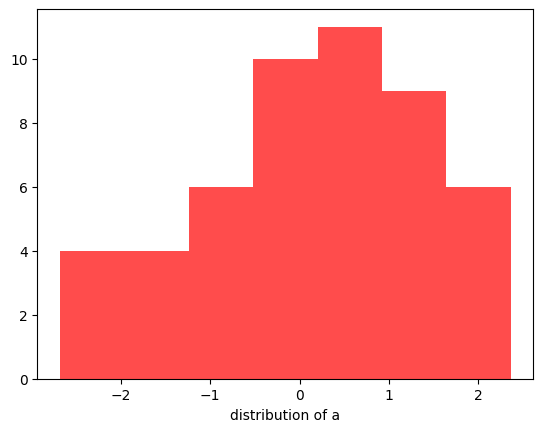

c


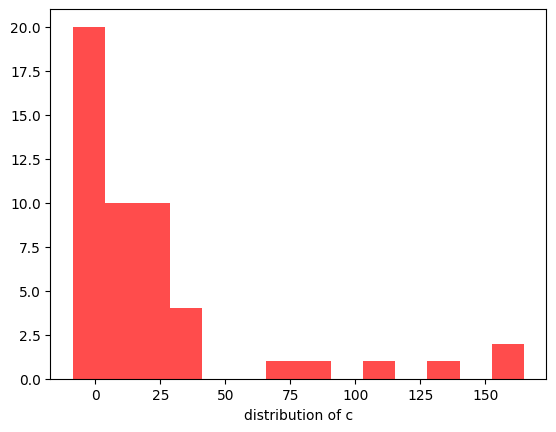

e


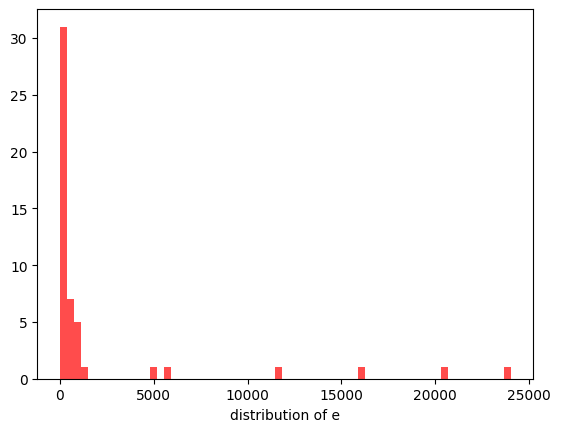

[[-2.685086082122167,
  1.7491091025625876,
  -1.2879363443671674,
  0.1780010778587532,
  1.0523925214918102,
  -0.41605062406247834,
  0.7907238931942814,
  0.5367220176746567,
  -0.9507943103325572,
  0.8188267401685722,
  1.0854256758688423,
  -2.154380227700361,
  0.8162107952859119,
  -1.1544038591630685,
  1.0008579442283145,
  0.8492819937802791,
  2.2032007886176914,
  0.2540926581821124,
  1.0468428298697117,
  -0.004002997874882973,
  0.5723183732322233,
  -0.5030343795297878,
  -0.5453555479725654,
  -1.7631345459715846,
  -2.5900442224539537,
  1.0142935690681825,
  0.9648333440043425,
  0.8873109912703177,
  -2.3849134731225394,
  1.1255931729038084,
  -0.5131038686812184,
  -0.767394133884027,
  2.0635660504935966,
  2.2858905615507674,
  0.17363188944808822,
  0.9729042088569089,
  -1.8969267959403238,
  1.1245498571743422,
  0.12225089696568735,
  -0.39235649172867265,
  0.35148957885544385,
  1.7119066109592198,
  -0.7591373680693307,
  -0.5649192294910917,
  2.367472

In [5]:

# Plot the sampled data
hscm.plot_data()


In [6]:
import json

# Function to save sampled data to a JSON file
def save_sampled_data(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

# Save the sampled data
save_sampled_data(sampled_data, 'data/sampled_data.json')

print("Sampled data has been saved to 'sampled_data.json'")


Sampled data has been saved to 'sampled_data.json'


In [7]:

# Set distributions from the loaded data
hscm.set_distribution_from_data()


In [8]:
# Perform additional analysis or modify the model as needed
# For example, you can change the graph structure or random functions here

# Re-sample data after modifications
new_sampled_data = hscm.resample_data()


In [9]:
print(new_sampled_data)

{'a0': 0.8006405421432845, 'a1': 0.48191288338841154, 'a2': 0.13030712355147978, 'a3': 0.012959924816539625, 'a4': 0.8178759875014253, 'a5': 0.7227501305866589, 'a6': 0.28229546990850163, 'a7': 0.95889329876468, 'a8': 0.7938811516198876, 'a9': 0.8438522939199199, 'a10': 0.43937932382708633, 'a11': 0.20631753927581153, 'a12': 0.3718420546543221, 'a13': 0.8564283565100116, 'a14': 0.4485816181033152, 'a15': 0.5004819133386176, 'a16': 0.5653963051547737, 'a17': 0.6488615528904994, 'a18': 0.25493677802461046, 'a19': 0.49083649328757195, 'a20': 0.38426437744036124, 'a21': 0.9731709657084782, 'a22': 0.8098817253636376, 'a23': 0.47257094525963406, 'a24': 0.689973405383067, 'a25': 0.8777073200277934, 'a26': 0.6822546851868436, 'a27': 0.5822383884577179, 'a28': 0.5958268967949861, 'a29': 0.47369499302282836, 'a30': 0.0548425518525022, 'a31': 0.978835159761079, 'a32': 0.5766994647476812, 'a33': 0.5925399763804896, 'a34': 0.3365617197966517, 'a35': 0.30270789690122635, 'a36': 0.2662193876158945, '

In [10]:
save_sampled_data(new_sampled_data, 'data/resampled_data.json')

a


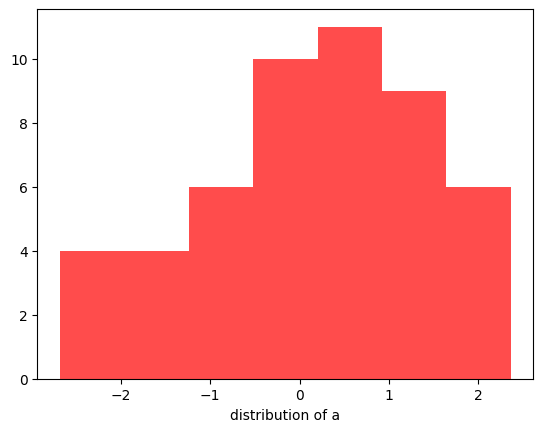

c


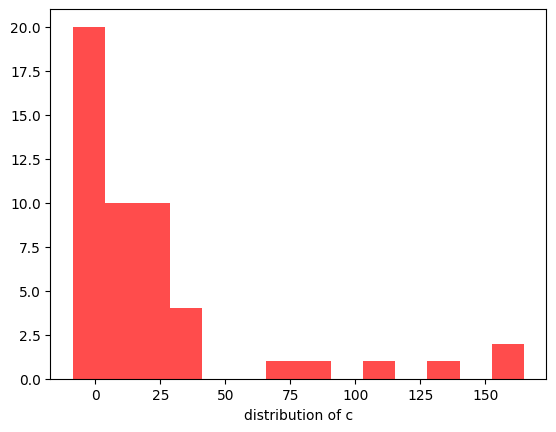

e


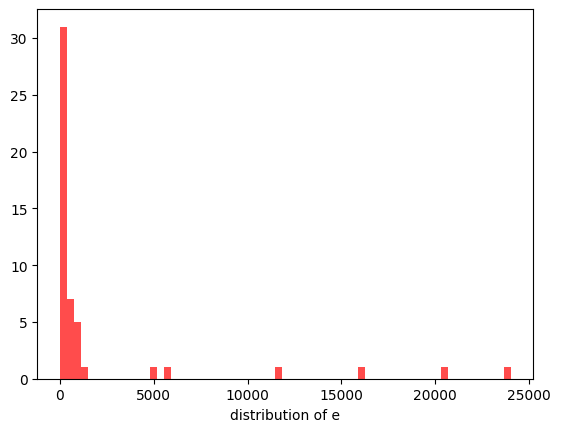

[[-2.685086082122167,
  1.7491091025625876,
  -1.2879363443671674,
  0.1780010778587532,
  1.0523925214918102,
  -0.41605062406247834,
  0.7907238931942814,
  0.5367220176746567,
  -0.9507943103325572,
  0.8188267401685722,
  1.0854256758688423,
  -2.154380227700361,
  0.8162107952859119,
  -1.1544038591630685,
  1.0008579442283145,
  0.8492819937802791,
  2.2032007886176914,
  0.2540926581821124,
  1.0468428298697117,
  -0.004002997874882973,
  0.5723183732322233,
  -0.5030343795297878,
  -0.5453555479725654,
  -1.7631345459715846,
  -2.5900442224539537,
  1.0142935690681825,
  0.9648333440043425,
  0.8873109912703177,
  -2.3849134731225394,
  1.1255931729038084,
  -0.5131038686812184,
  -0.767394133884027,
  2.0635660504935966,
  2.2858905615507674,
  0.17363188944808822,
  0.9729042088569089,
  -1.8969267959403238,
  1.1245498571743422,
  0.12225089696568735,
  -0.39235649172867265,
  0.35148957885544385,
  1.7119066109592198,
  -0.7591373680693307,
  -0.5649192294910917,
  2.367472

In [11]:


# Plot the new sampled data
hscm.plot_data()


In [12]:
sampled_intervention = hscm.resample_data_after_intervention('_b', lambda x: norm.ppf(x, 0, 1))

a


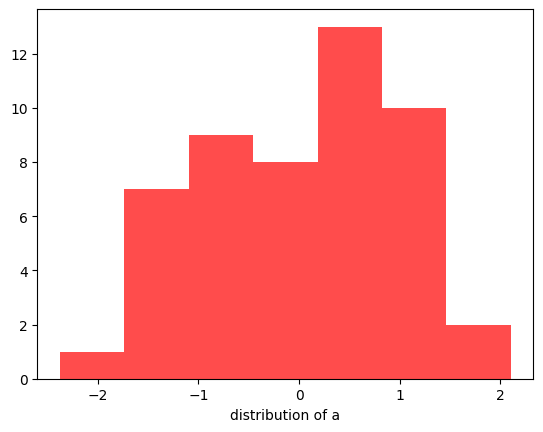

c


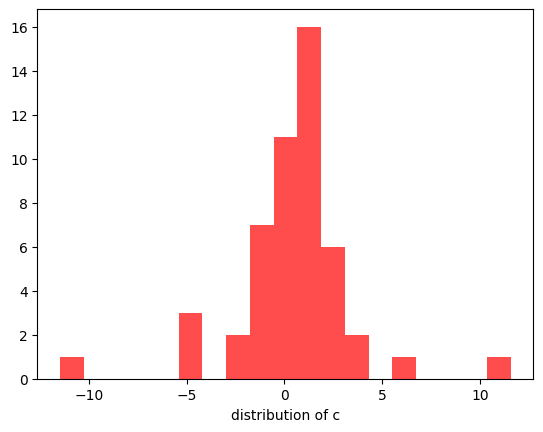

e


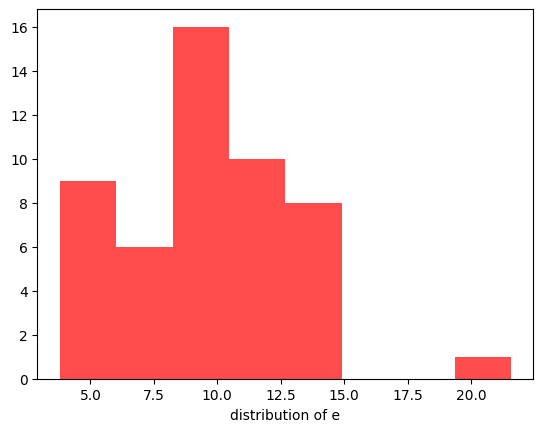

[[-0.29095128378167057,
  0.24429289708860816,
  -1.0274521401098478,
  0.5220174096081308,
  0.2150159583291203,
  1.1246264807823945,
  0.7489530902432262,
  -1.5880920538280865,
  -1.2603729918376954,
  0.20324037129330358,
  0.5654068433392677,
  -1.6504871263883982,
  0.7145732110740748,
  1.0688495373977591,
  0.5884667915330645,
  0.9195160016622123,
  0.7992152150128742,
  -0.21581768025936263,
  -1.1149275655631645,
  0.60906414807873,
  -0.23682346776818258,
  -0.2576905660823794,
  -0.4775629634926496,
  1.213208418874095,
  2.1034776546045006,
  -2.3754351758348746,
  -0.5445612670260594,
  -0.09027134683808963,
  0.8292119169258426,
  0.27163214741672437,
  1.031152743890421,
  -0.5820396810164206,
  0.9986684772616585,
  -0.5544790783528101,
  -0.5468018015191558,
  0.49084193379780666,
  -1.2270282647410038,
  1.1503870316760052,
  1.2780650352289649,
  -0.2402943792648199,
  -0.6364522071801377,
  -0.2806483056812748,
  1.106171812400965,
  -1.5728588783727617,
  0.5010

In [13]:
hscm.plot_data()

KL Divergence

In [14]:
from scipy.stats import gaussian_kde

In [15]:
def kl_divergence(p, q, bandwidth='scott'):
    """
    Calcule la divergence KL entre deux distributions empiriques représentées par des tableaux,
    en utilisant l'estimation de densité par noyau.
    
    :param p: Premier tableau de données
    :param q: Second tableau de données
    :param bandwidth: Méthode pour estimer la largeur de bande ('scott', 'silverman' ou un nombre)
    :return: Valeur de la divergence KL
    """
    # Assurez-vous que les tableaux ont la même taille
    min_len = min(len(p), len(q))
    p = p[:min_len]
    q = q[:min_len]
    
    # Estimation de densité par noyau
    kde_p = gaussian_kde(p, bw_method=bandwidth)
    kde_q = gaussian_kde(q, bw_method=bandwidth)
    
    # Créez un espace d'échantillonnage
    x = np.linspace(min(np.min(p), np.min(q)), max(np.max(p), np.max(q)), 10000)
    
    # Estimez les densités
    p_density = kde_p(x)
    q_density = kde_q(x)
    
    # Ajoutez un petit epsilon pour éviter la division par zéro
    epsilon = 1e-10
    p_density += epsilon
    q_density += epsilon
    
    # Normalisez les densités
    p_density /= np.sum(p_density)
    q_density /= np.sum(q_density)
    
    # Calculez la divergence KL
    return np.sum(p_density * np.log(p_density / q_density))

In [16]:
def kl_div_deprecated(original, resampled):
    # Calculate histograms
    hist_original, _ = np.histogram(original, bins=50, density=True)
    hist_resampled, _ = np.histogram(resampled, bins=50, density=True)
        
        # Add small constant to avoid division by zero
    hist_original += 1e-10
    hist_resampled += 1e-10
        
        # Normalize
    hist_original /= hist_original.sum()
    hist_resampled /= hist_resampled.sum()
        
        # Calculate KL divergence
    kl_divs = np.sum(hist_original * np.log(hist_original / hist_resampled))
    
    return kl_divs

In [17]:

def run_experiment(k):
    print(k)
    # Define the HSCM model structure
    nodes = ["a", "b", "c", "d", "e"]
    edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
    unit_nodes = ["a", "c", "e"]
    subunit_nodes = ["d", "b"]
    sizes = [50] * 50# You can adjust this based on your data
    
    # Initialize the HSCM model
    hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)
    
    # Define random functions for each node
    random_functions = {
        "a": lambda x: norm.ppf(x, 0, 1),
        "b": lambda x: norm.ppf(x, 0, 1),
        "c": lambda x: norm.ppf(x, 0, 1),
        "d": lambda x: norm.ppf(x, 0, 1),
        "e": lambda x: norm.ppf(x, 0, 1)
    }
    
    # Define additive functions for each node
    additive_functions = {
        "a": {},
        
        "b": {"a": lambda a: (a+1 )* (a+1)},
        
        "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
        
        "d": {"b": lambda b: (b +1)**2, "c": lambda c: -c**3},
        
        "e": {"d": lambda d: (np.mean(np.array(list(d))) +1)**2, "c": lambda c : c}
    }

    # Set up the HSCM model
    hscm.additive_model(additive_functions, random_functions)

    # Sample data from the model
    sampled_data = hscm.sample_data()
    print('sampled data !')
    save_sampled_data(sampled_data, f'data/sampled_data_{k}.json')
    
    # Set distributions from the sampled data
    hscm.set_distribution_from_data()

    # Resample data
    resampled_data = hscm.sample_data()
    save_sampled_data(resampled_data, f'data/resampled_data_{k}.json')
    print('sampled data 2 !!!!!')
    
    sampled_intervention = hscm.resample_data_after_intervention('_b', lambda x: norm.ppf(x, 0, 1))
    save_sampled_data(sampled_intervention, f'data/sampled_intervention_{k}.json')
    
    kl_divergences = {}
    for node in unit_nodes:
        original = [sampled_data[f"{node}{i}"] for i in range(len(sizes))]
        resampled = [resampled_data[f"{node}{i}"] for i in range(len(sizes))]
        
        kl_divergences[node] = kl_divergence(original, resampled)
    
        
    print('kl_divergences', kl_divergences)
    return kl_divergences

In [19]:

# Run the experiment 100 times
results = [run_experiment(k) for k in range(100)]


0
{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0xe395ef51b060>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0xe395ef51a700>}} aggregator_functions
sampled data !
sampled data 2 !!!!!
kl_divergences {'a': 0.0485054134311047, 'c': 0.0660362567352653, 'e': 0.6519761257180475}
1
{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0xe3963c9dca40>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0xe395eebb31a0>}} aggregator_functions
sampled data !
sampled data 2 !!!!!
kl_divergences {'a': 0.018262678884852345, 'c': 0.19938773372544336, 'e': 0.32990746474478094}
2
{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0xe395ef519940>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0xe395ef51b1a0>}} aggregator_functions
sampled data !
sampled data 2 !!!!!
kl_divergences {'a': 0.07489511055937137, 'c': 0.3249635697304561, 'e': 1.381993573088612}
3
{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> 

In [20]:
print(results)

[{'a': 0.0485054134311047, 'c': 0.0660362567352653, 'e': 0.6519761257180475}, {'a': 0.018262678884852345, 'c': 0.19938773372544336, 'e': 0.32990746474478094}, {'a': 0.07489511055937137, 'c': 0.3249635697304561, 'e': 1.381993573088612}, {'a': 0.04577385497342646, 'c': 1.405225630775862, 'e': 2.683640902724643}, {'a': 0.0628201190315305, 'c': 0.1282493796537838, 'e': 0.24819465155155537}, {'a': 0.05160785803944391, 'c': 0.2567819688314673, 'e': 1.6946616518272597}, {'a': 0.04178376244530801, 'c': 0.8961016695366477, 'e': 3.4478174209500416}, {'a': 0.13662548189032003, 'c': 1.8836798049132042, 'e': 3.4204630305601205}, {'a': 0.02528684291092595, 'c': 0.09956712788064137, 'e': 0.16204805850797077}, {'a': 0.15290277337627223, 'c': 1.212463704393927, 'e': 0.4833906351775046}]


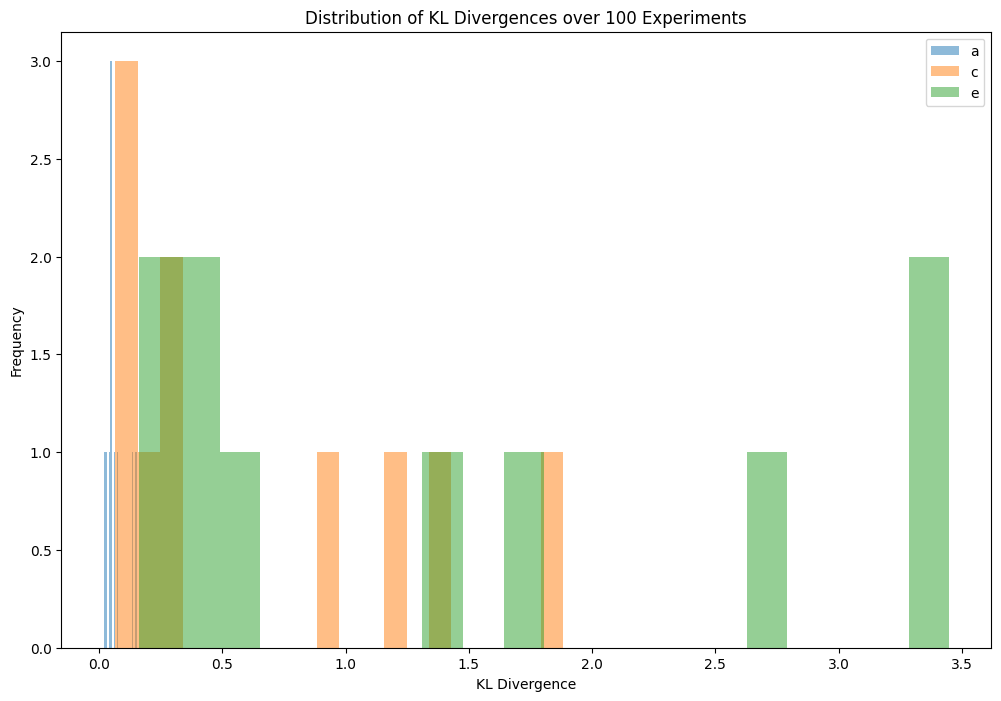

a:
  Mean: 0.0658
  Std Dev: 0.0425
  Min: 0.0183
  Max: 0.1529

c:
  Mean: 0.6472
  Std Dev: 0.6204
  Min: 0.0660
  Max: 1.8837

e:
  Mean: 1.4504
  Std Dev: 1.2405
  Min: 0.1620
  Max: 3.4478



In [21]:

# Analyze the results
kl_divergences = {node: [result[node] for result in results] for node in results[0].keys()}

# Plot the distribution of KL divergences for each node
plt.figure(figsize=(12, 8))
for node, divergences in kl_divergences.items():
    plt.hist(divergences, bins=20, alpha=0.5, label=node)
plt.xlabel('KL Divergence')
plt.ylabel('Frequency')
plt.title('Distribution of KL Divergences over 100 Experiments')
plt.legend()
plt.show()

# Print summary statistics
for node, divergences in kl_divergences.items():
    print(f"{node}:")
    print(f"  Mean: {np.mean(divergences):.4f}")
    print(f"  Std Dev: {np.std(divergences):.4f}")
    print(f"  Min: {np.min(divergences):.4f}")
    print(f"  Max: {np.max(divergences):.4f}")
    print()

AUC

In [22]:

def load_data_from_json(file_path):
    """
    Load data from a JSON file and return it as a dictionary.
    
    :param file_path: Path to the JSON file
    :return: Dictionary containing the loaded data
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print(f"Data successfully loaded from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None



In [23]:

# Specify the path to your JSON file
json_file_path = 'data/sampled_data.json'

# Load the data
data_dict = load_data_from_json(json_file_path)

# Check if data was loaded successfully
if data_dict is not None:
    print("Data loaded successfully. You can now use data_dict in your analysis.")
else:
    print("Failed to load data. Please check the file path and format.")


Data successfully loaded from data/sampled_data.json
Data loaded successfully. You can now use data_dict in your analysis.


In [24]:
data_dict_resampled = load_data_from_json('data/resampled_data.json')

Data successfully loaded from data/resampled_data.json


In [25]:
def create_vector(data, sizes):
    vectors = []
    current_index = 0
    for i, size in enumerate(sizes):
        for j in range(size):
            vector = [
                #data[f'a{i}'],  # Unit node 'a' for the school
                data[f'_b{i}_{j}'],  # Subunit node 'b' for this specific child
                #data[f'c{i}'],  # Unit node 'c' for the school
                data[f'_d{i}_{j}'],  # Subunit node 'd' for this specific child
                #data[f'e{i}']   # Unit node 'e' for the school
            ]
            vectors.append(vector)
            current_index += 1
    return np.array(vectors)



In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [41]:


def hscm_classification_pipeline(X, y):
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot feature importances
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(feature_names)), importances[indices])
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    #plt.show()

    return accuracy


In [28]:

original_vectors = create_vector(data_dict, sizes)
new_vectors = create_vector(data_dict_resampled, sizes)
X = np.vstack((original_vectors, new_vectors))
y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new


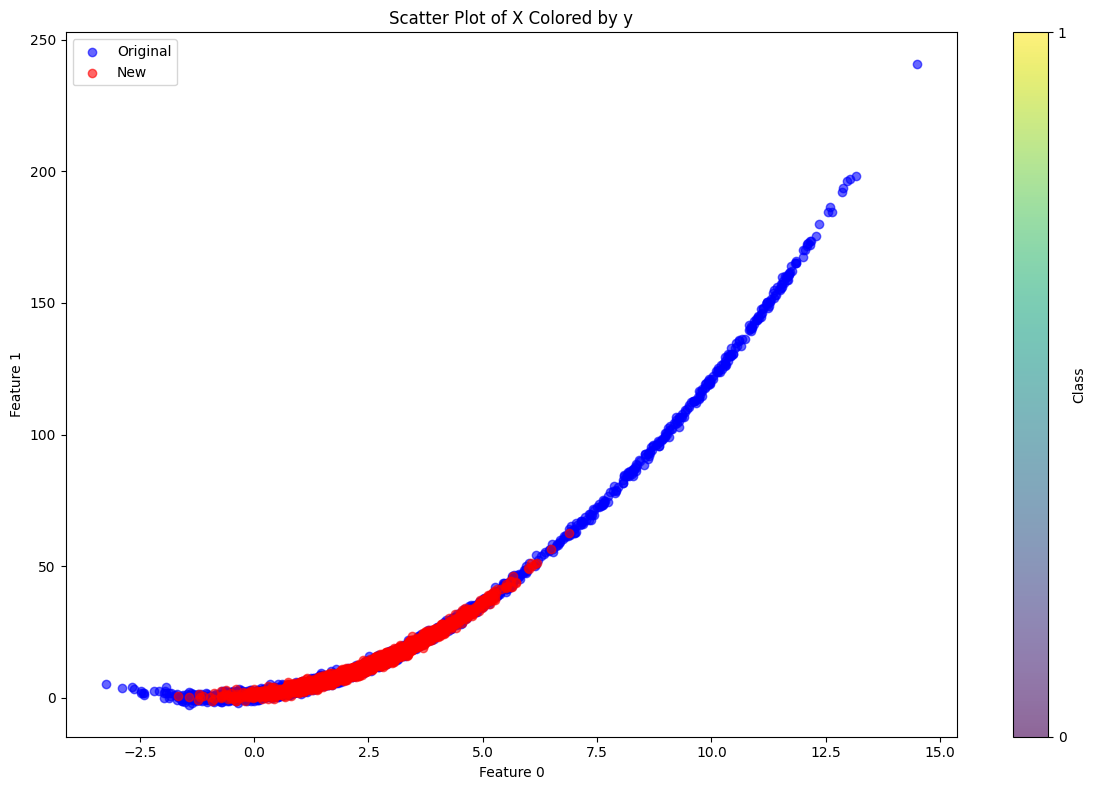

In [29]:
# Plotting X according to its color in y

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot points for y=0 (original vectors)
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Original', alpha=0.6)

# Plot points for y=1 (new vectors)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='New', alpha=0.6)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of X Colored by y')
plt.legend()

# Add a colorbar
plt.colorbar(ticks=[0, 1], label='Class')

plt.tight_layout()
plt.show()


Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       500
           1       0.63      0.63      0.63       500

    accuracy                           0.63      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.63      0.63      0.63      1000



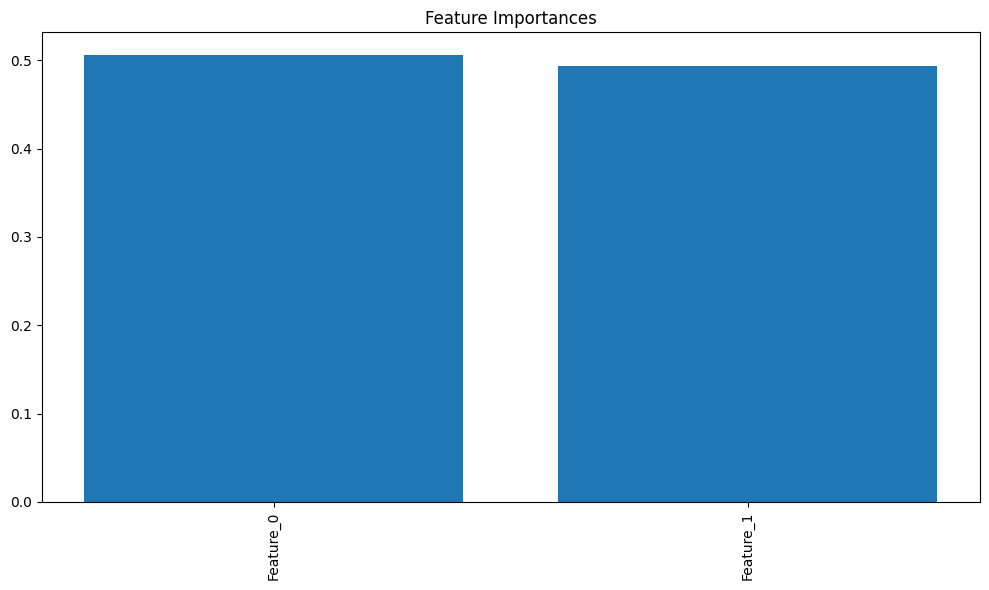

0.634

In [30]:
hscm_classification_pipeline(X, y)

In [42]:
def run_classification(k):
    list = []
    for i in range(k):
        data_dict = load_data_from_json(f'data/sampled_data_{i}.json')
        data_dict_resampled = load_data_from_json(f'data/resampled_data_{i}.json')        
        original_vectors = create_vector(data_dict, sizes)
        new_vectors = create_vector(data_dict_resampled, sizes)
        X = np.vstack((original_vectors, new_vectors))
        y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new
        accuracy_score = hscm_classification_pipeline(X, y)
        list.append(accuracy_score)
    return list

Data successfully loaded from data/sampled_data_0.json
Data successfully loaded from data/resampled_data_0.json
Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       500
           1       0.52      0.49      0.50       500

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000

Data successfully loaded from data/sampled_data_1.json
Data successfully loaded from data/resampled_data_1.json
Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       500
           1       0.54      0.53      0.54       500

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.54      0.54      1000

Data successfully loaded from data/sampled_dat

/tmp/ipykernel_6433/3675280145.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       500
           1       0.50      0.51      0.51       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000

Data successfully loaded from data/sampled_data_22.json
Data successfully loaded from data/resampled_data_22.json
Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       500
           1       0.53      0.54      0.53       500

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000

Data successfully loaded from data/sampled_data_23.json
Data successfully loaded from data/resampled_data_23.json
Accuracy: 0.54
Classification Report:
    

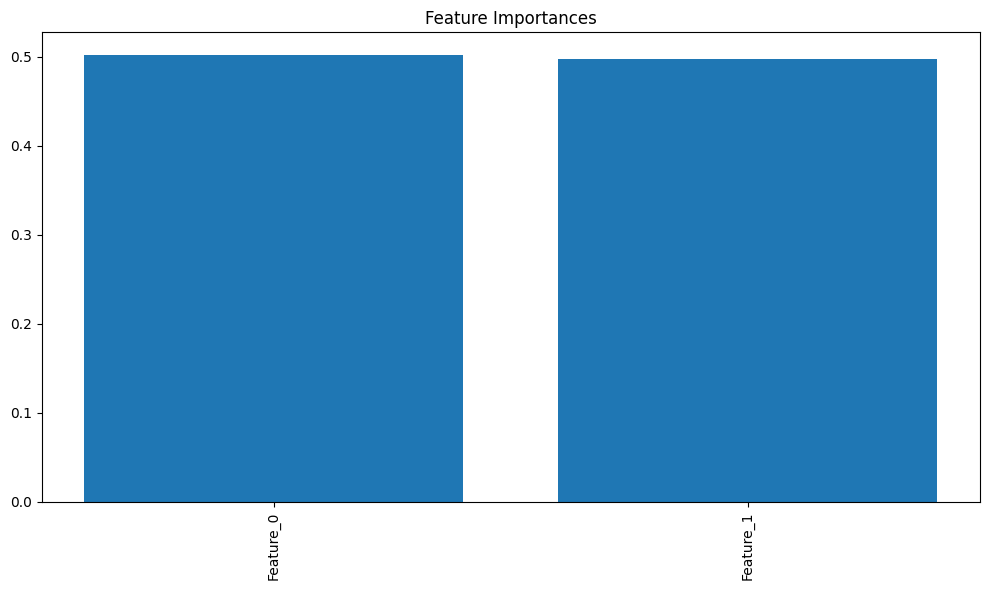

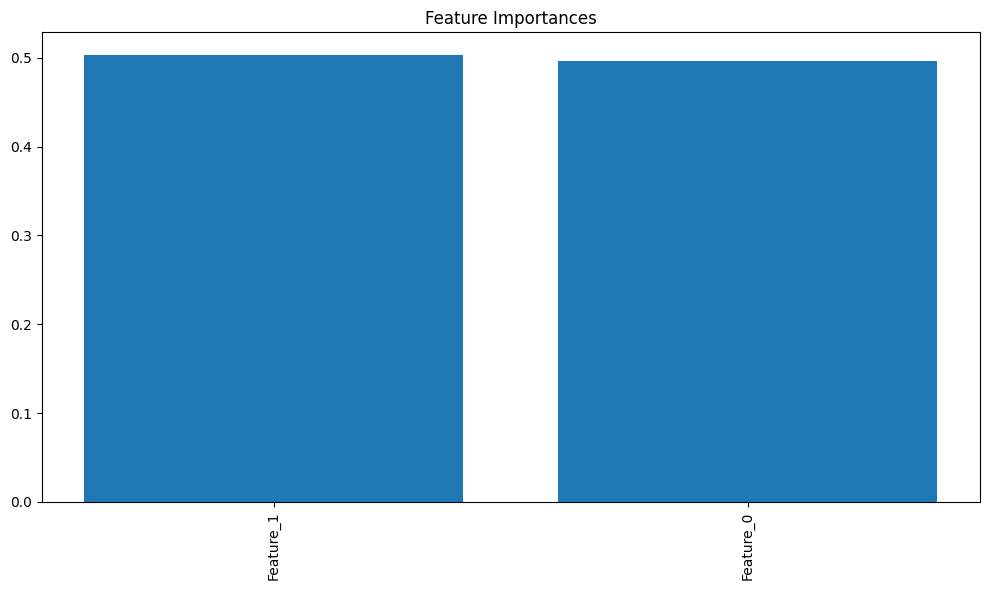

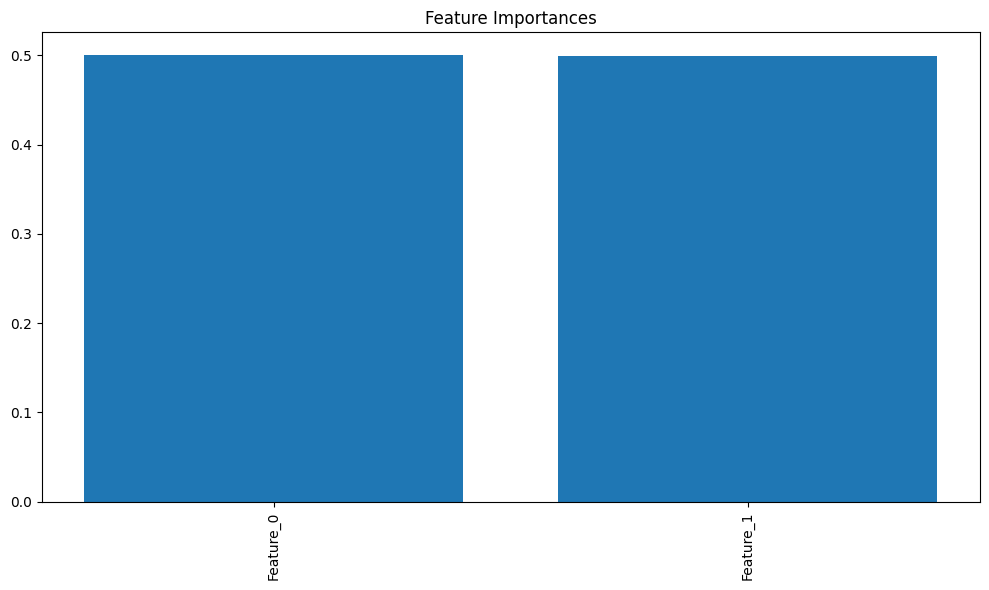

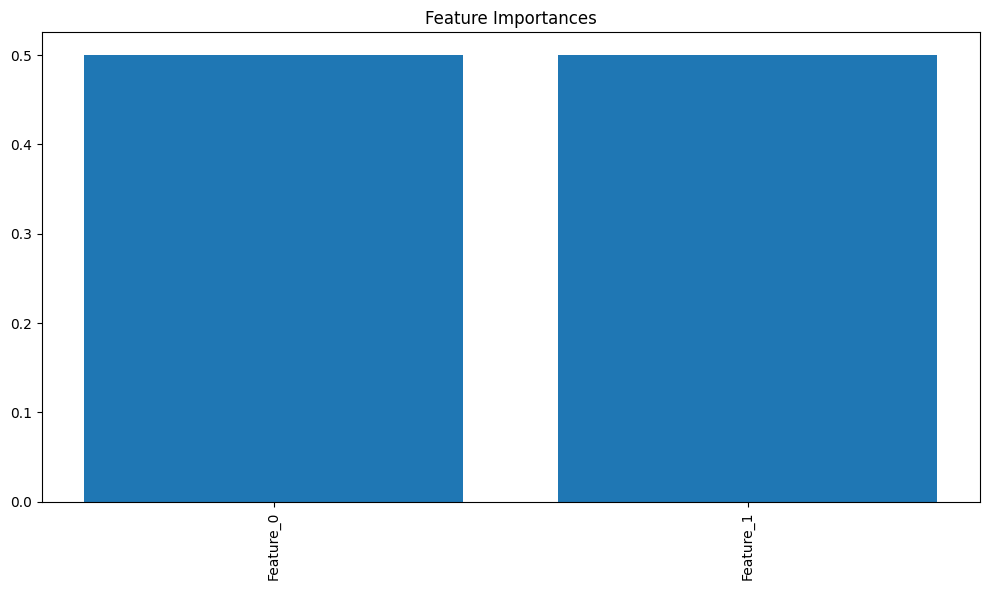

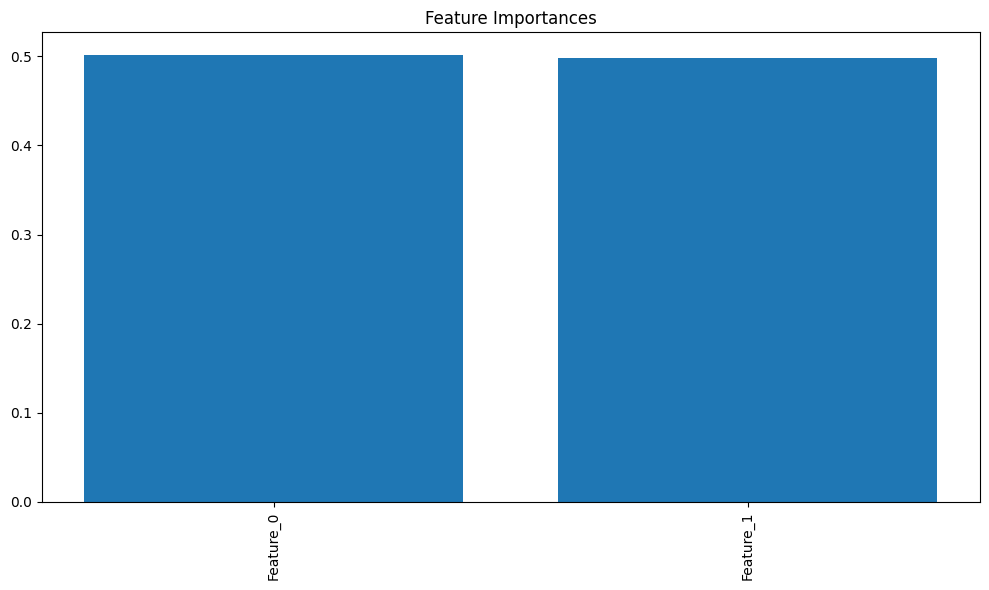

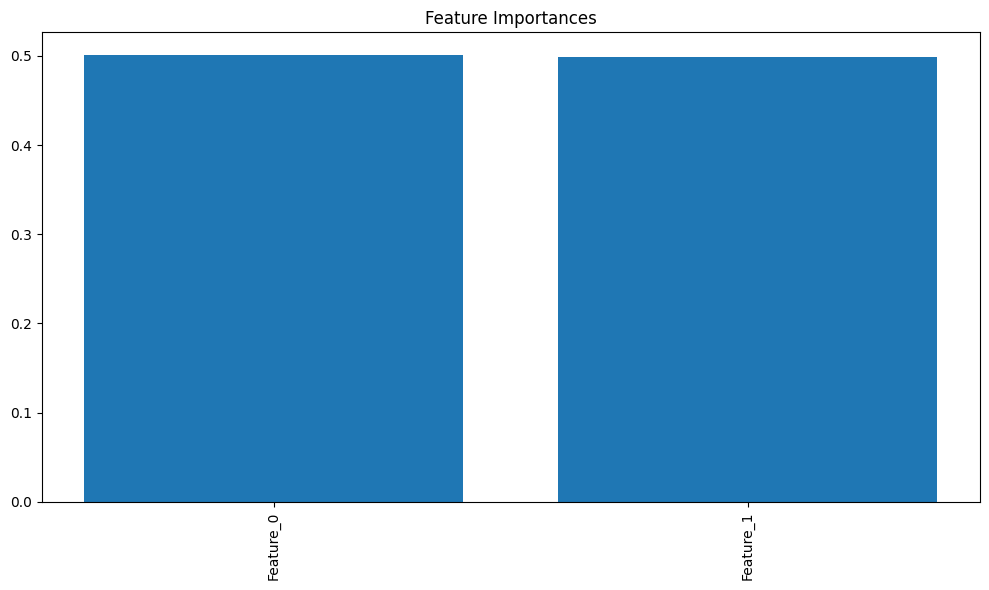

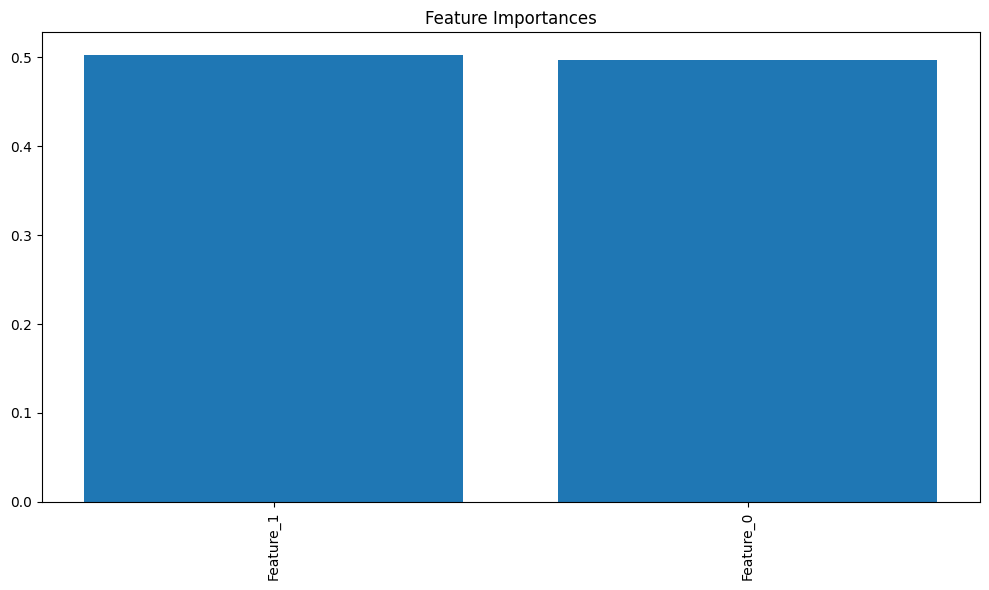

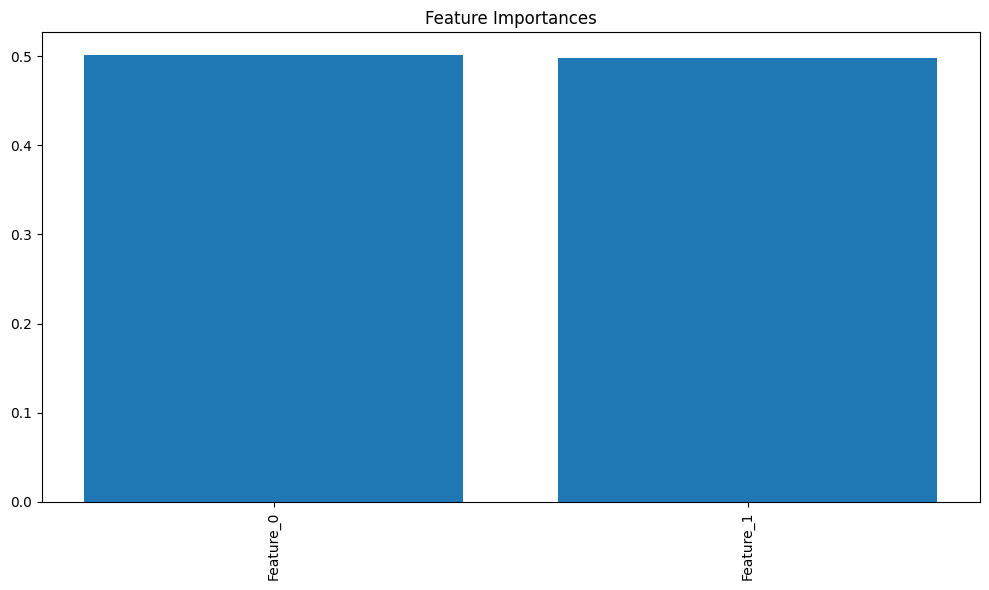

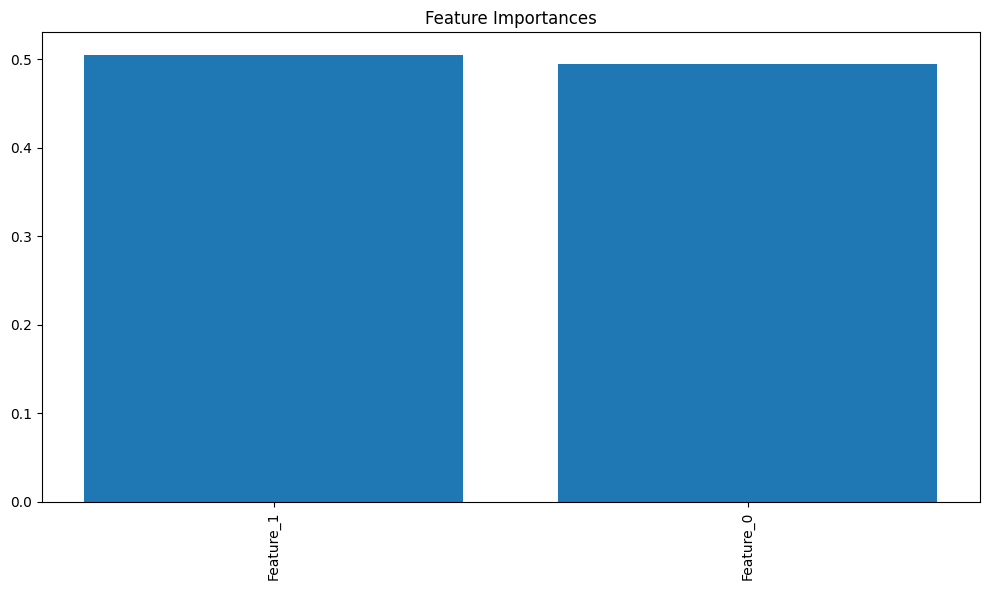

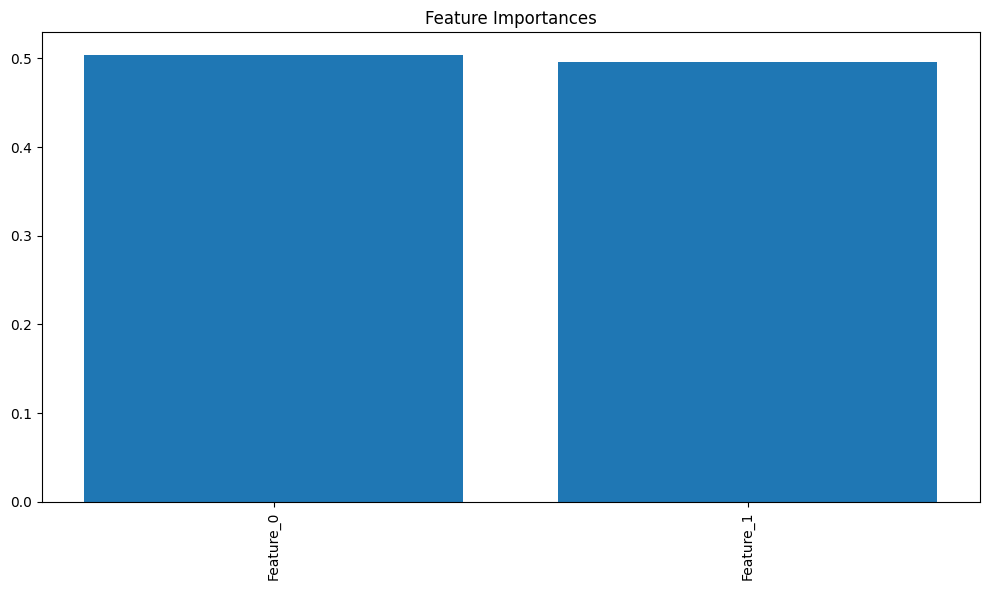

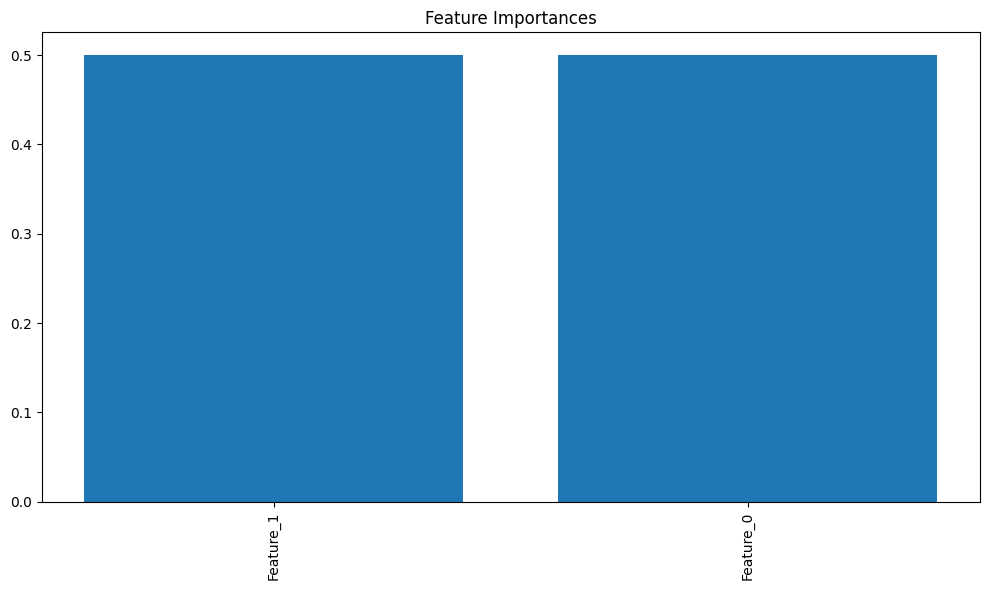

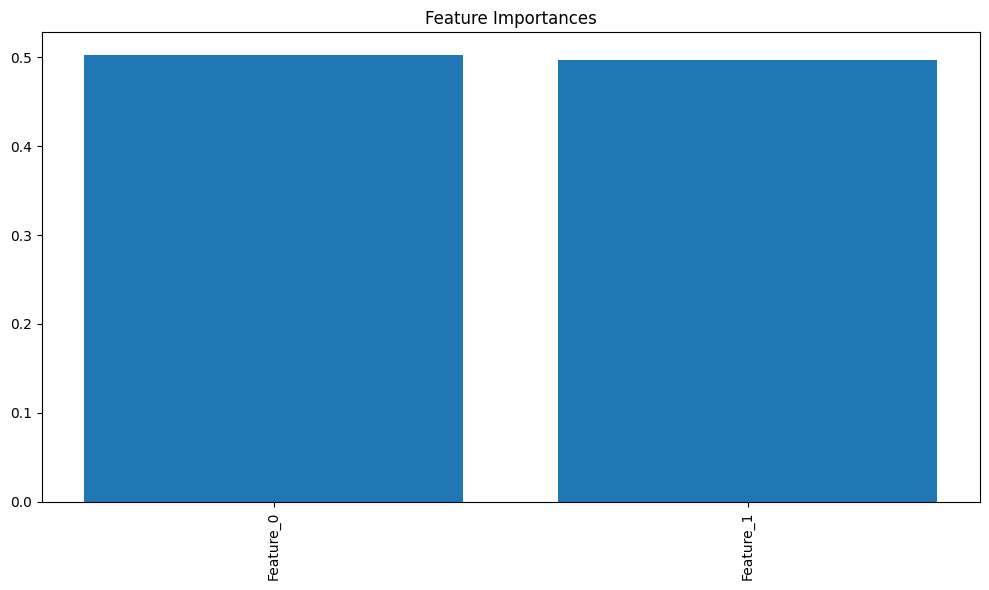

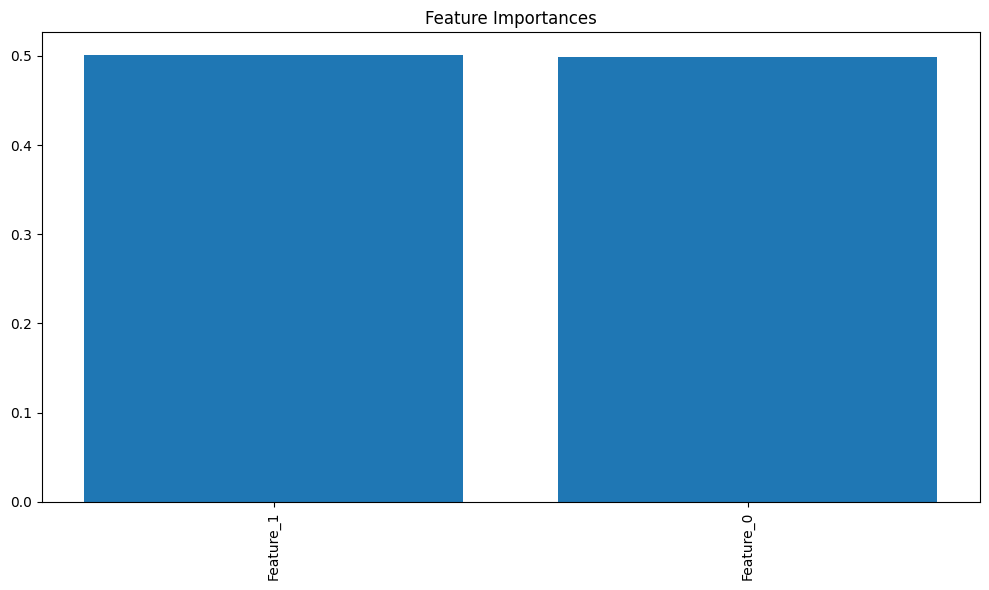

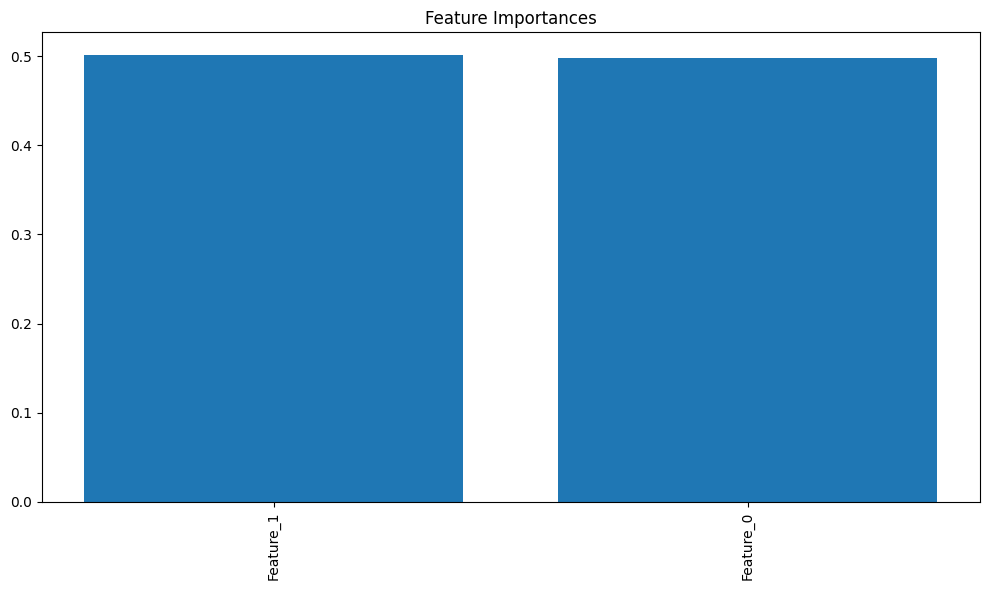

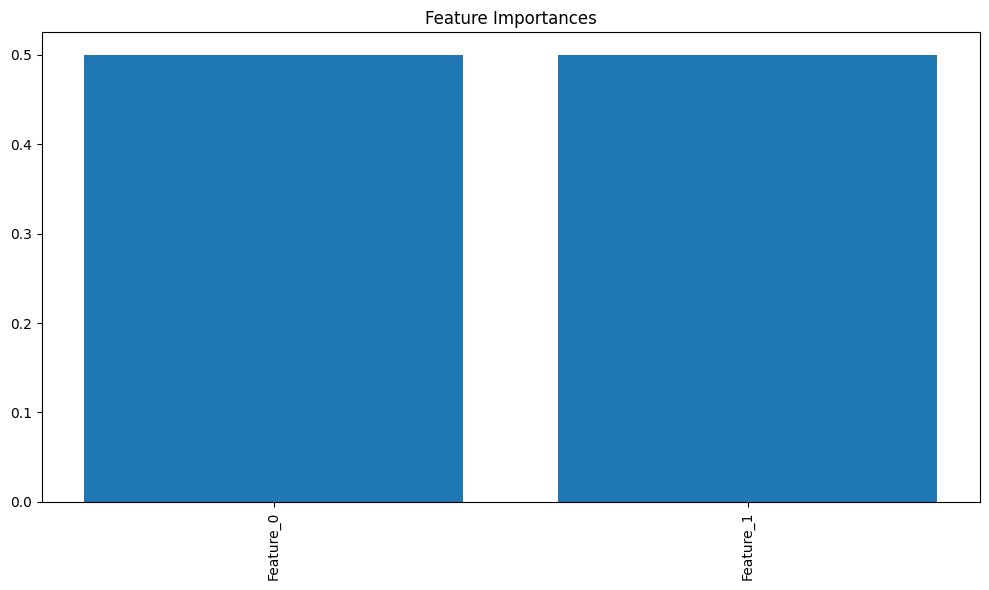

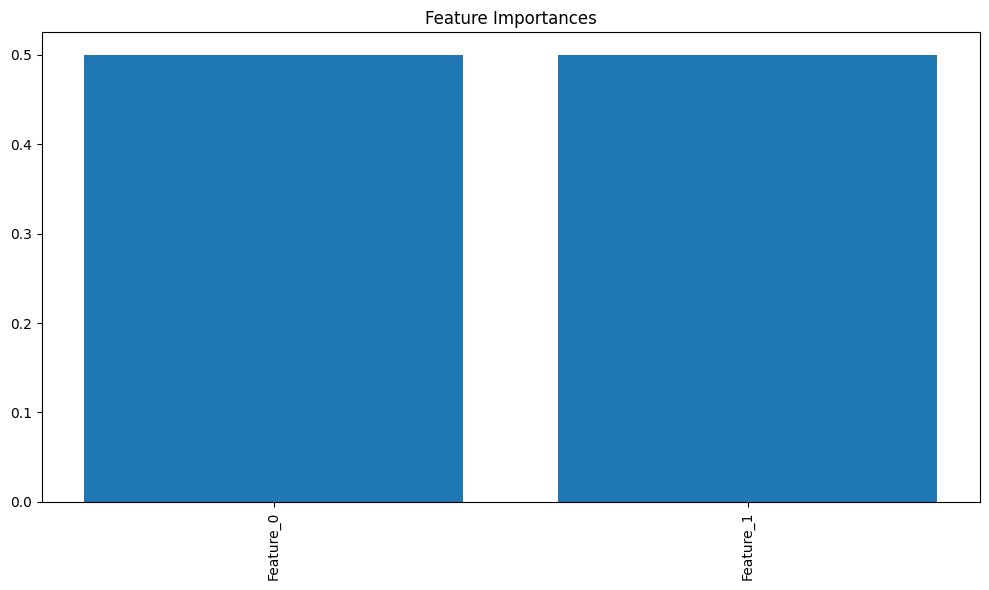

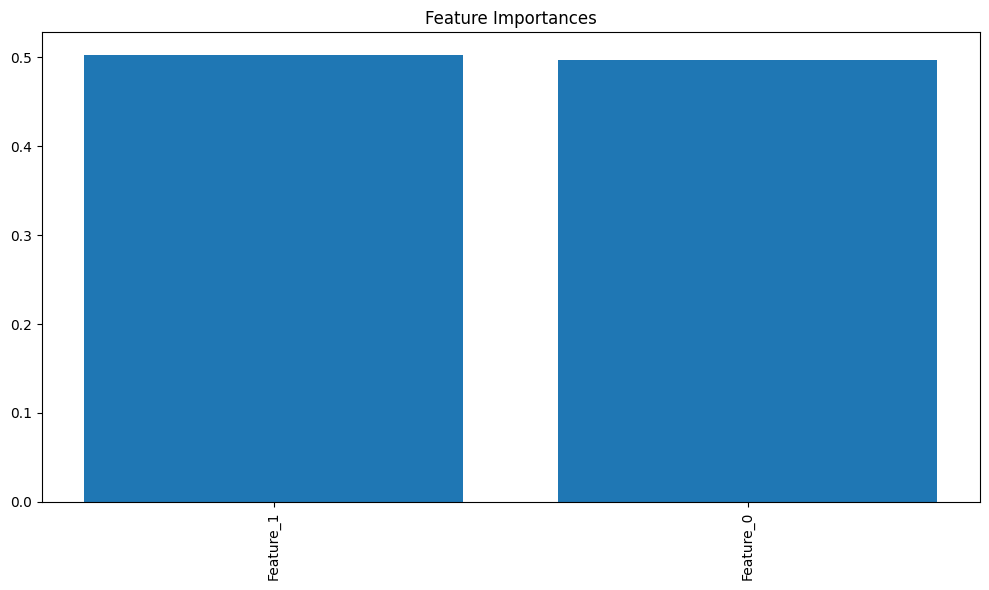

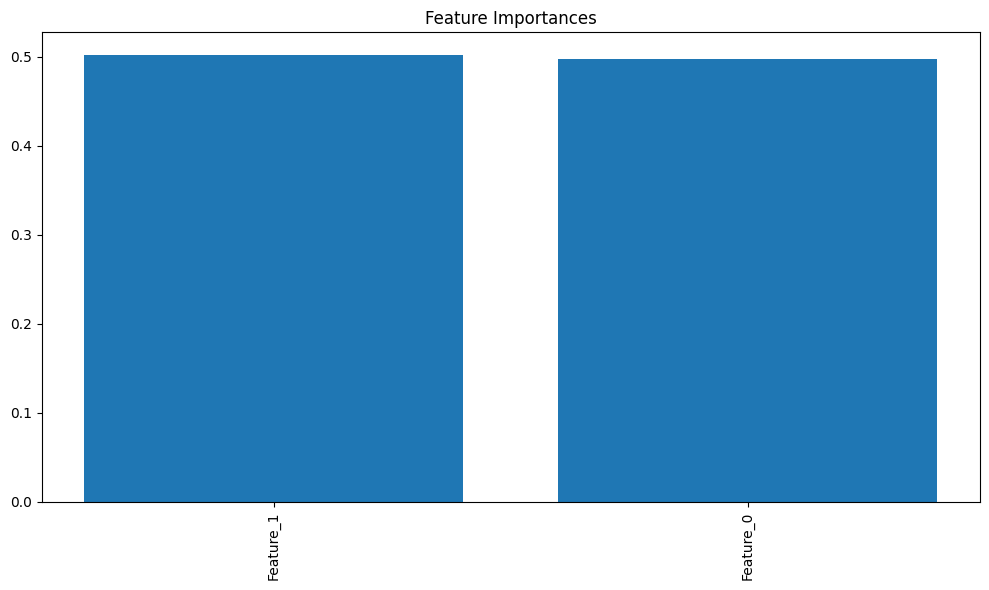

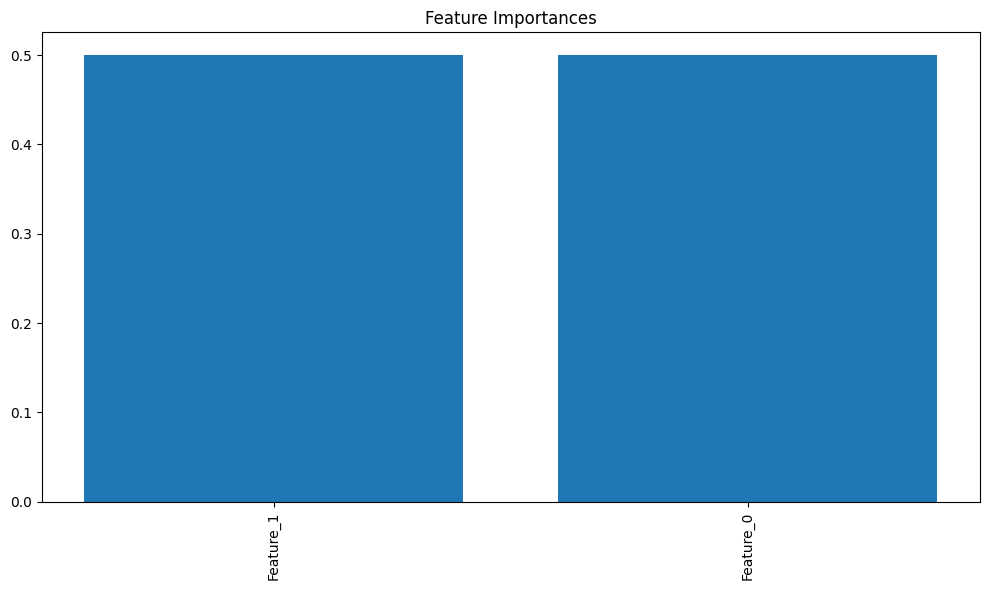

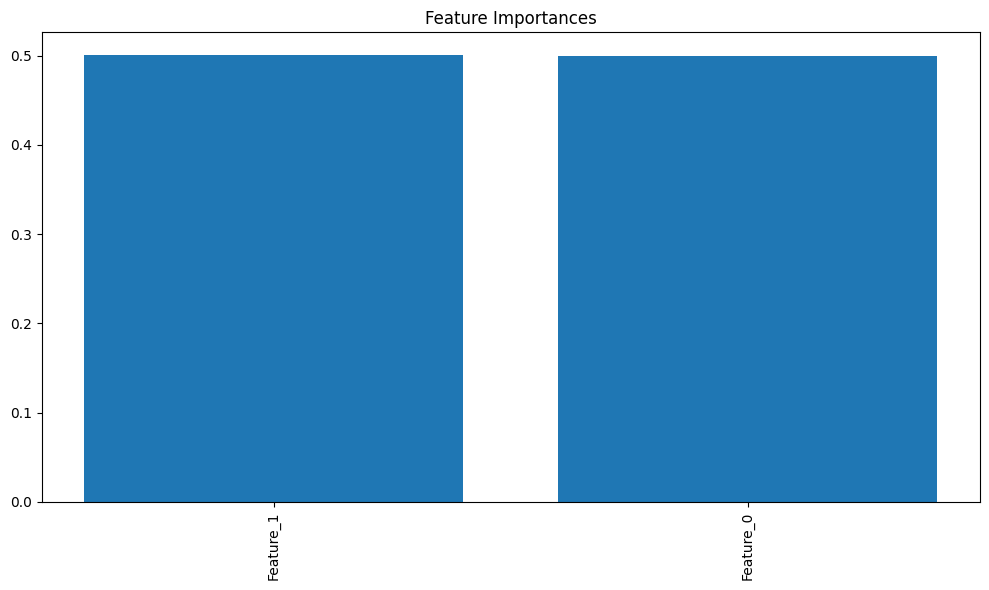

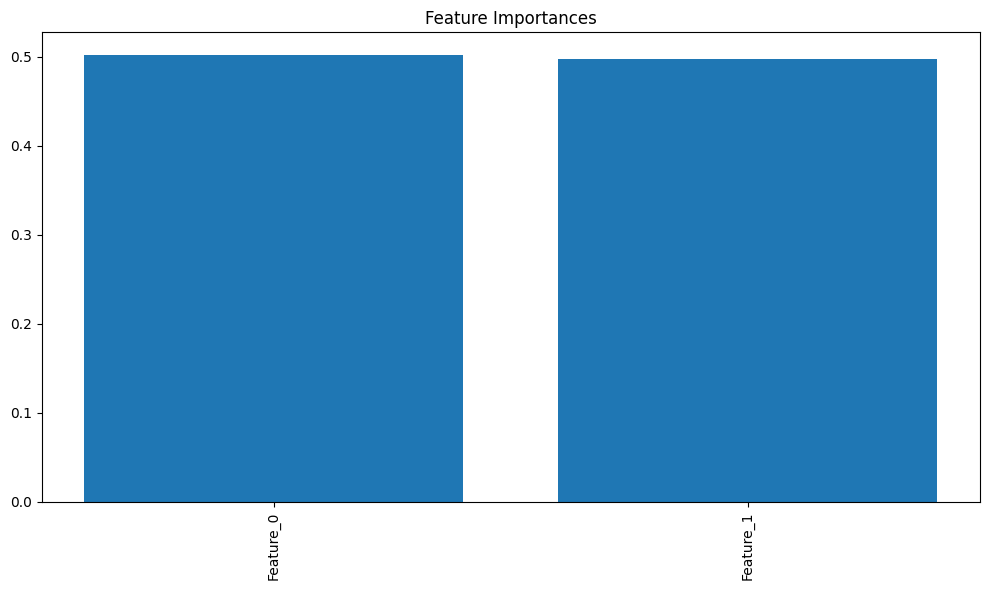

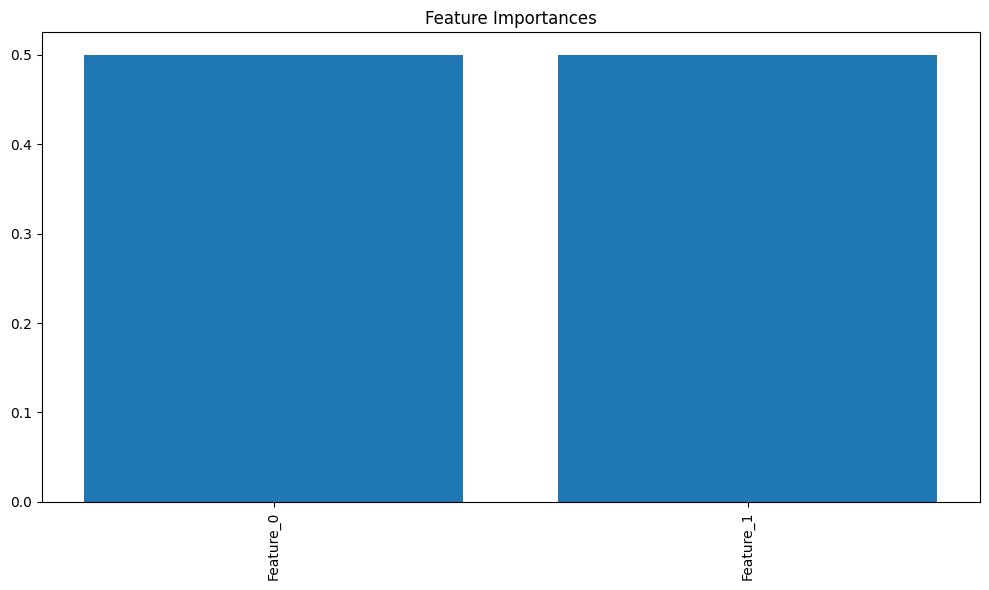

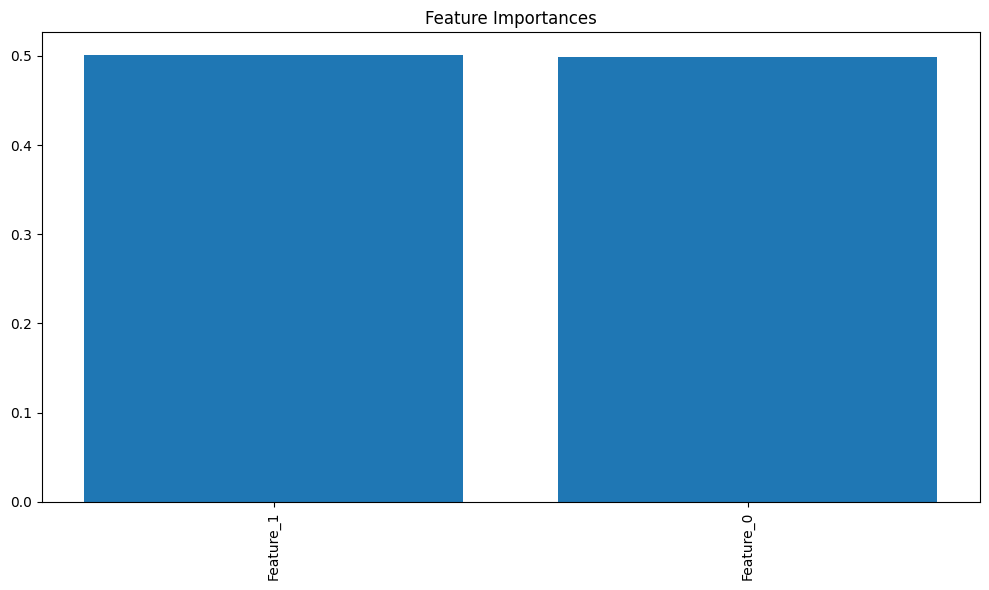

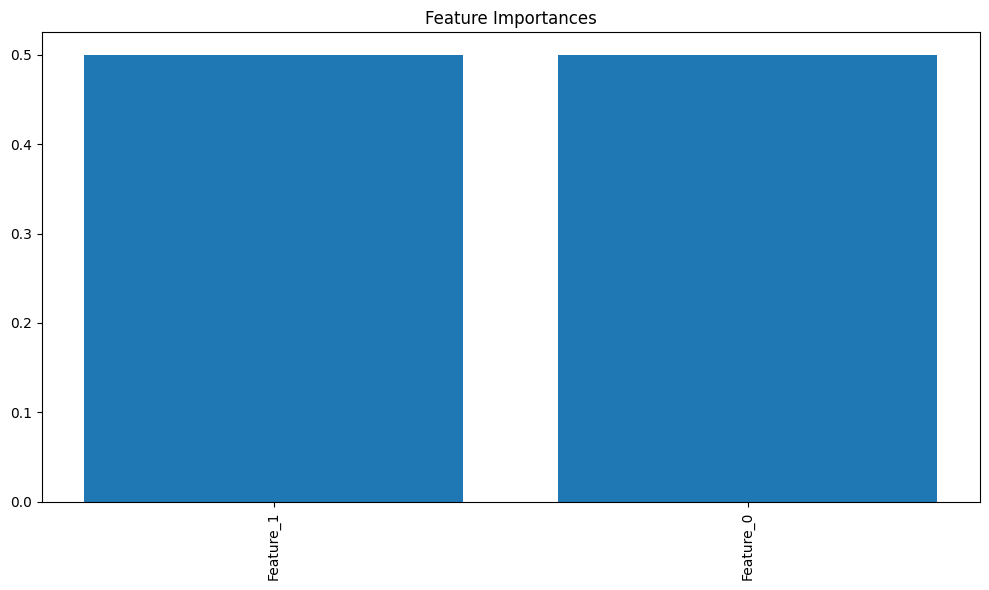

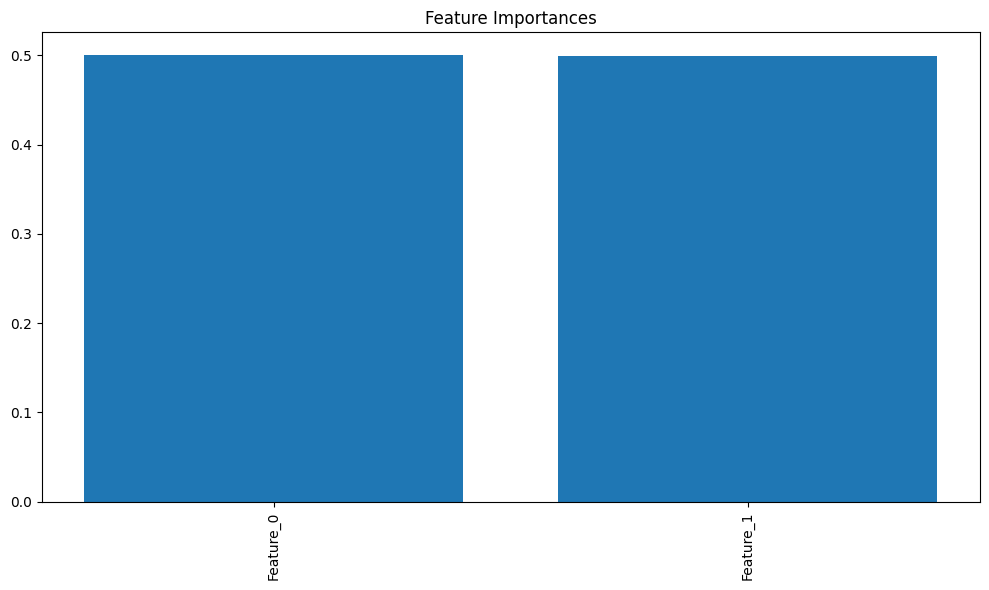

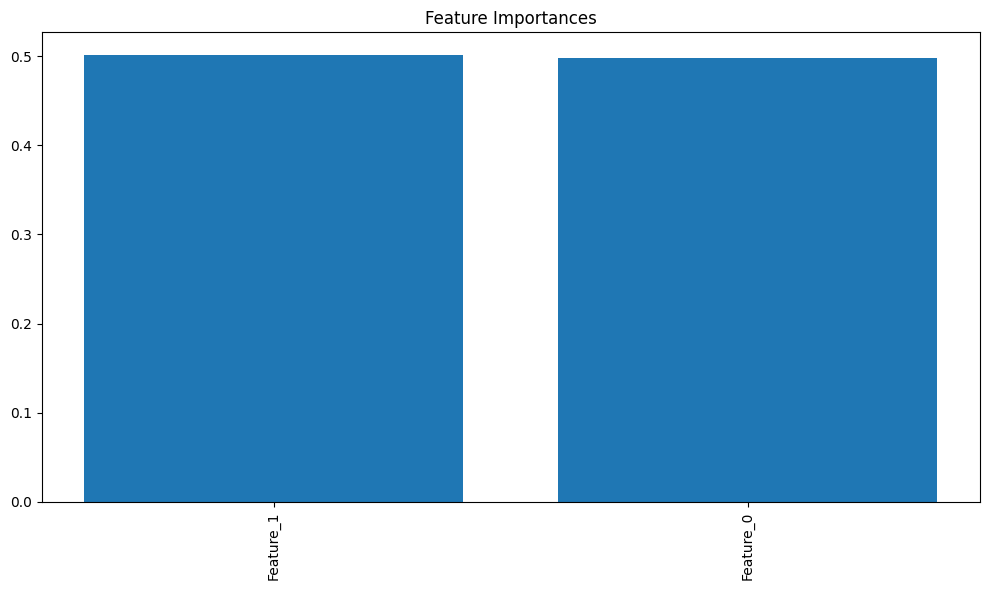

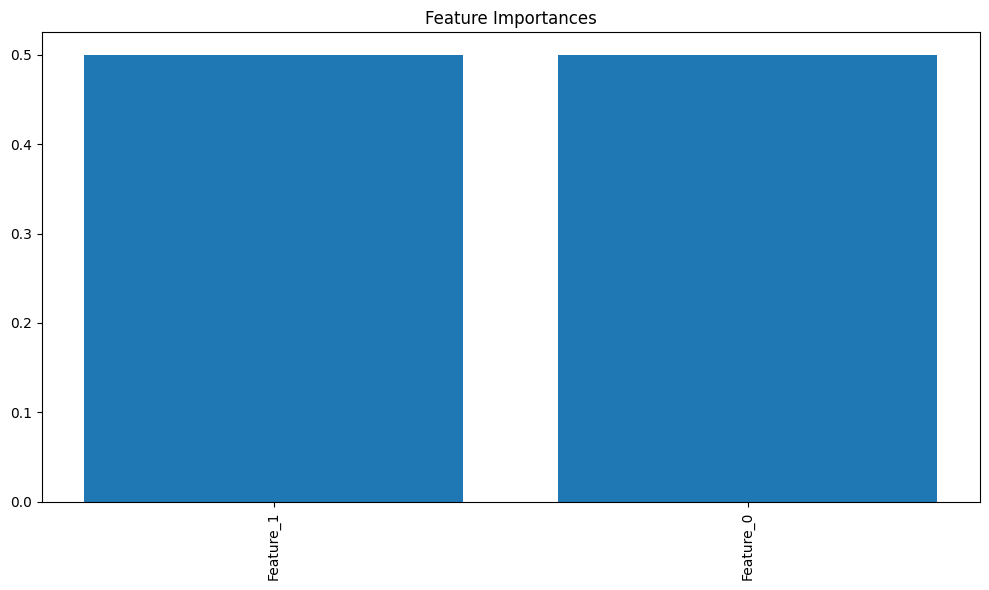

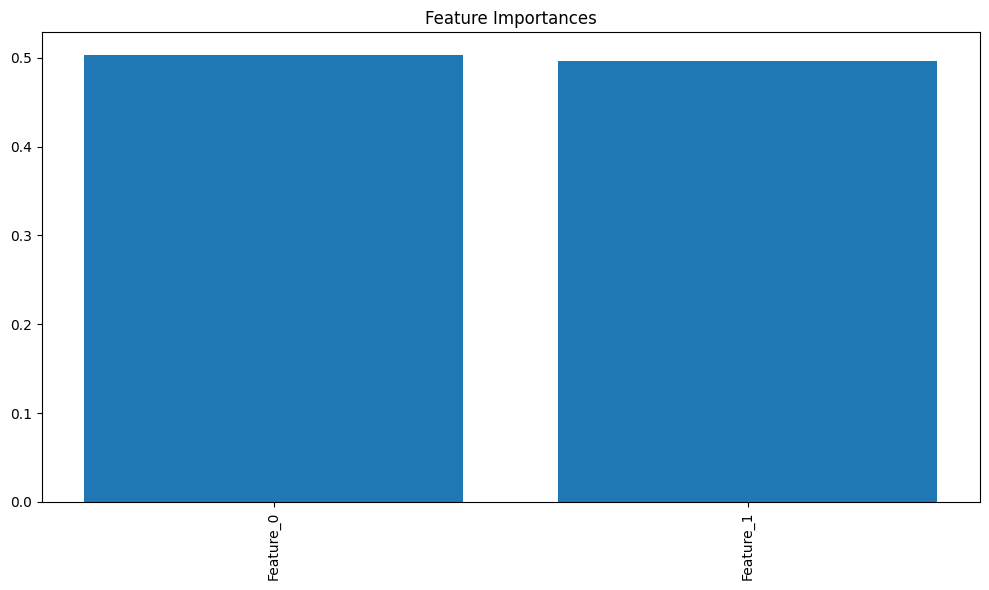

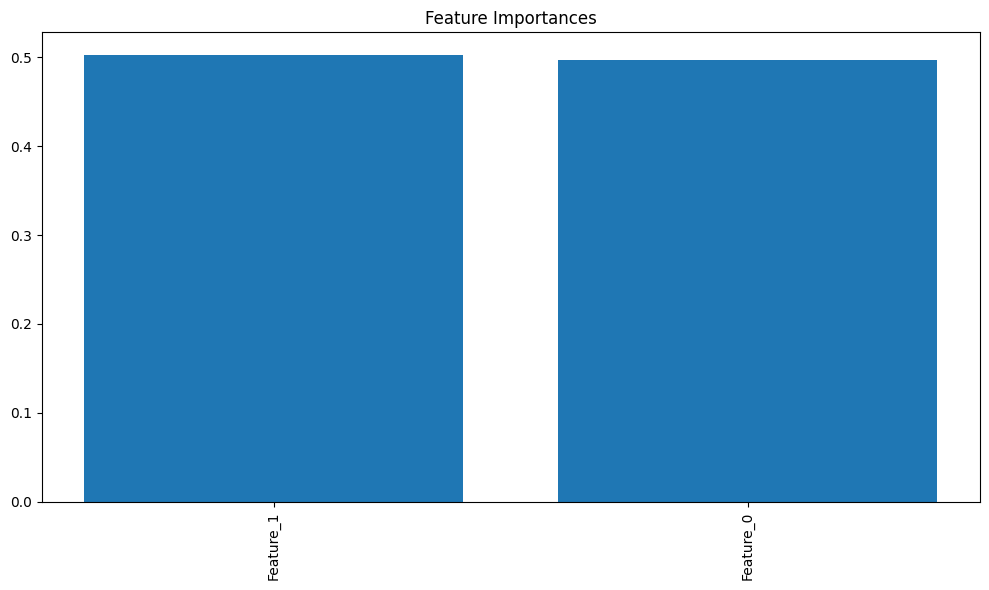

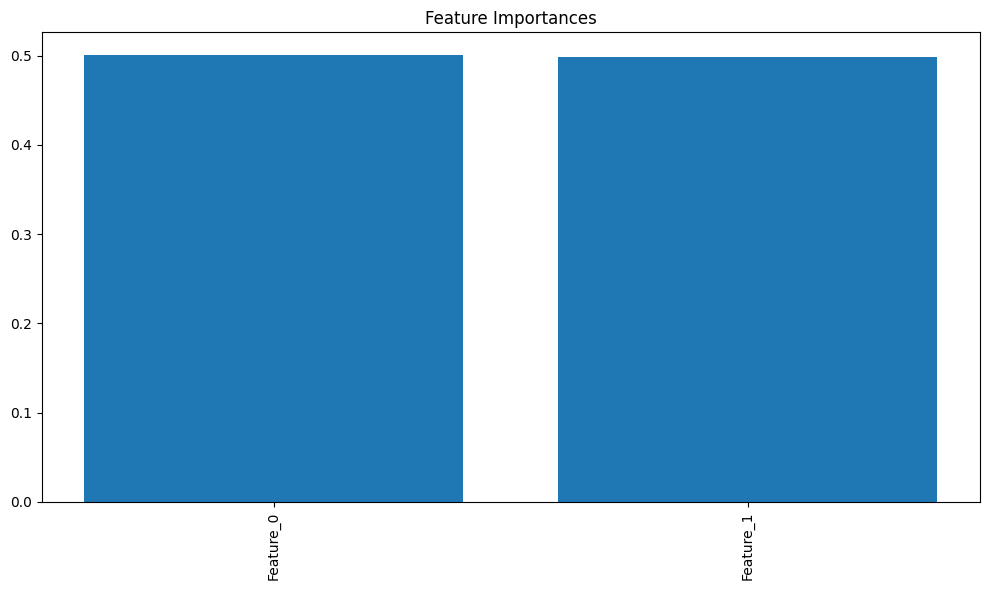

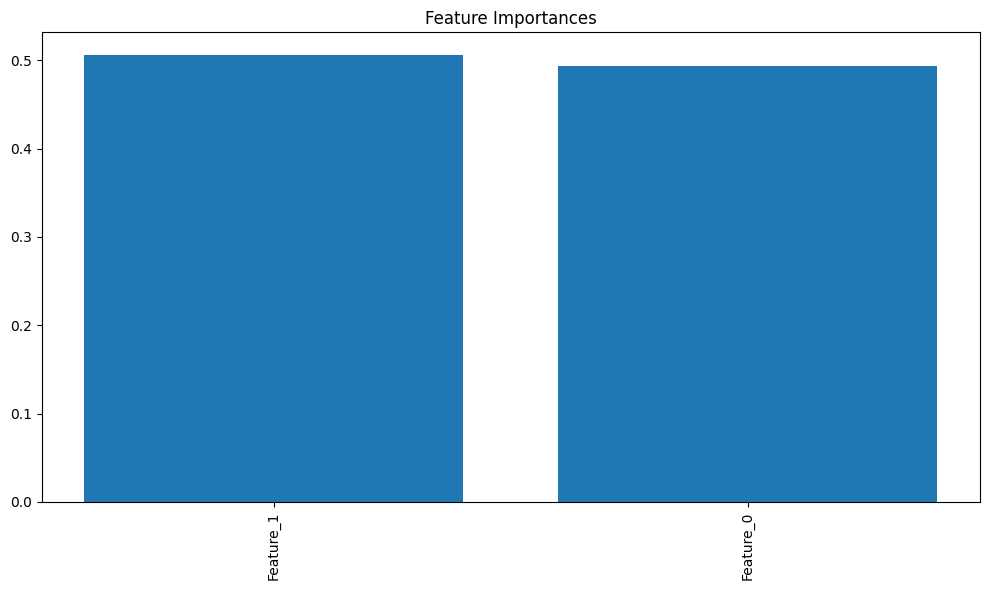

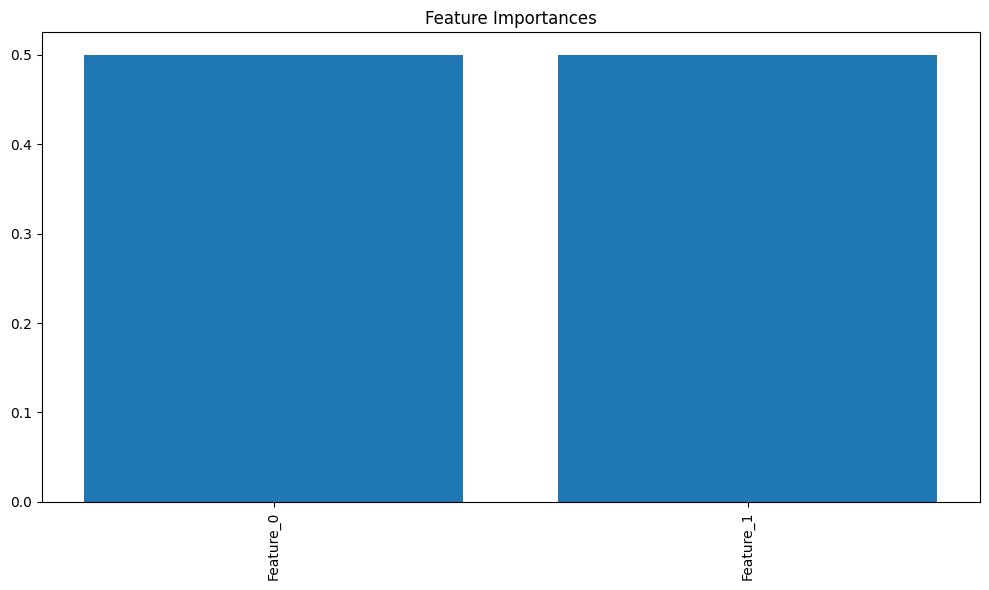

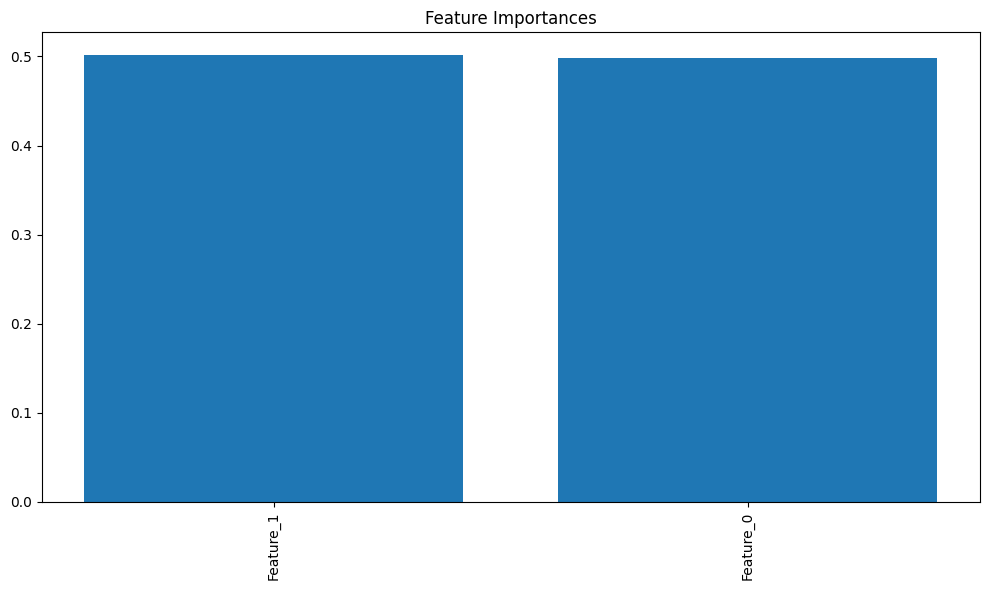

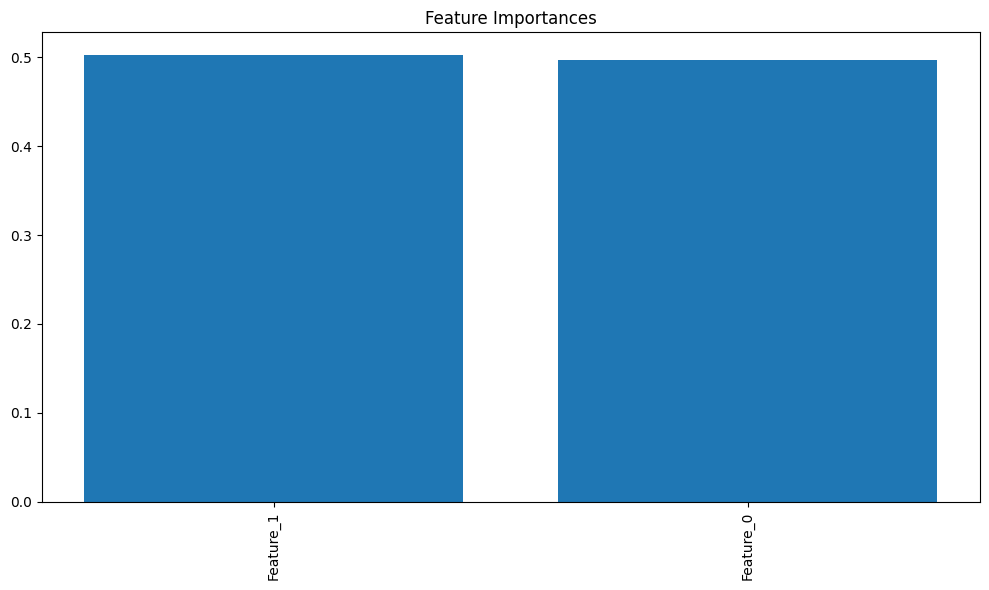

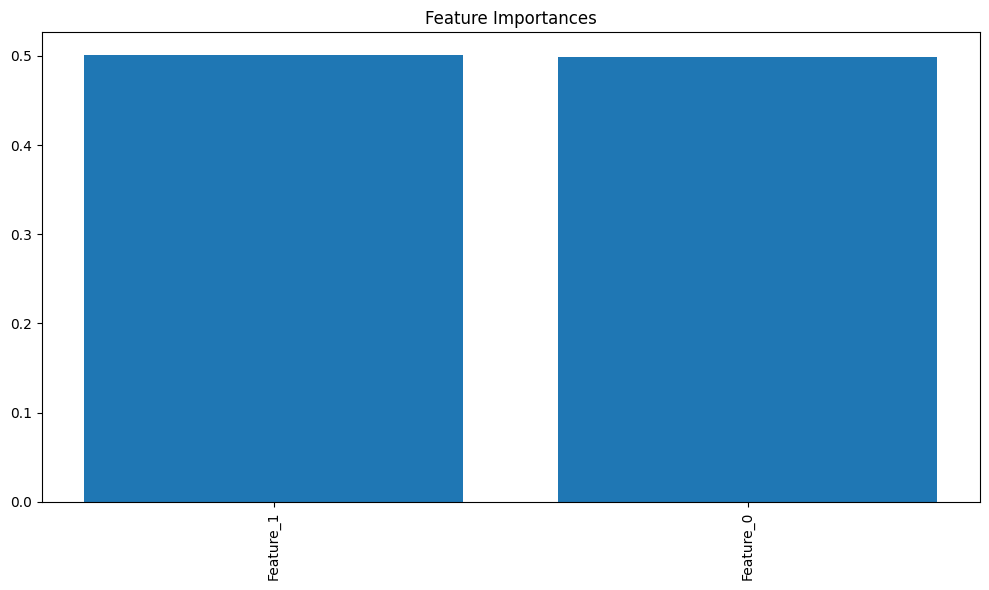

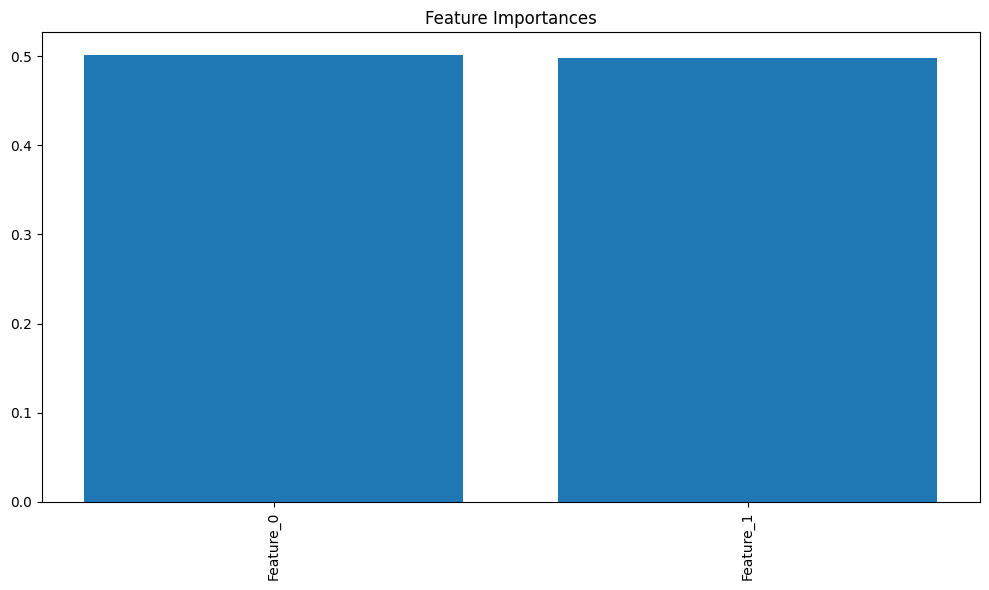

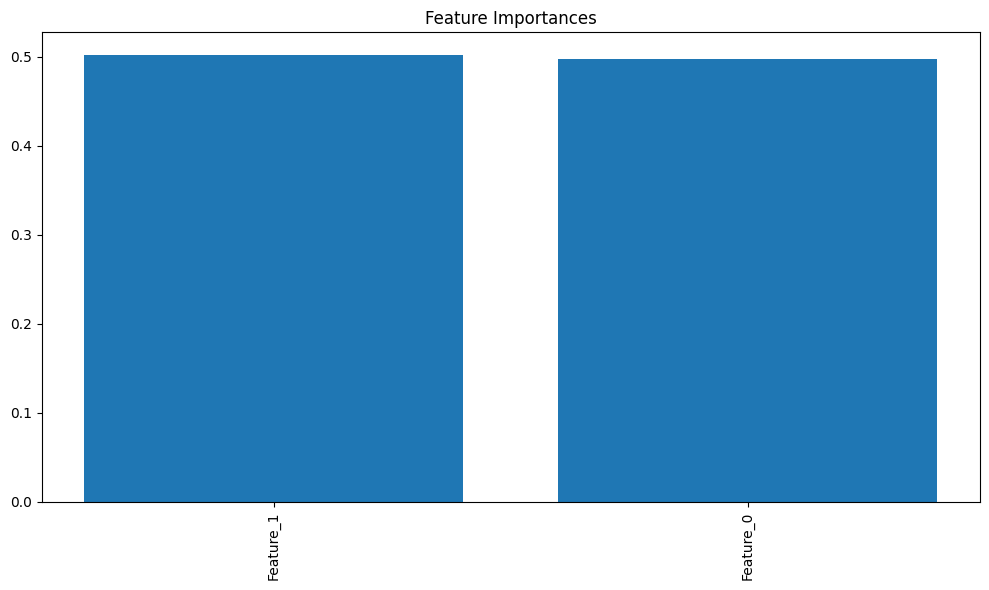

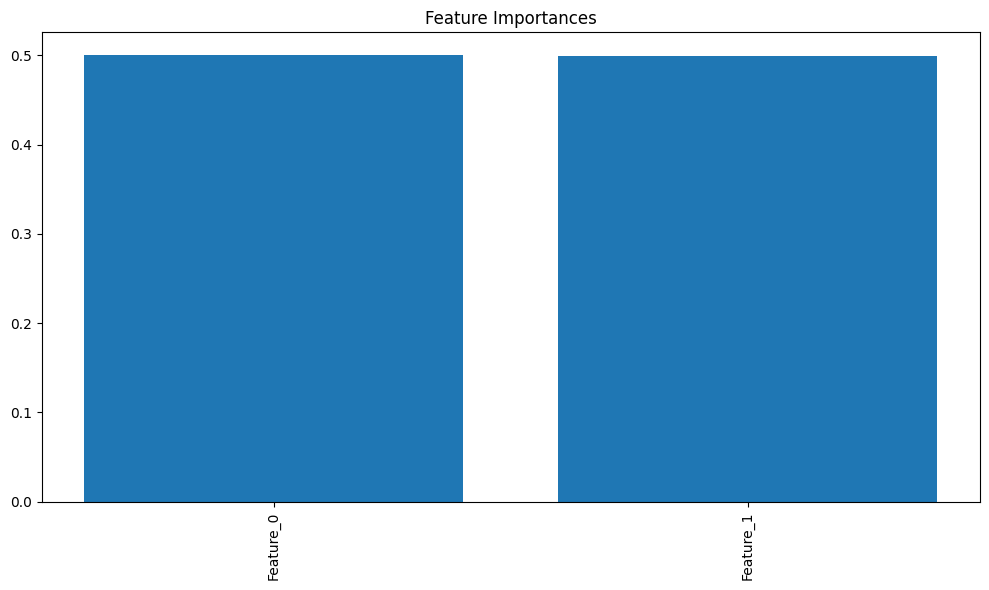

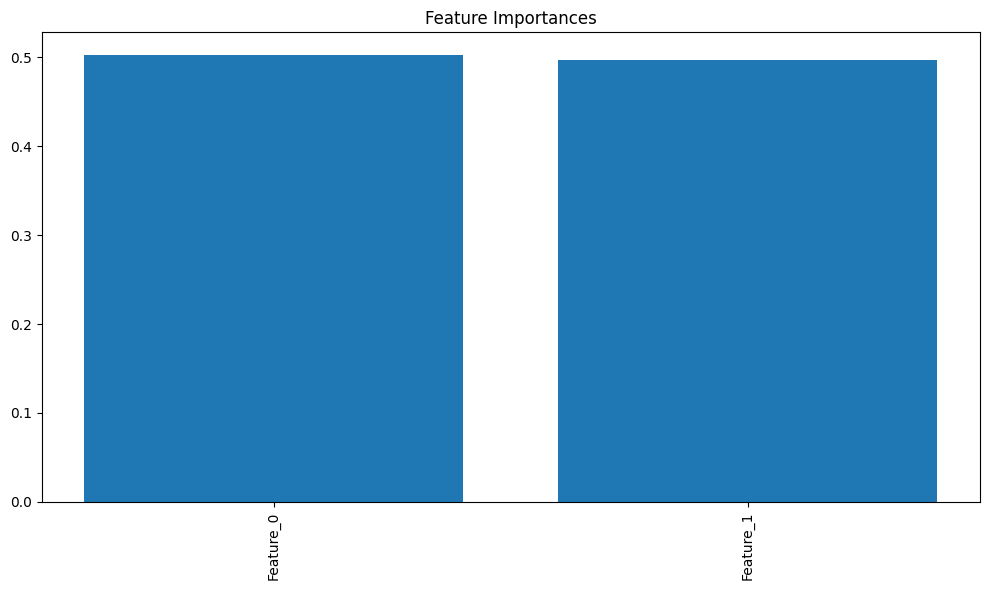

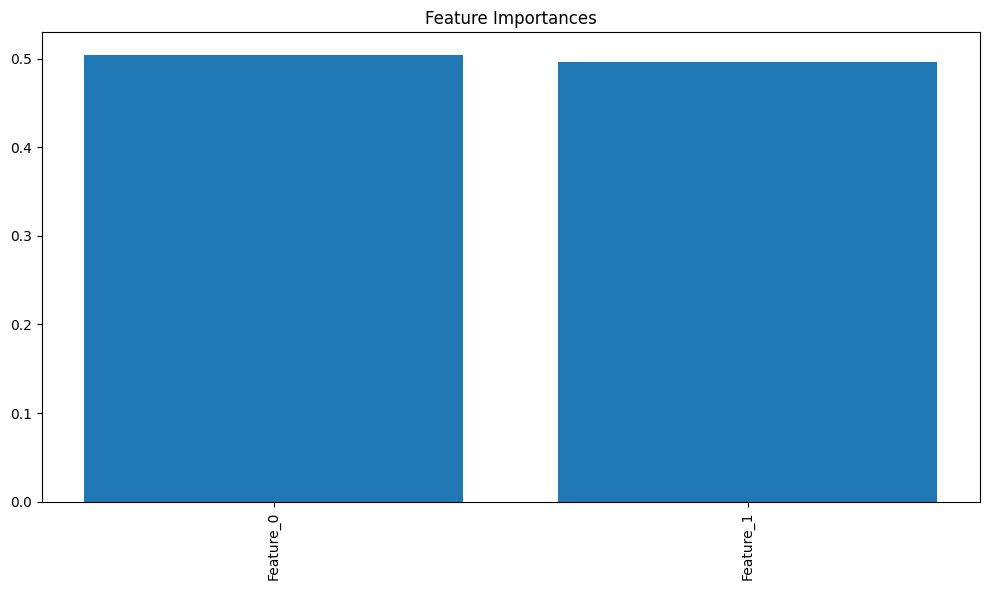

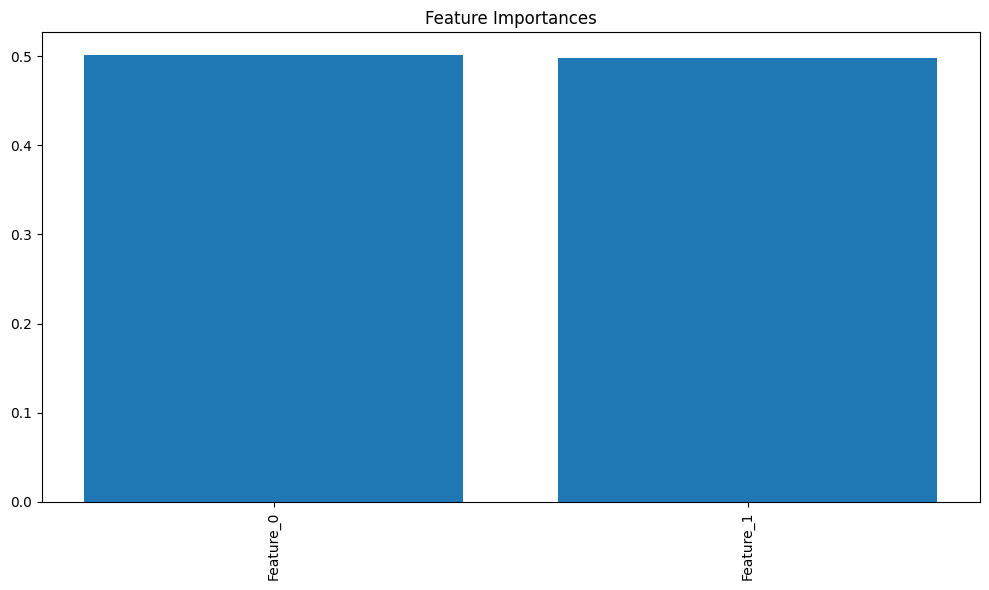

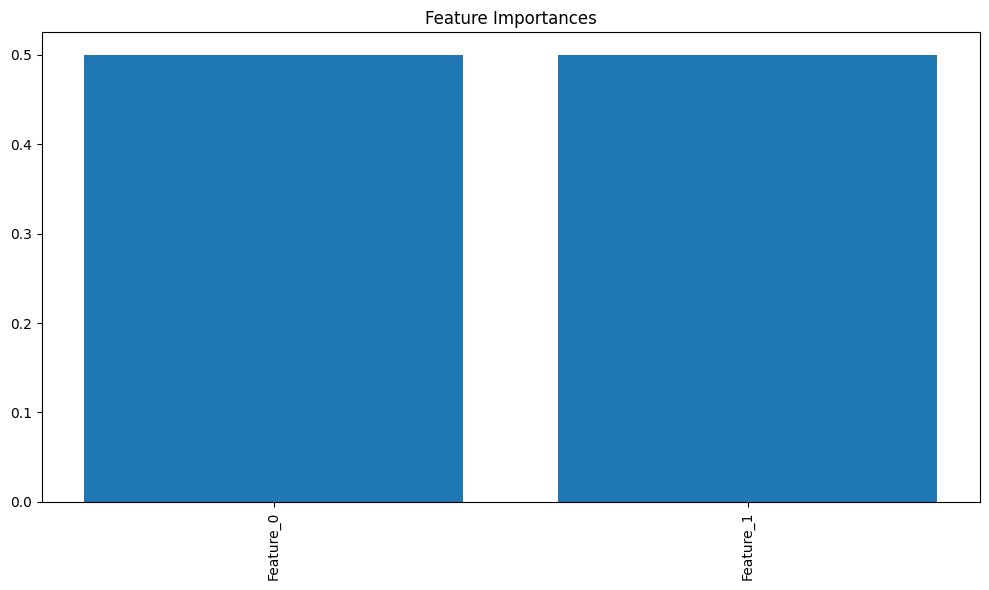

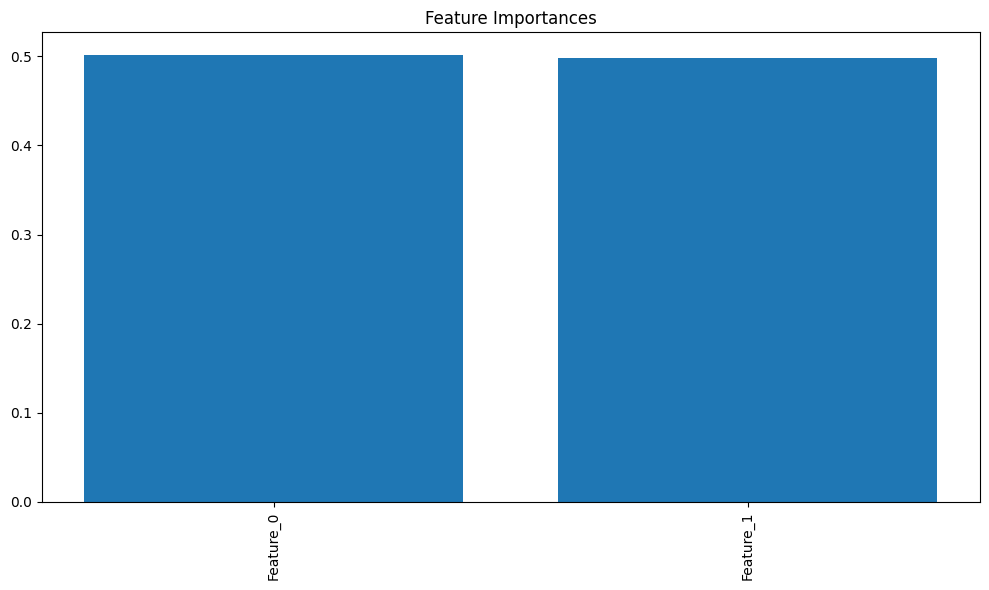

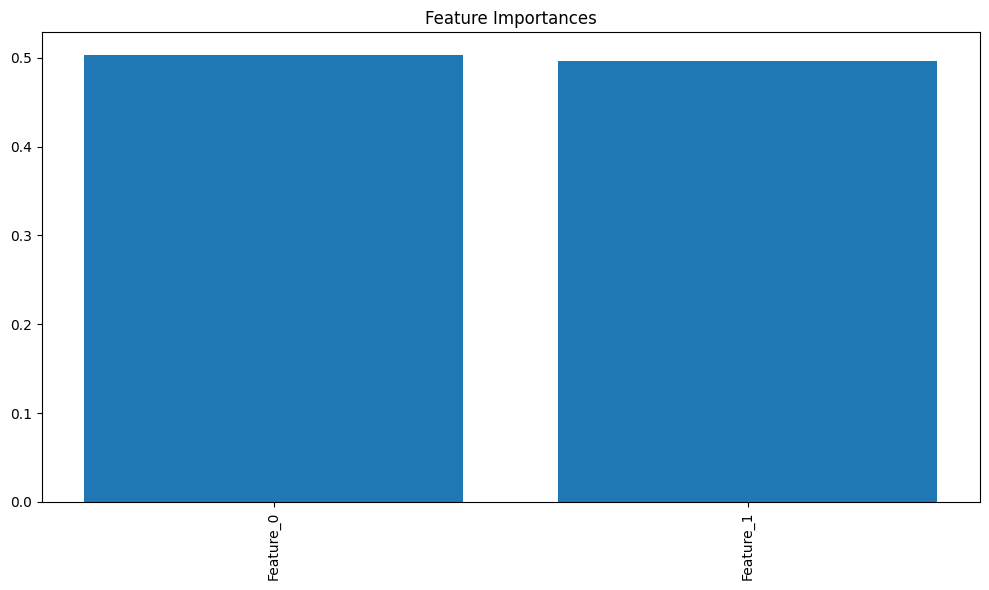

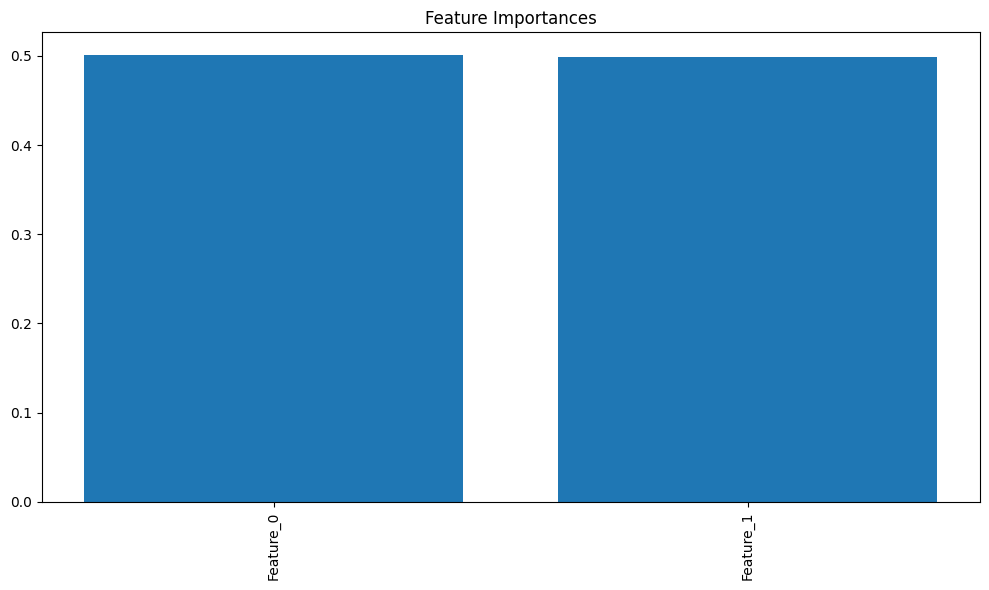

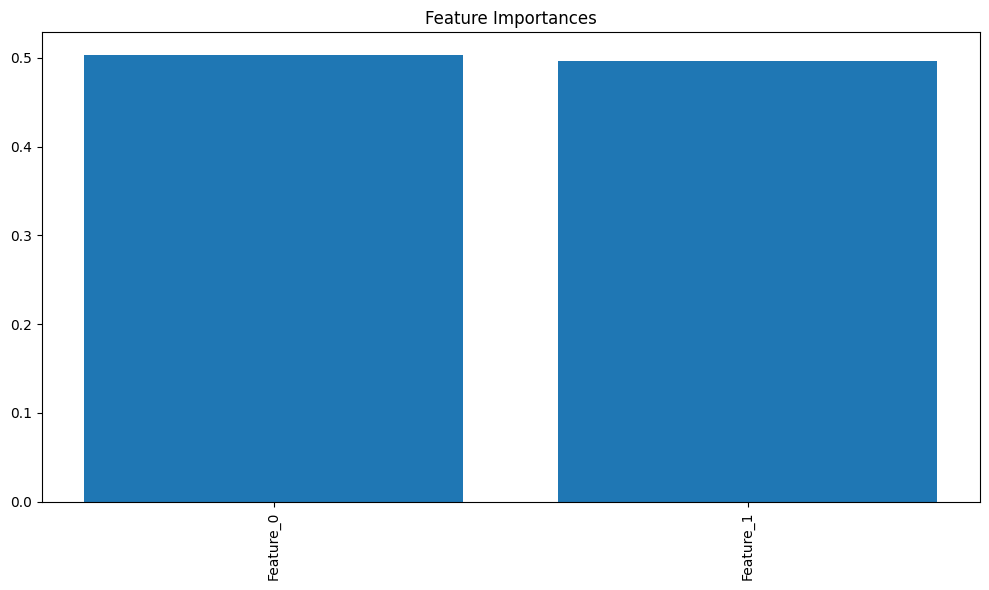

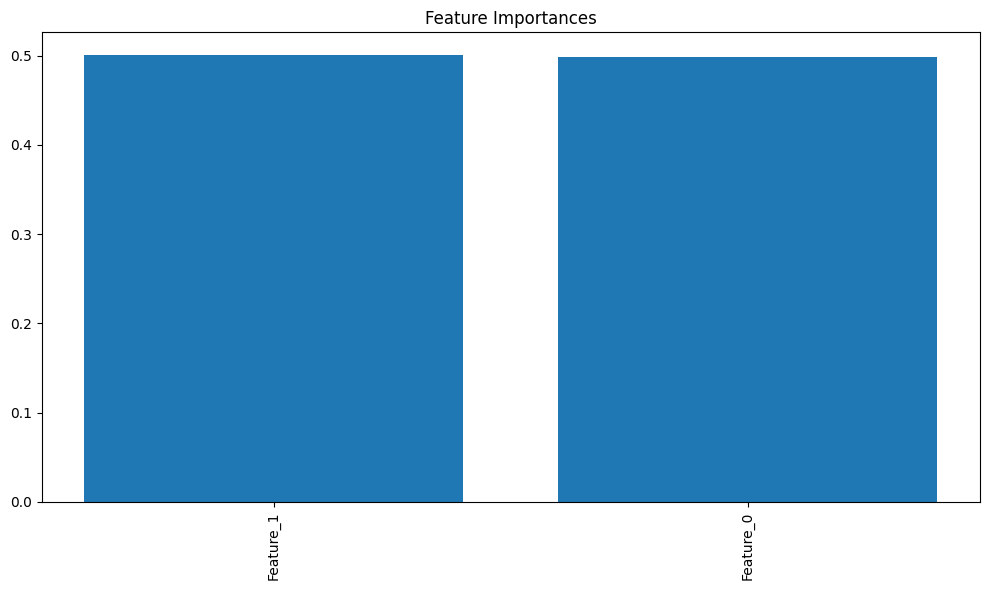

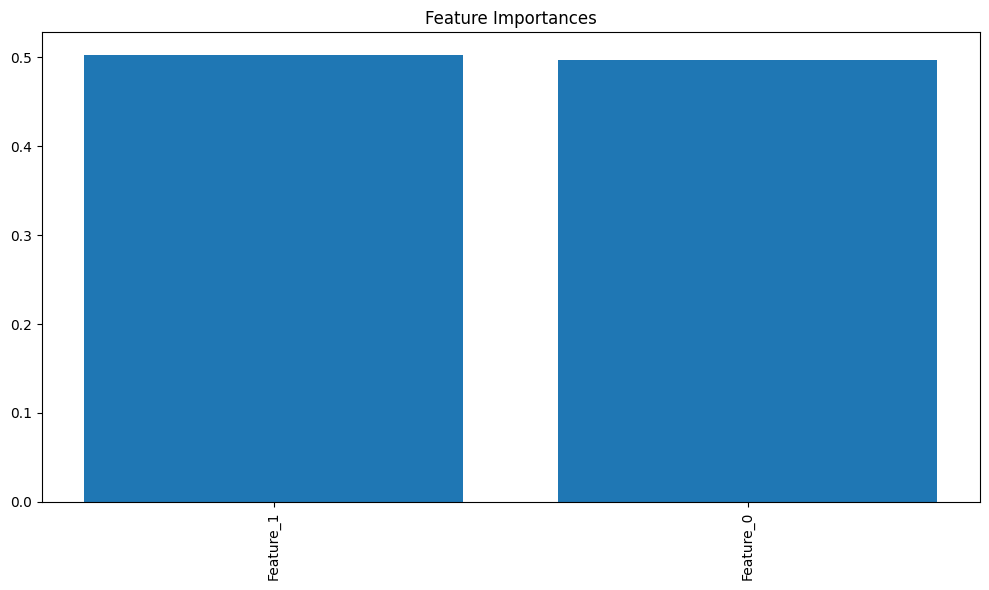

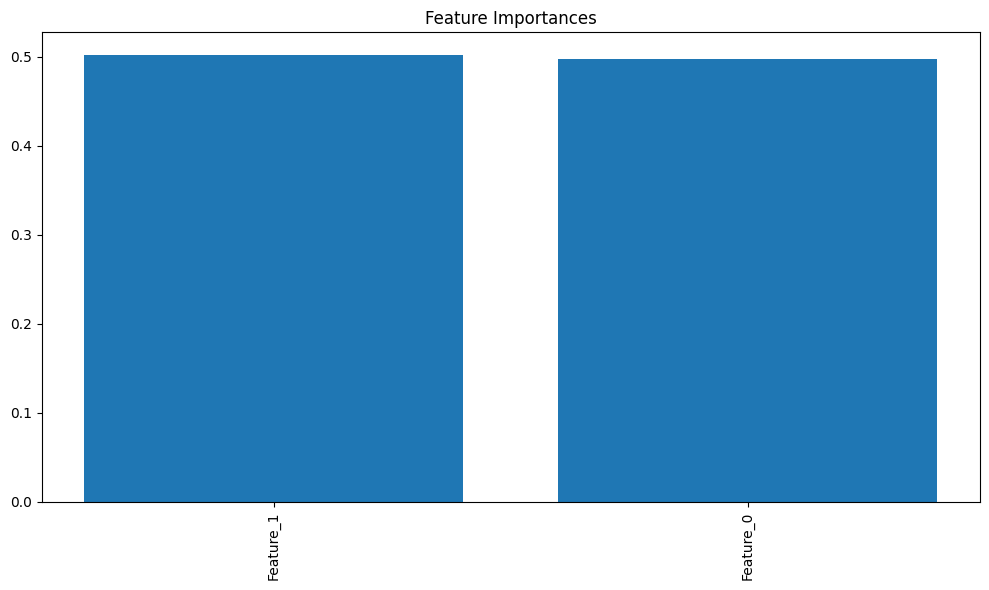

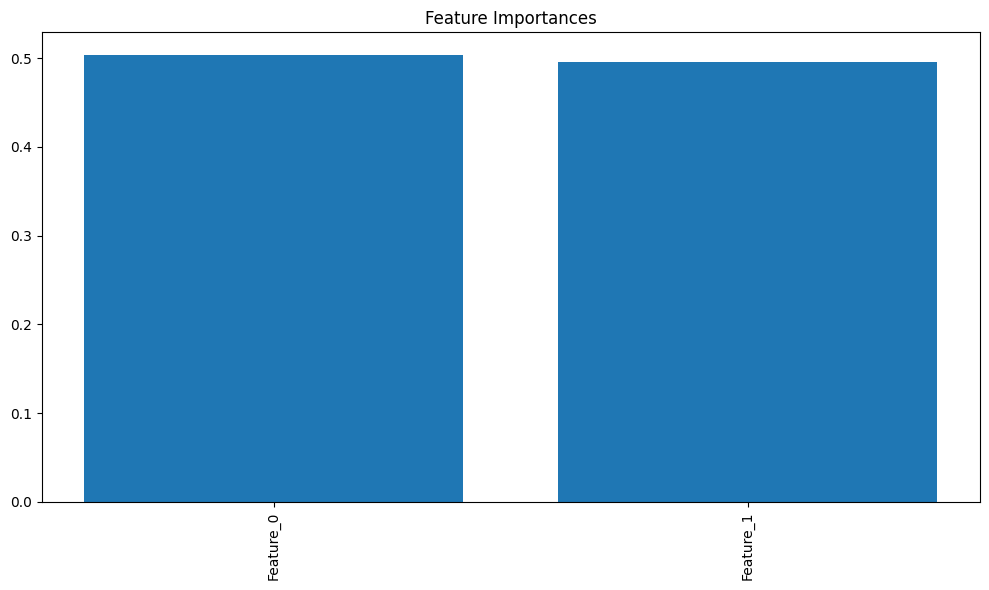

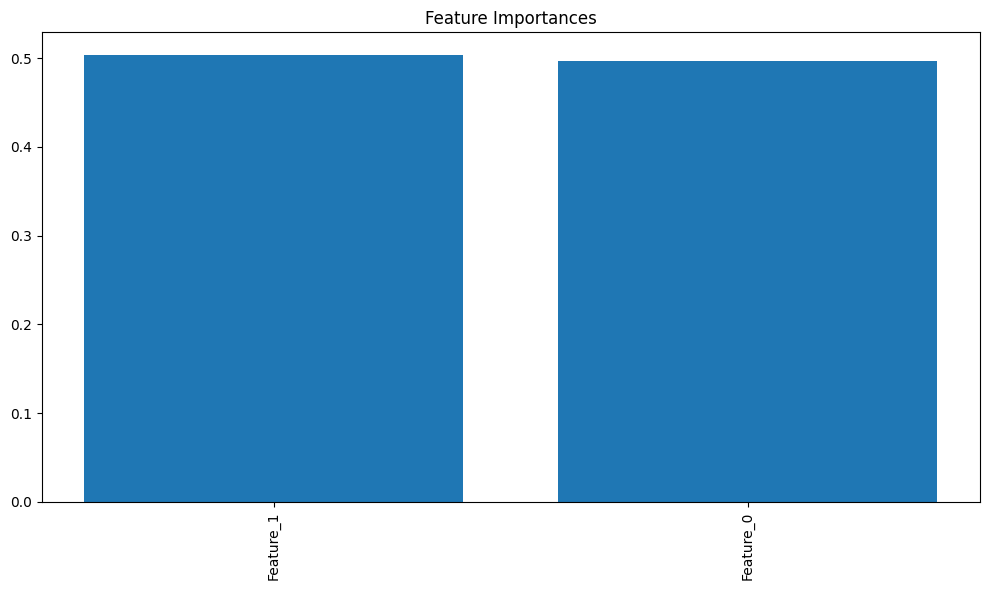

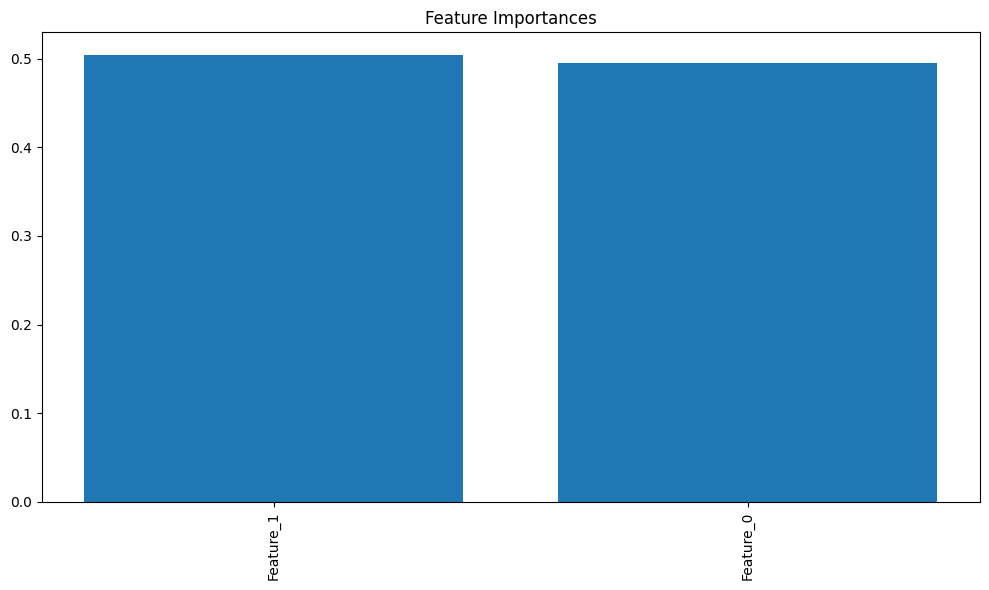

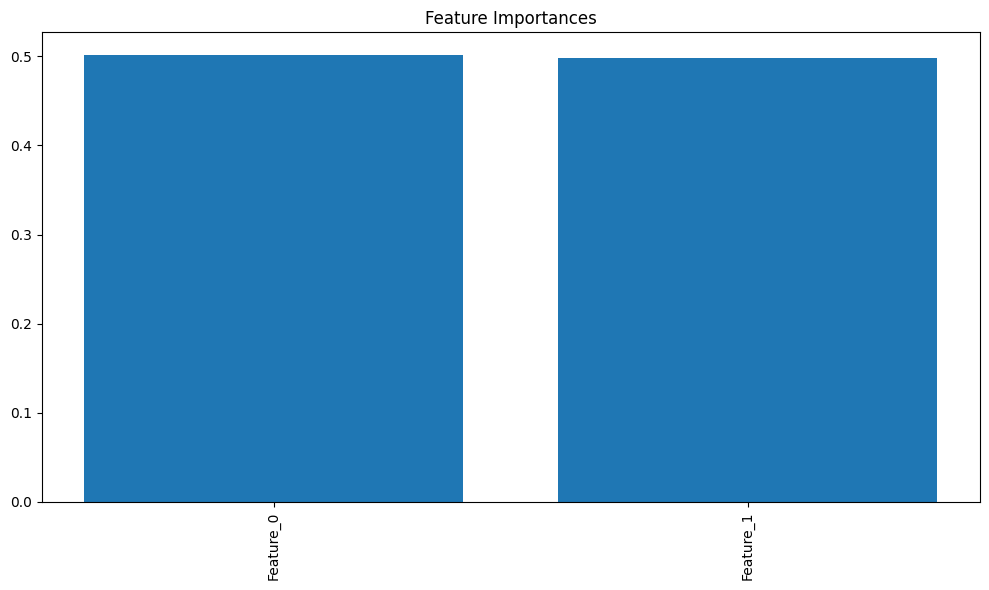

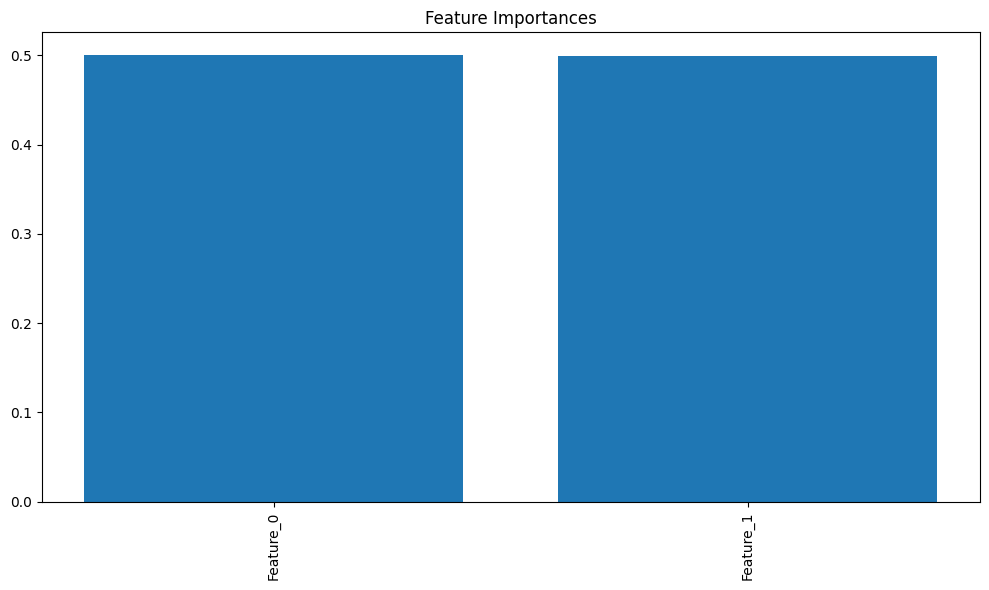

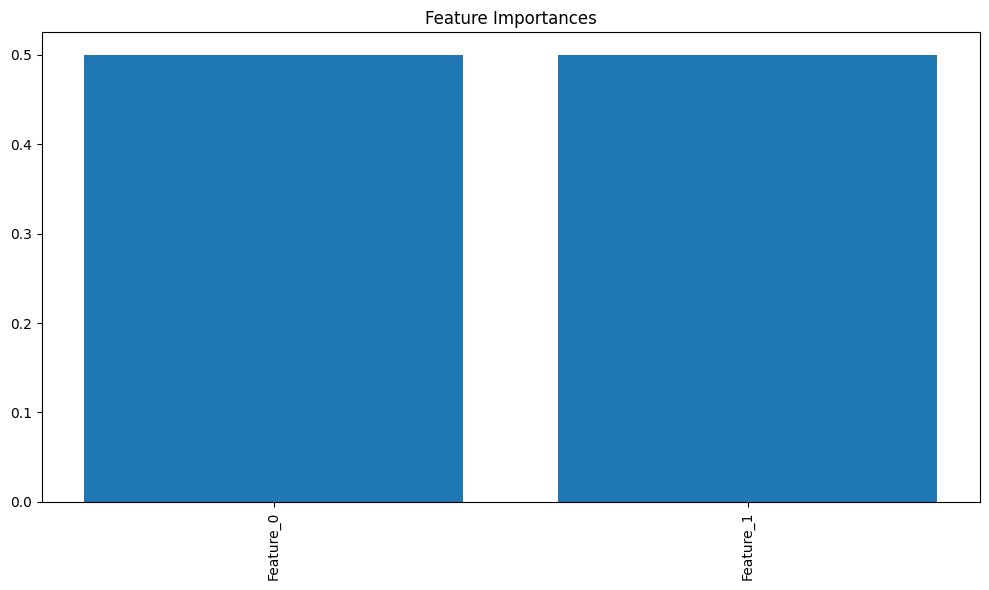

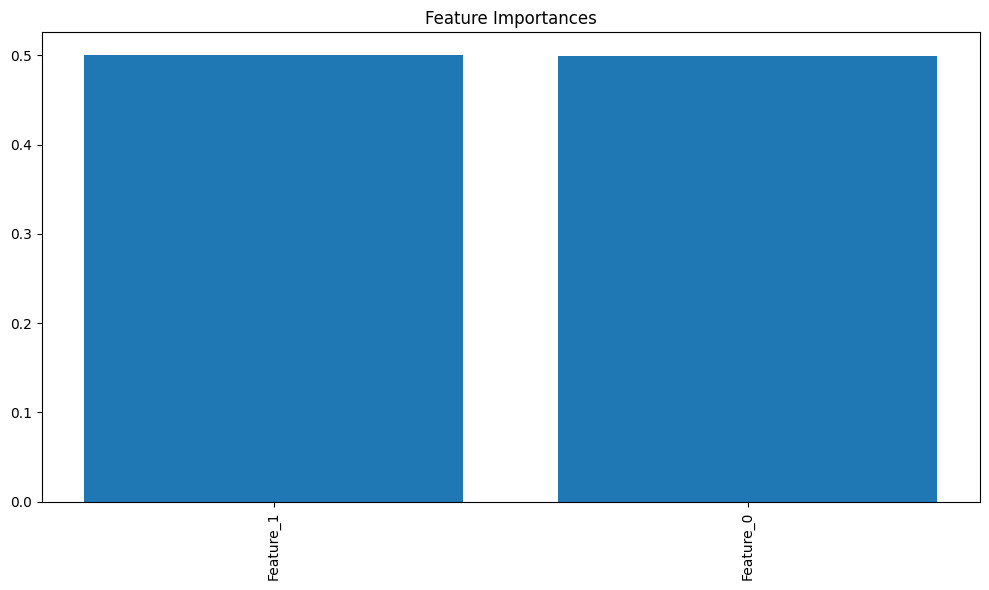

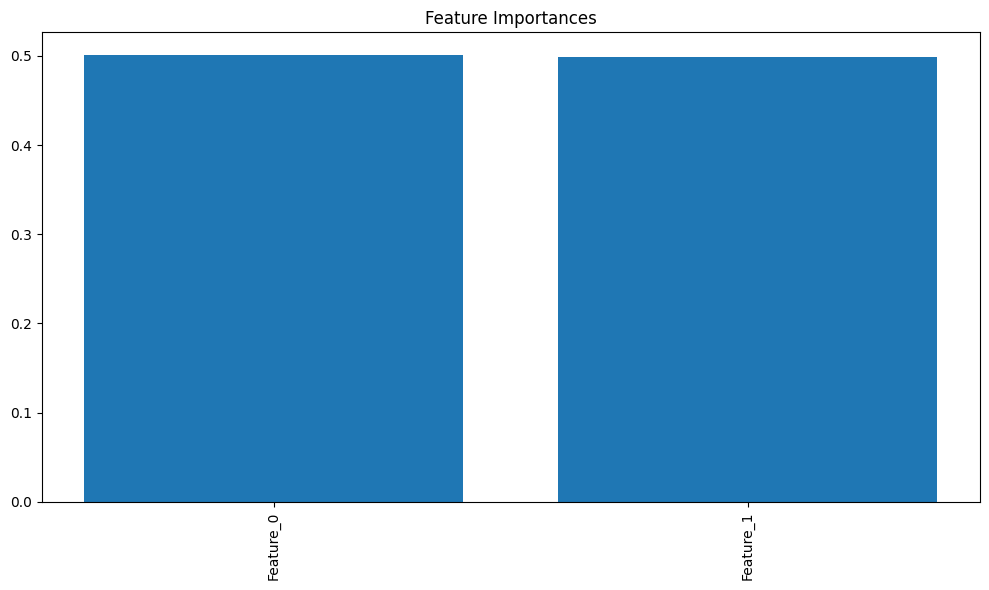

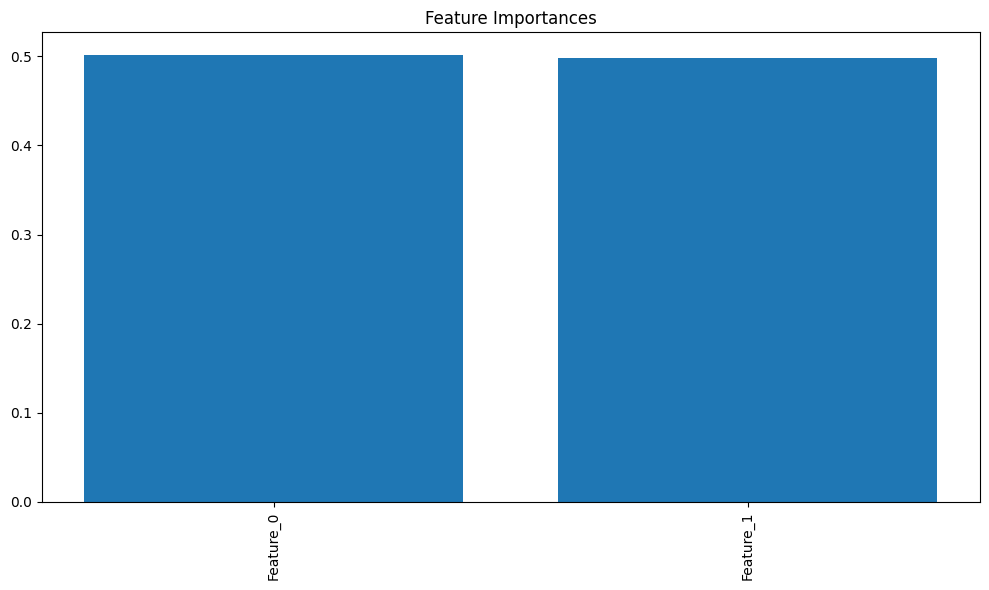

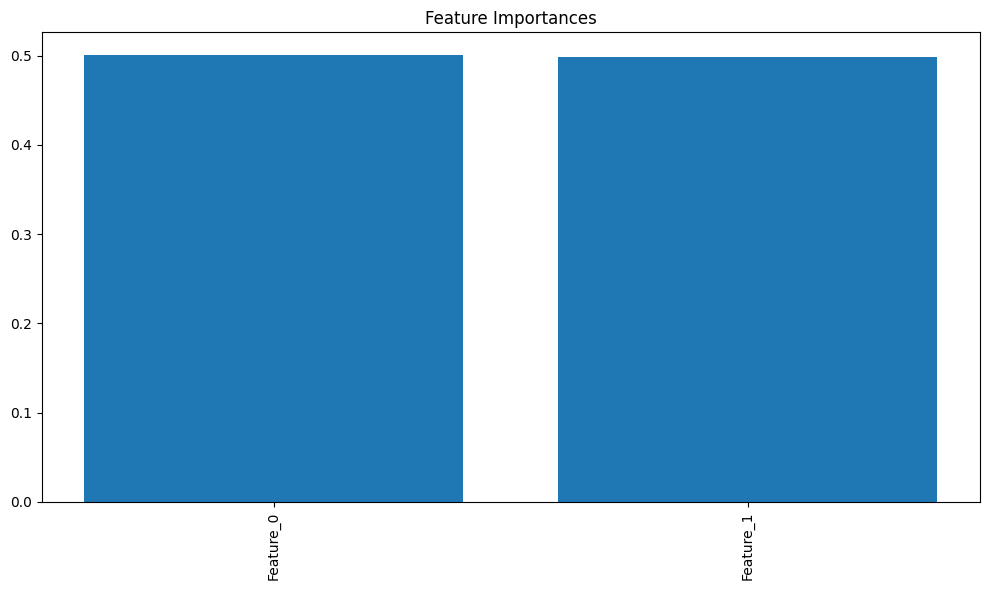

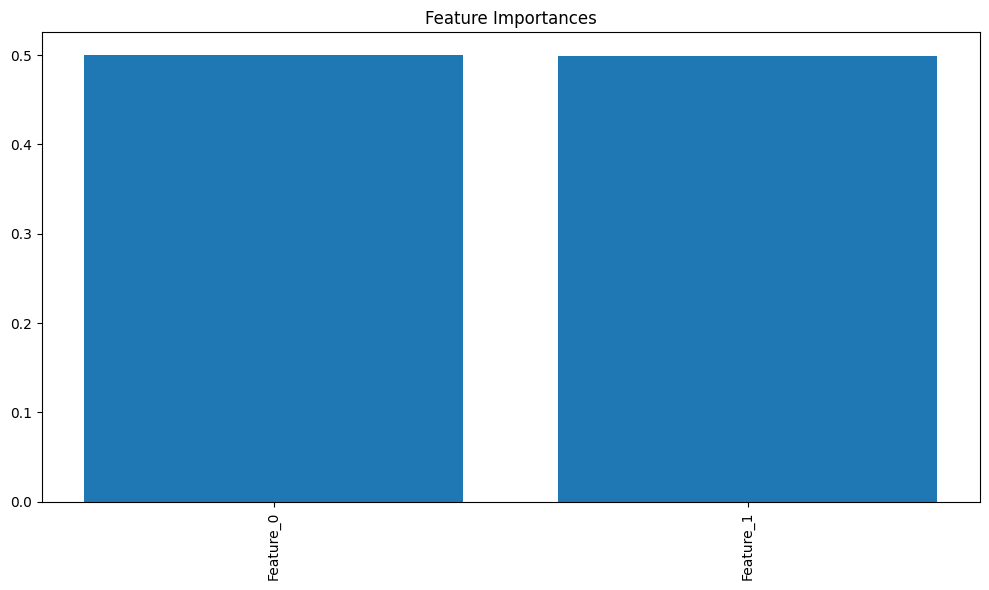

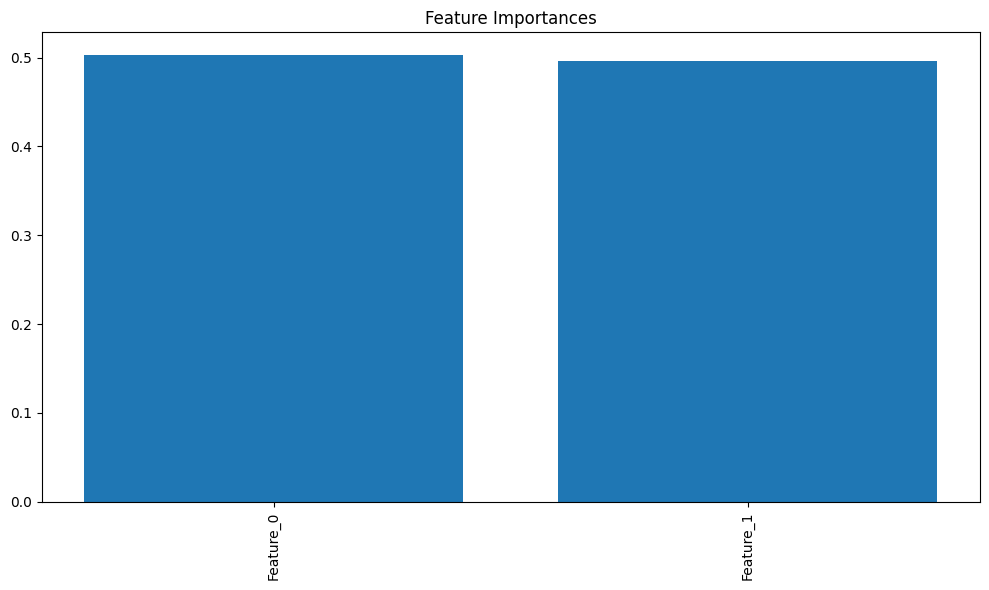

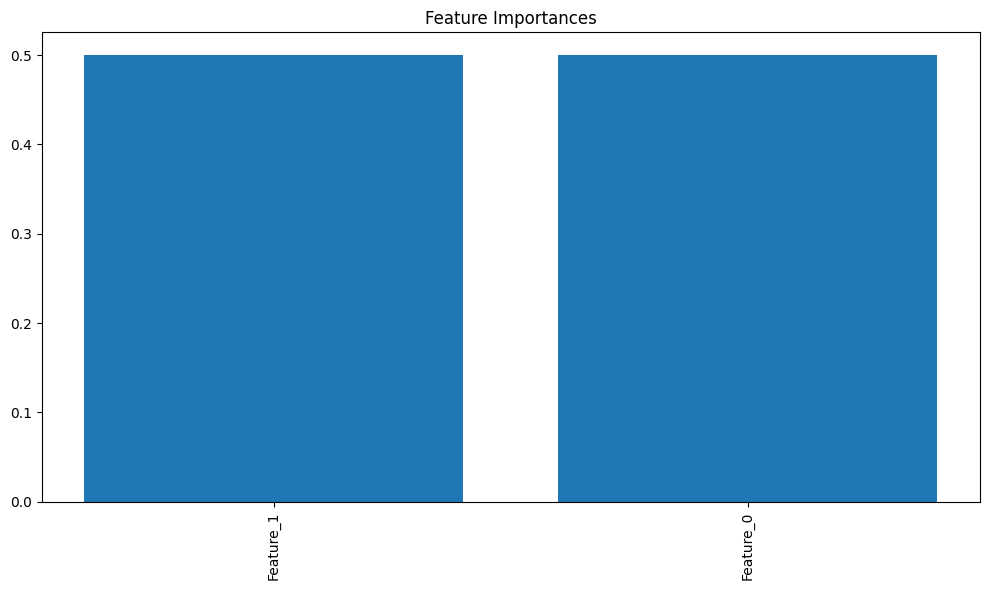

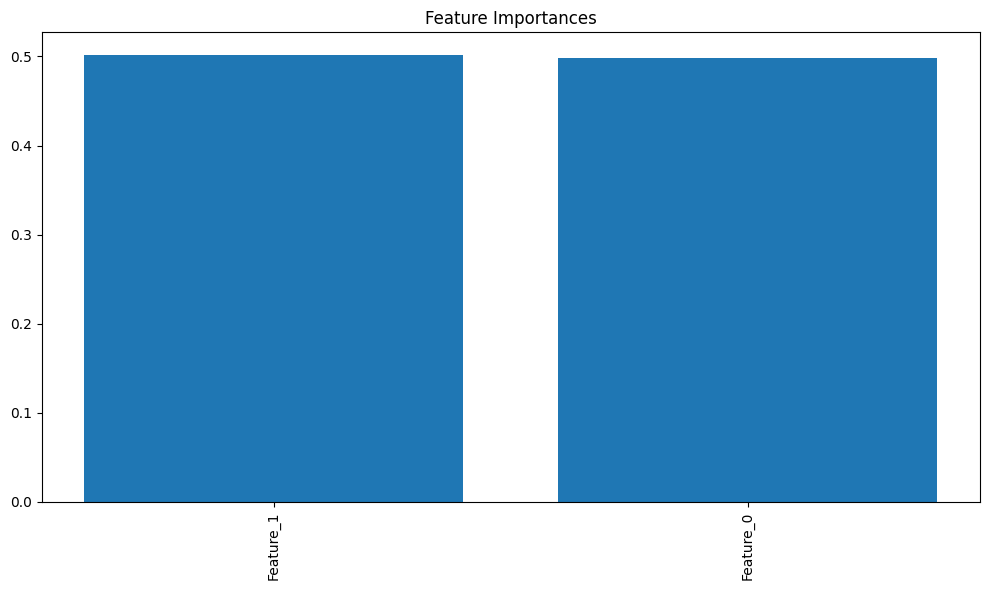

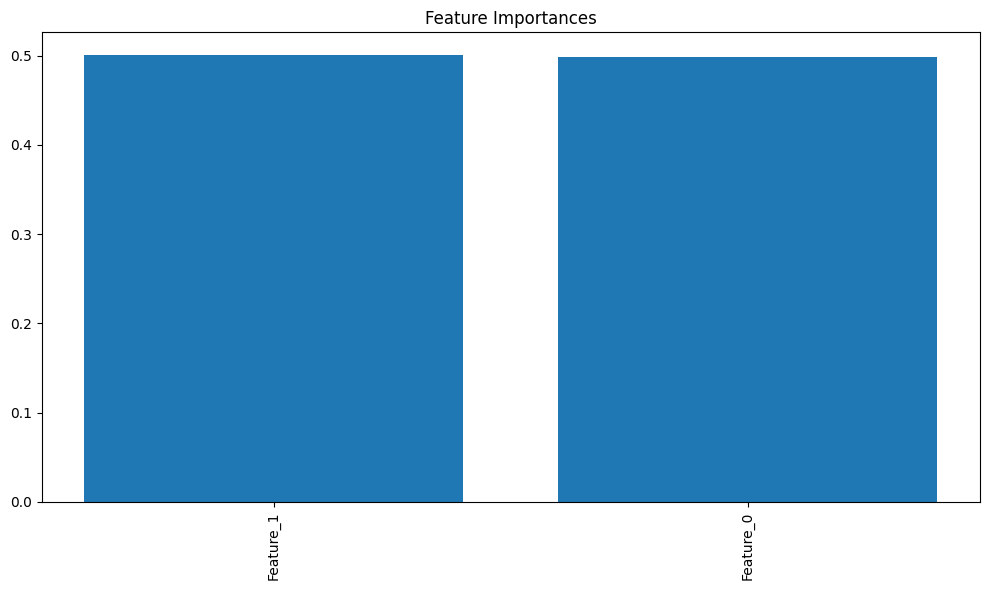

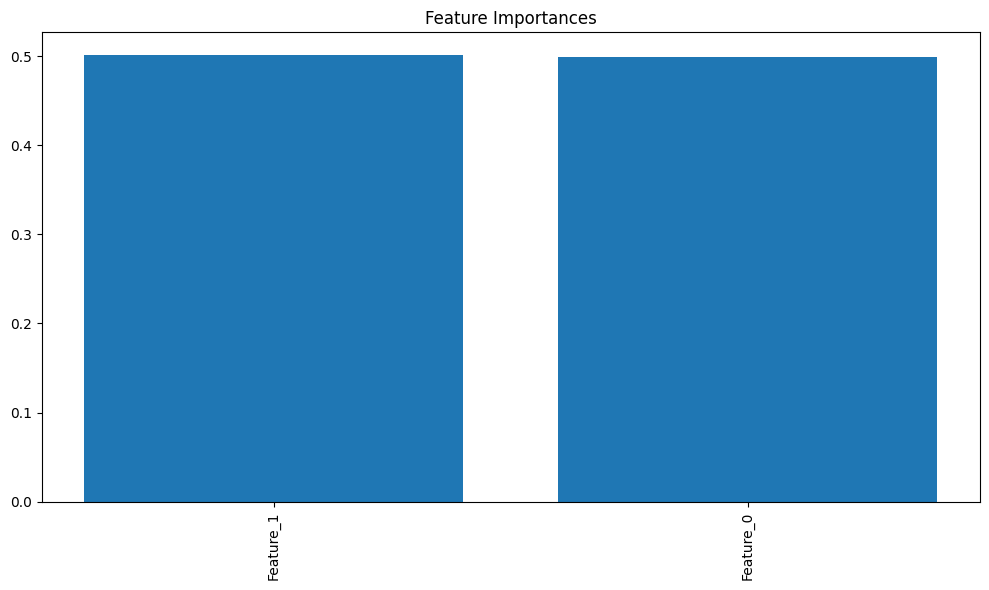

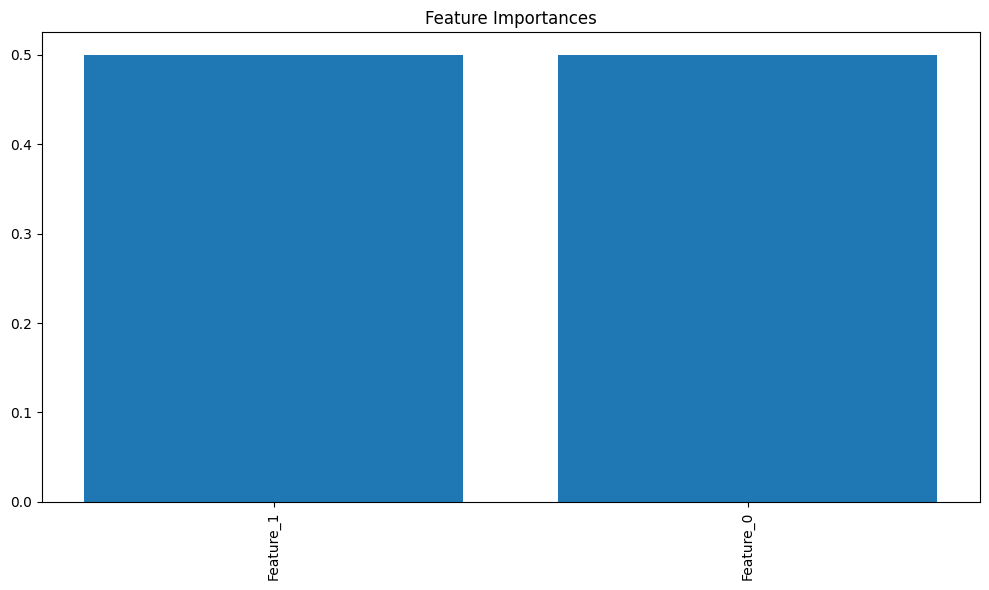

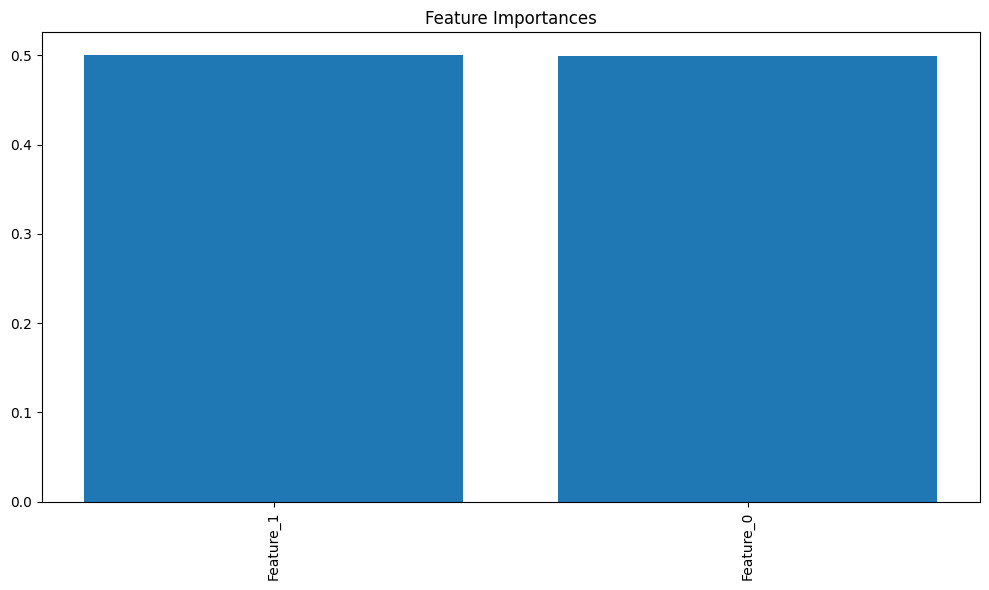

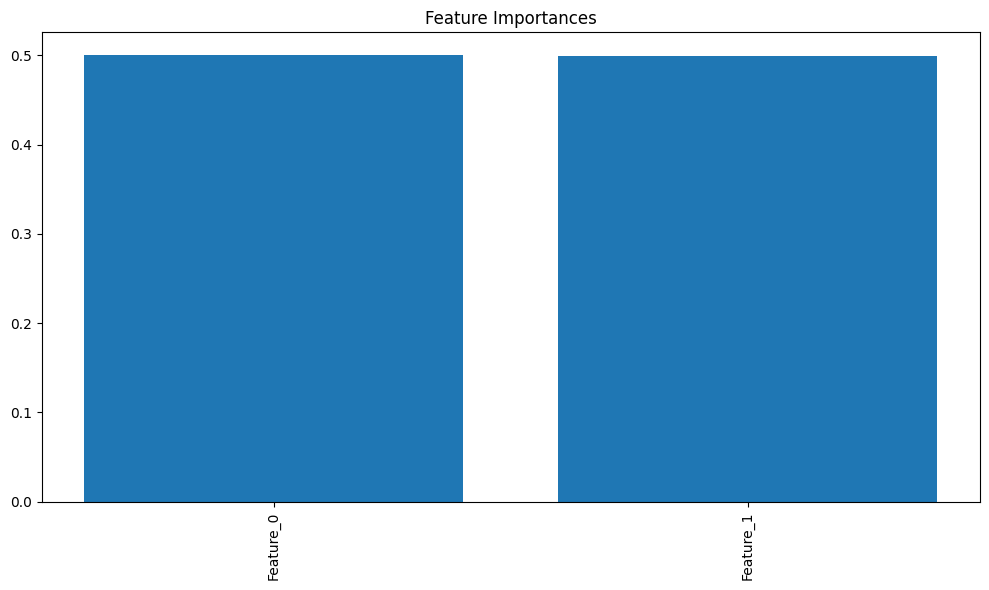

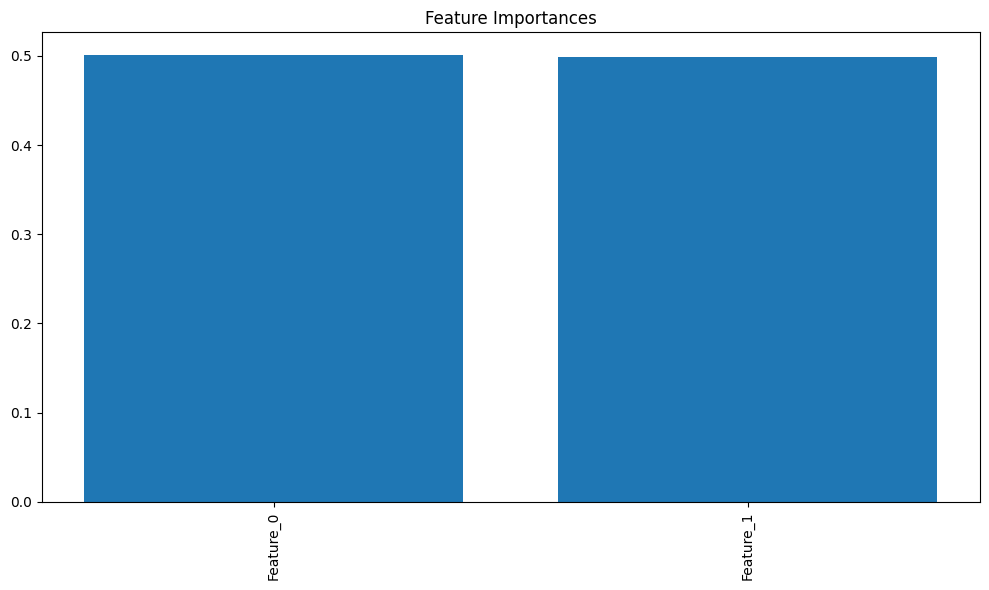

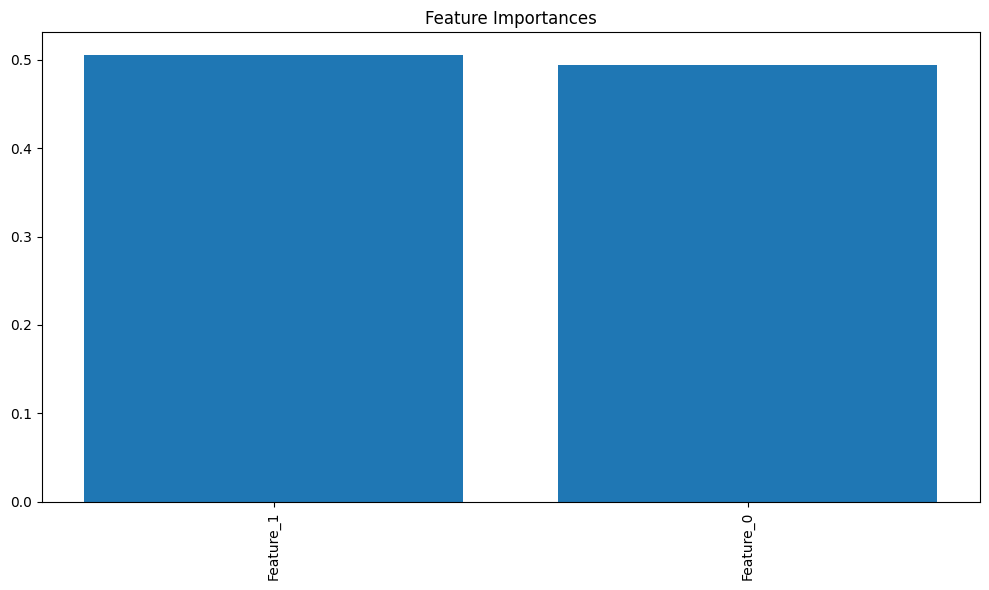

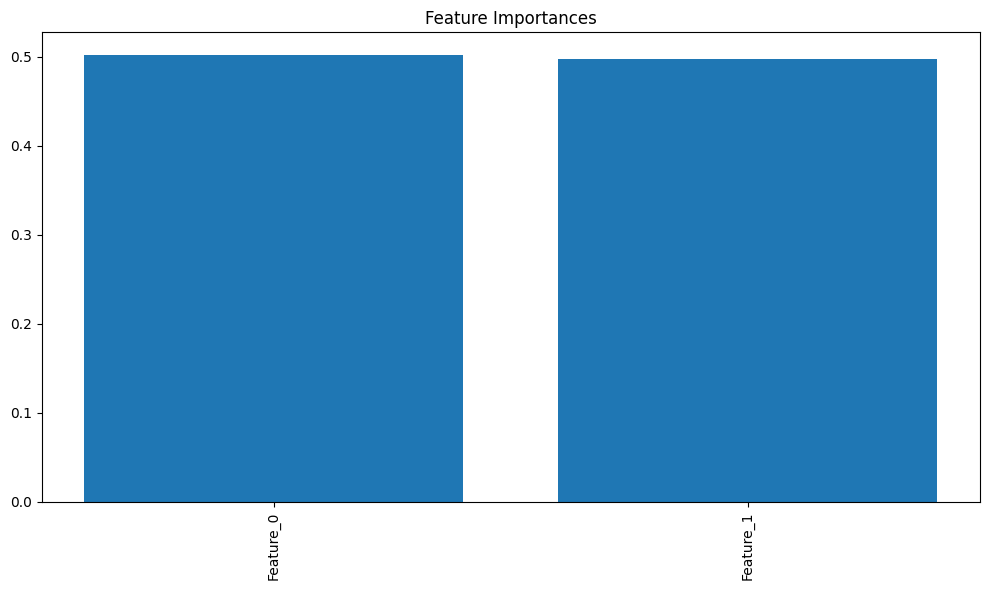

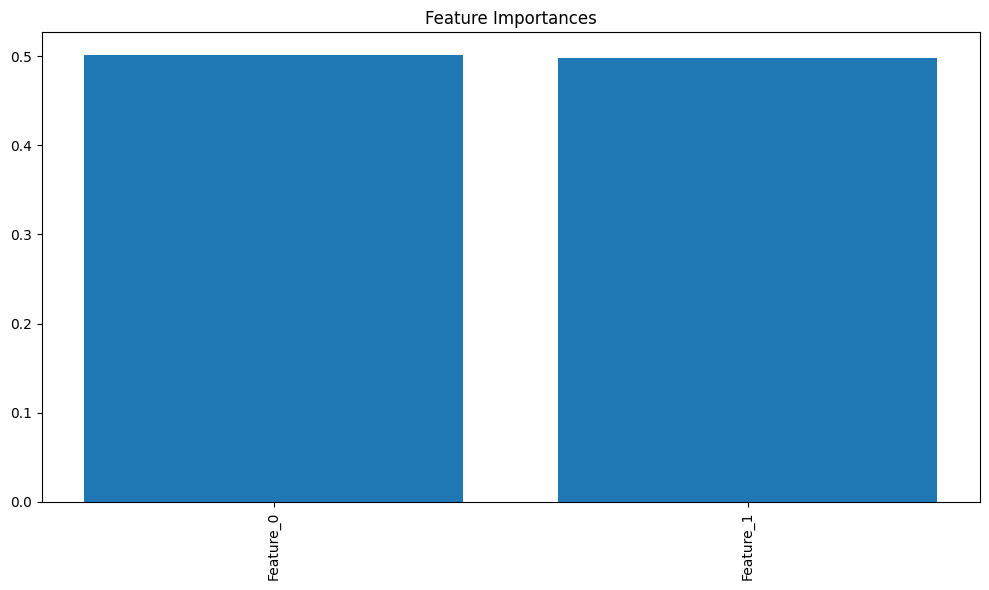

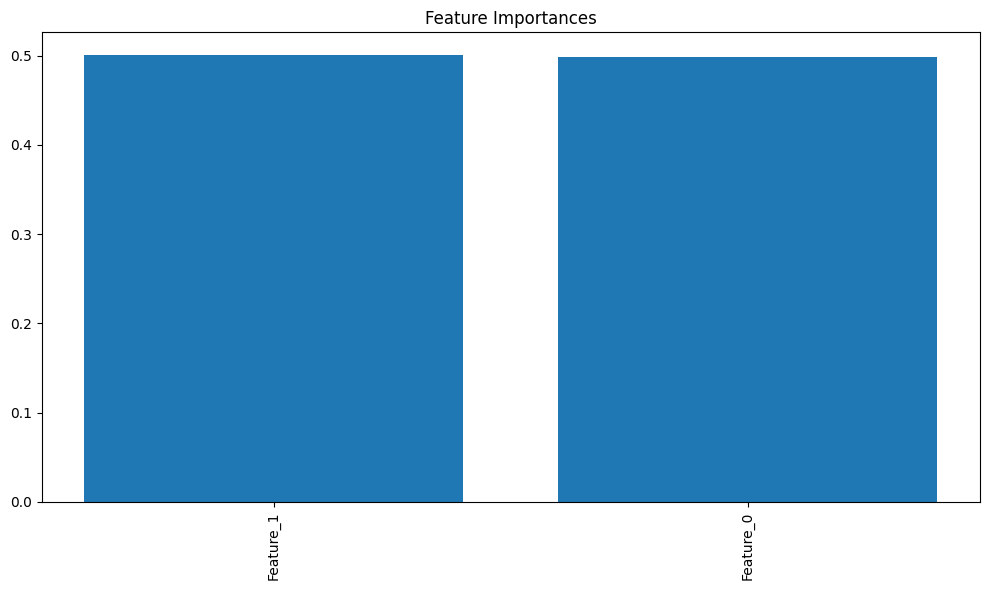

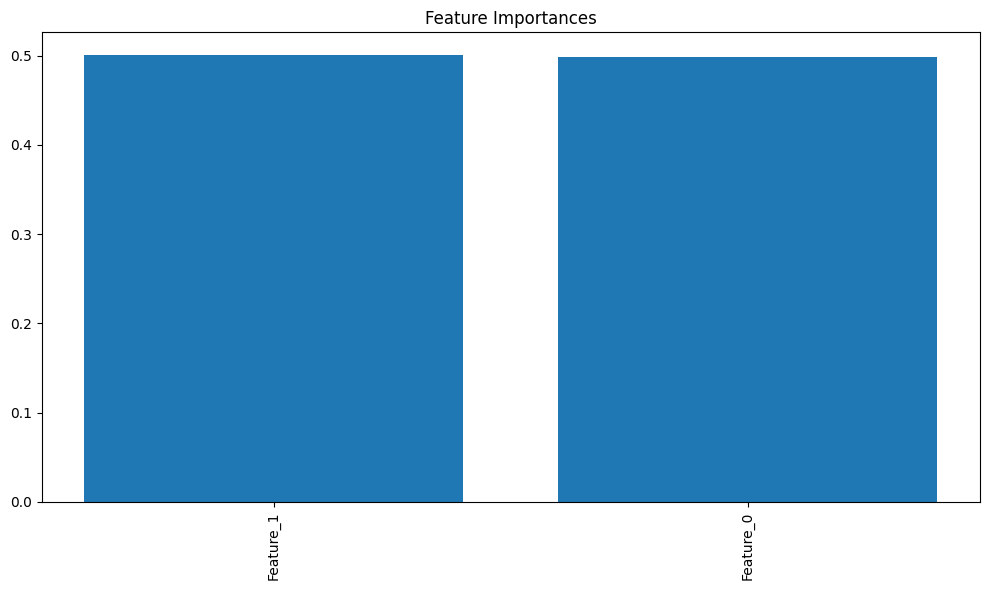

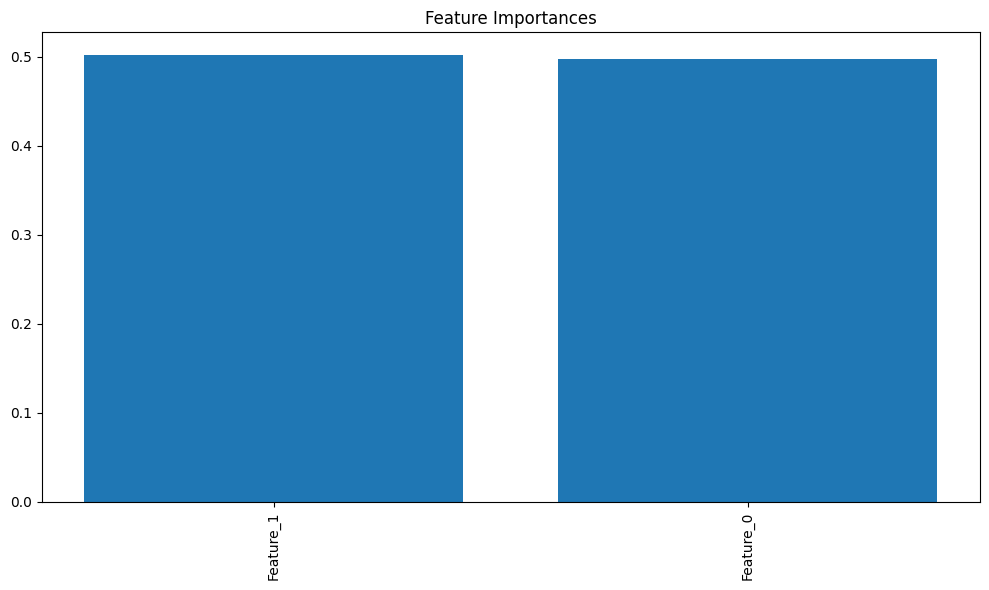

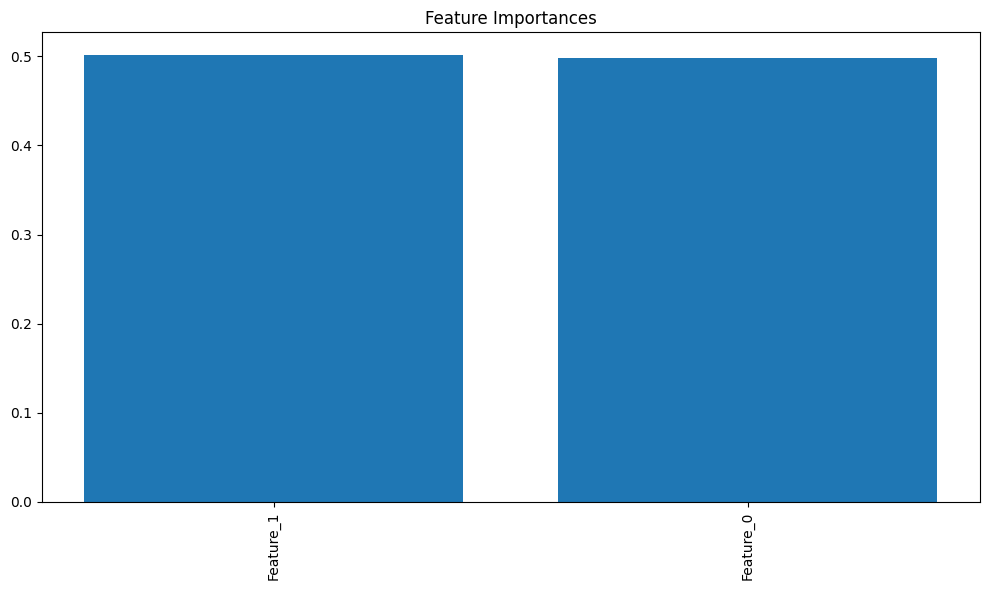

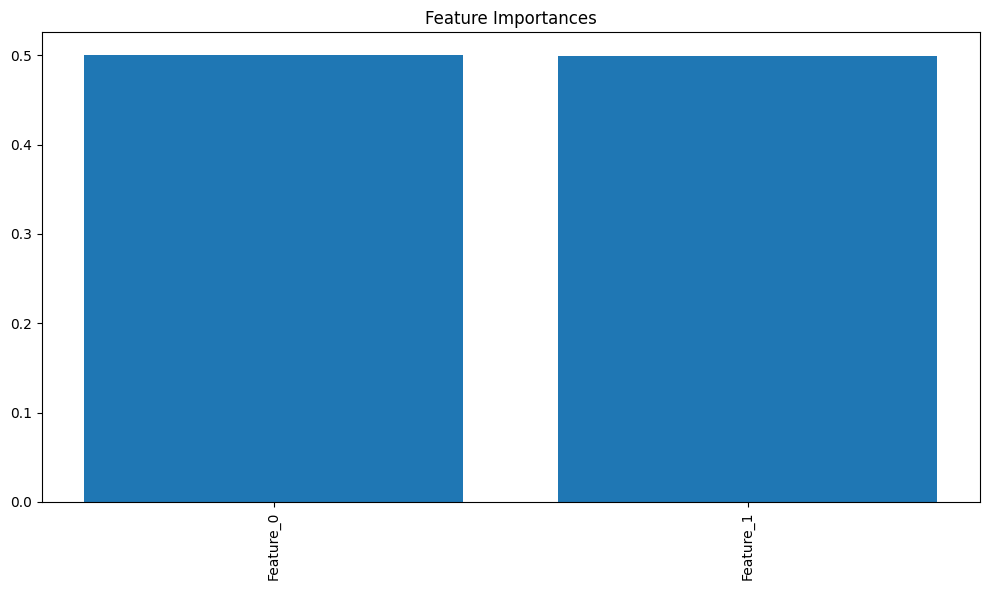

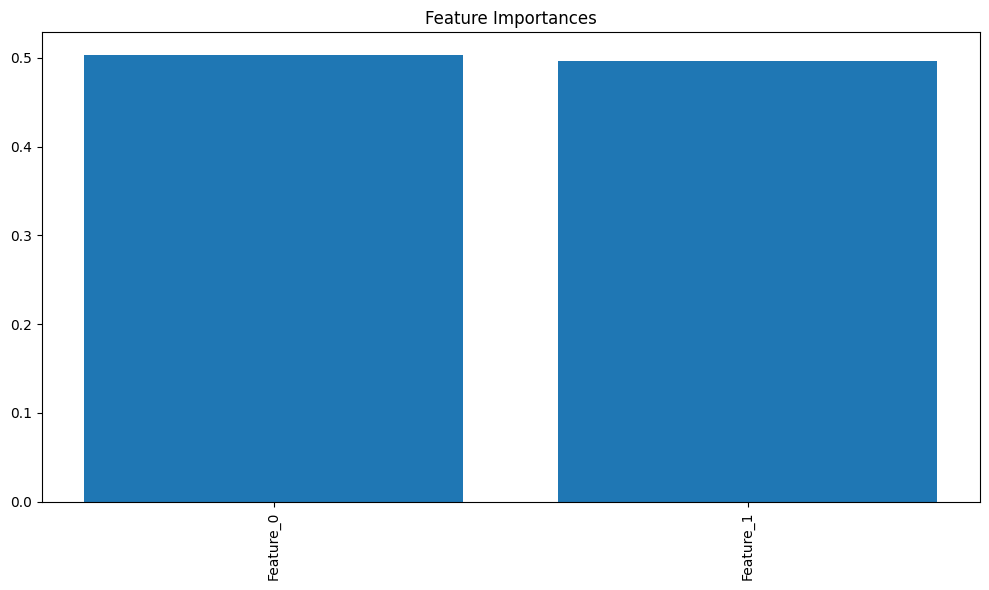

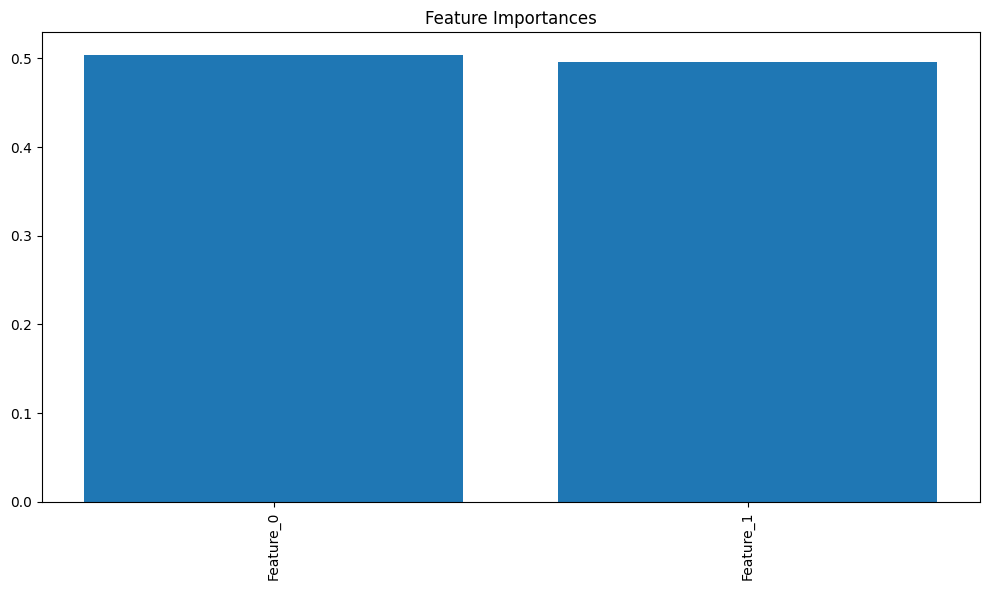

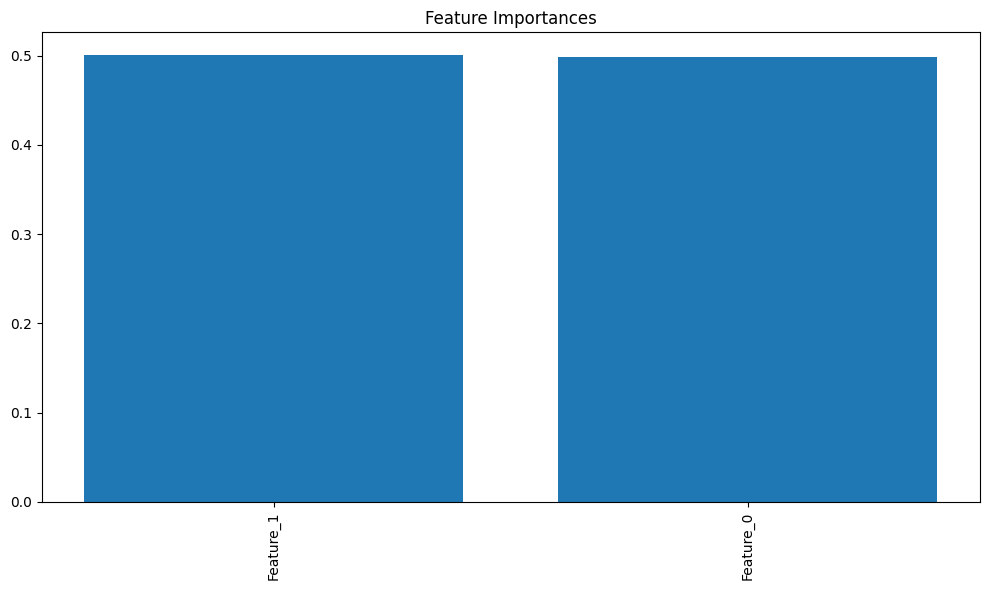

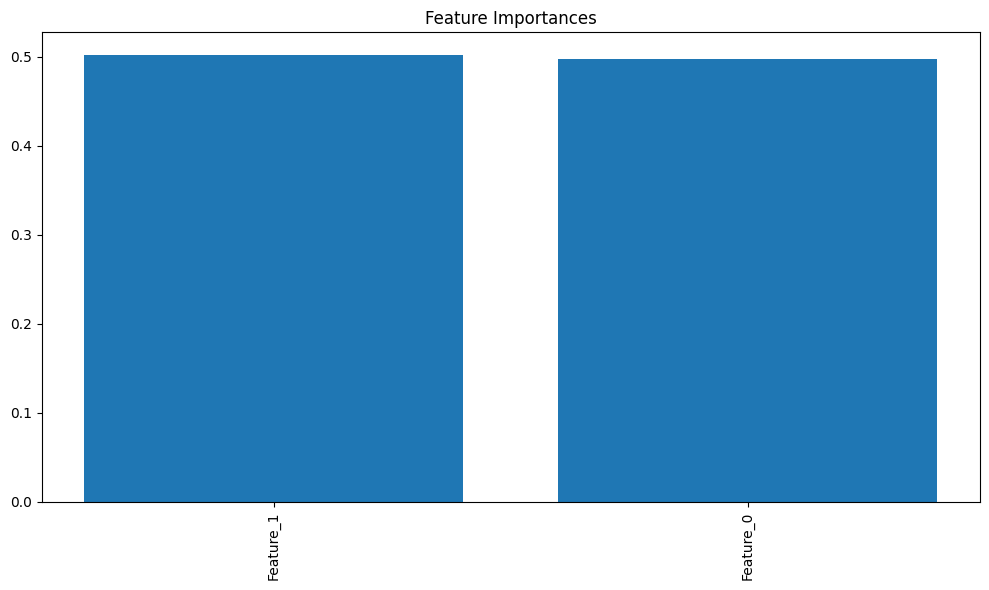

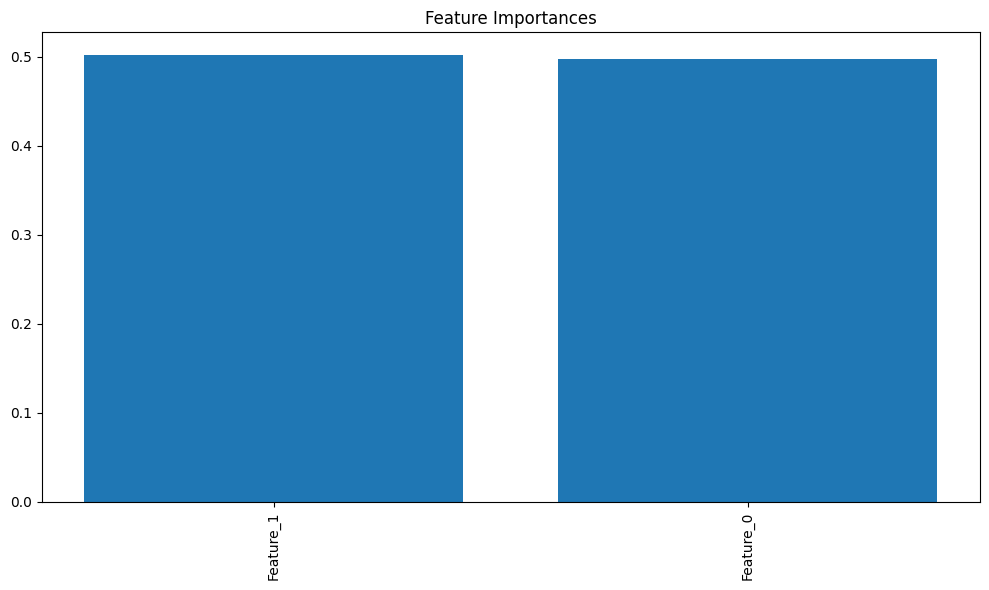

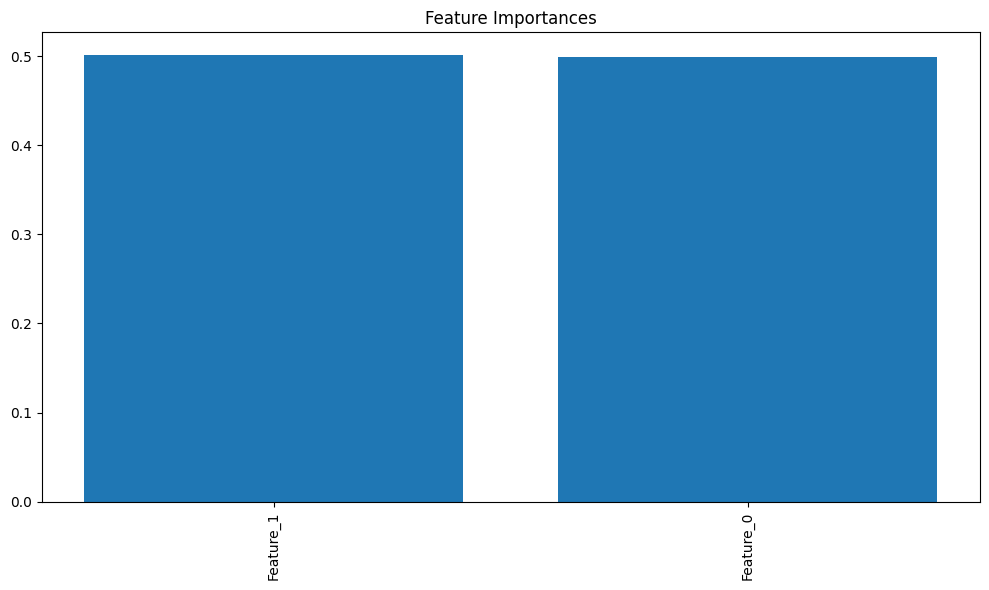

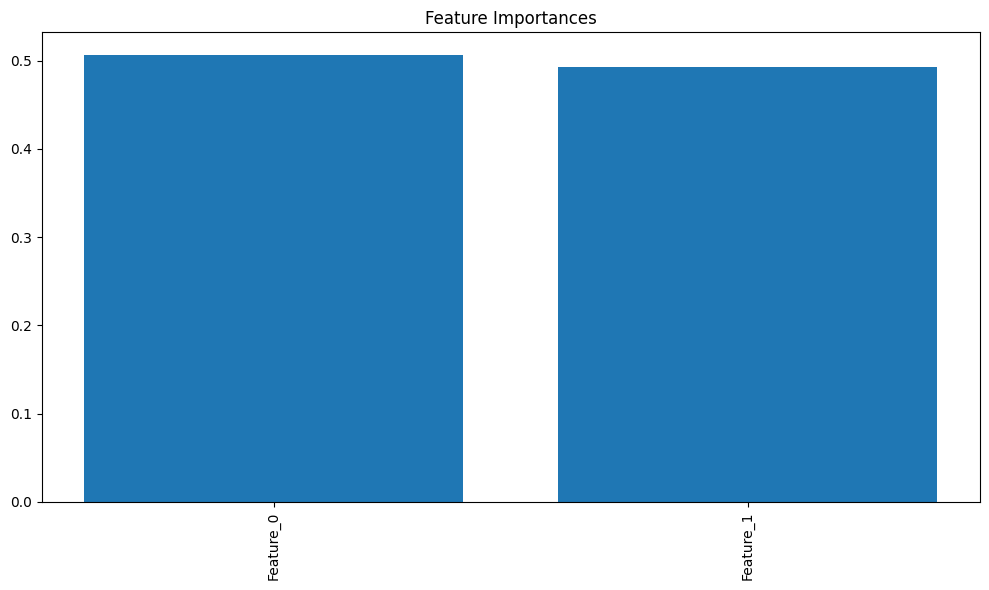

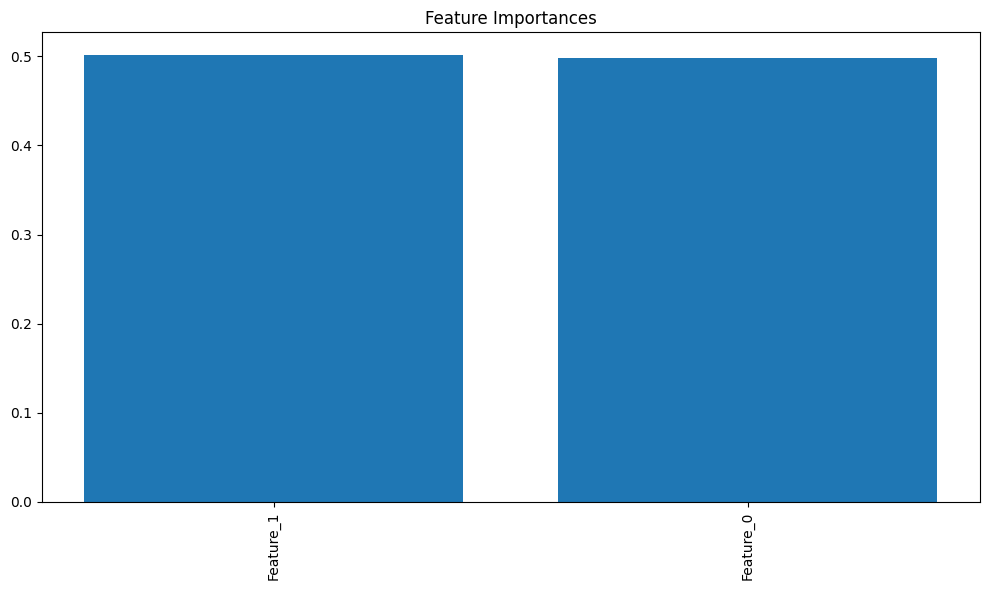

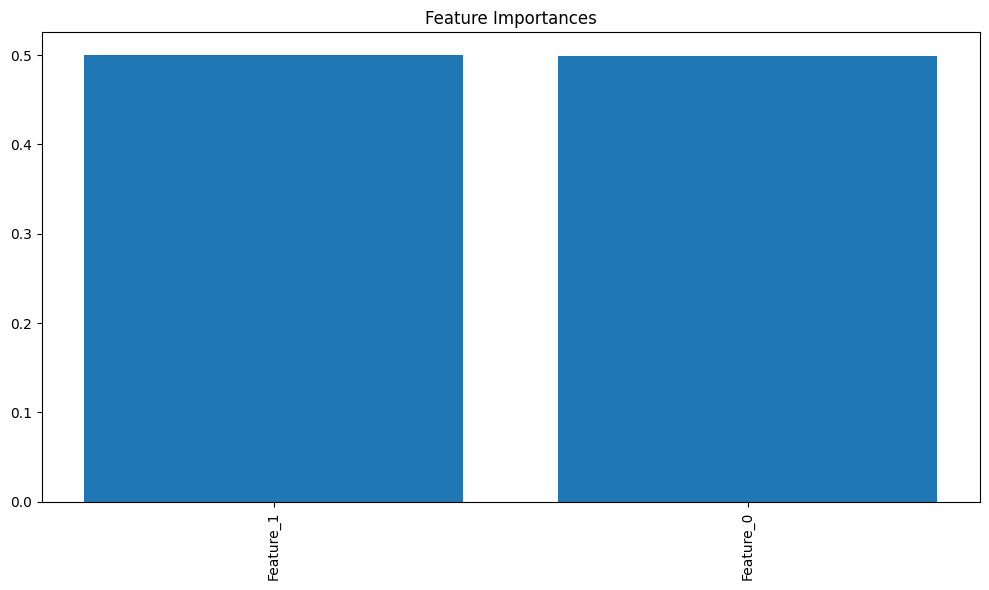

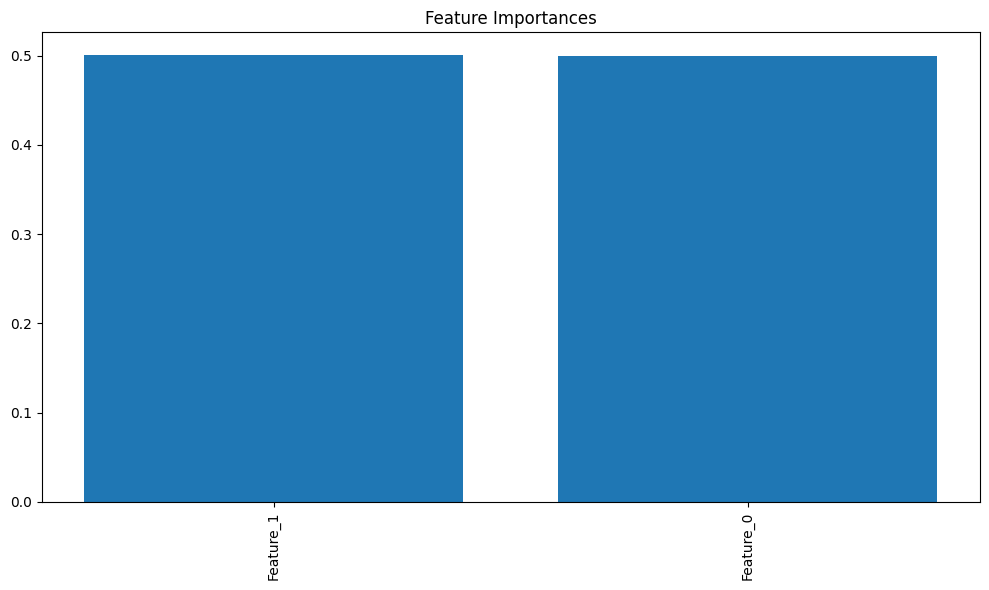

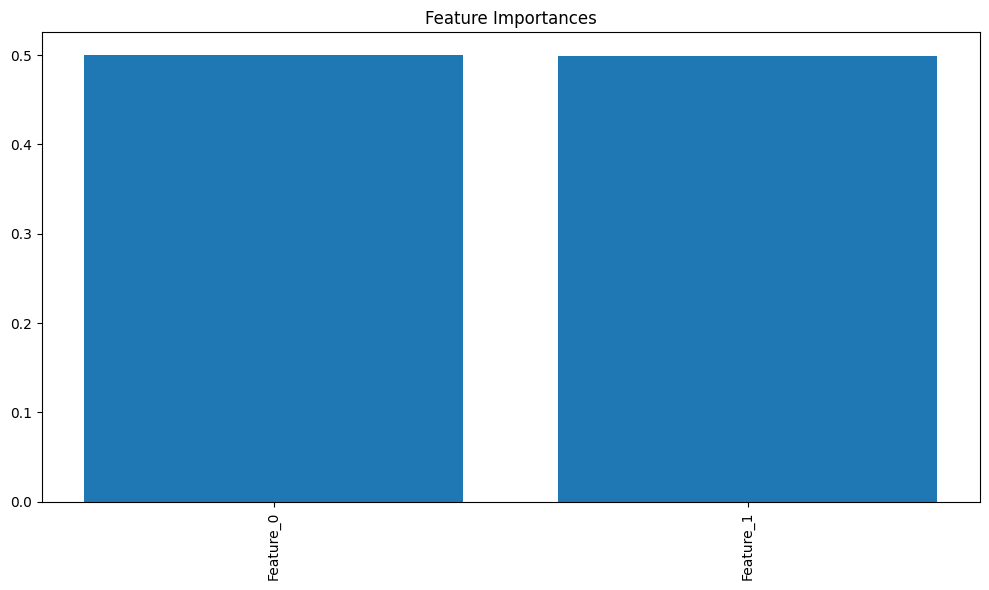

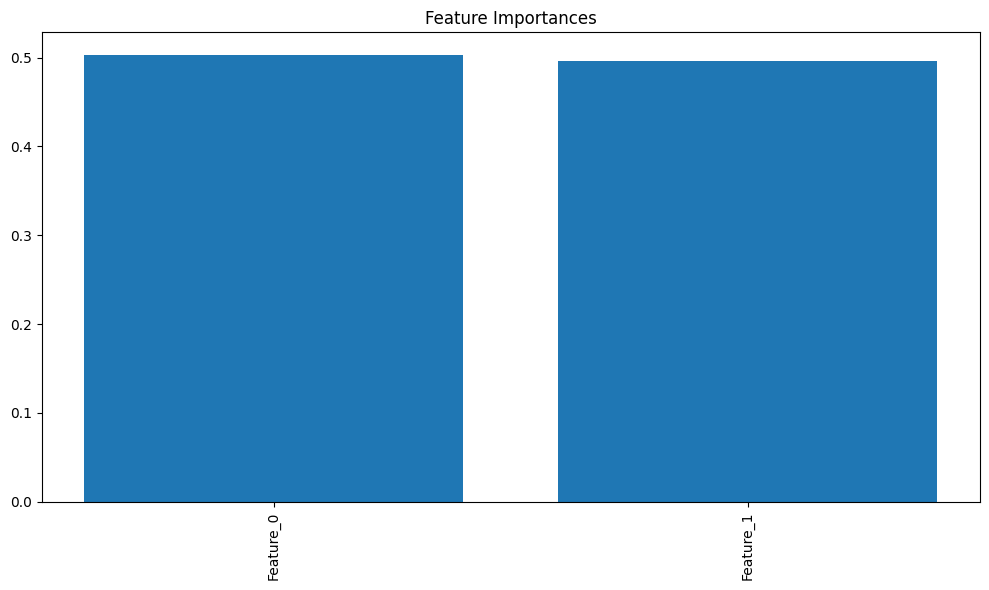

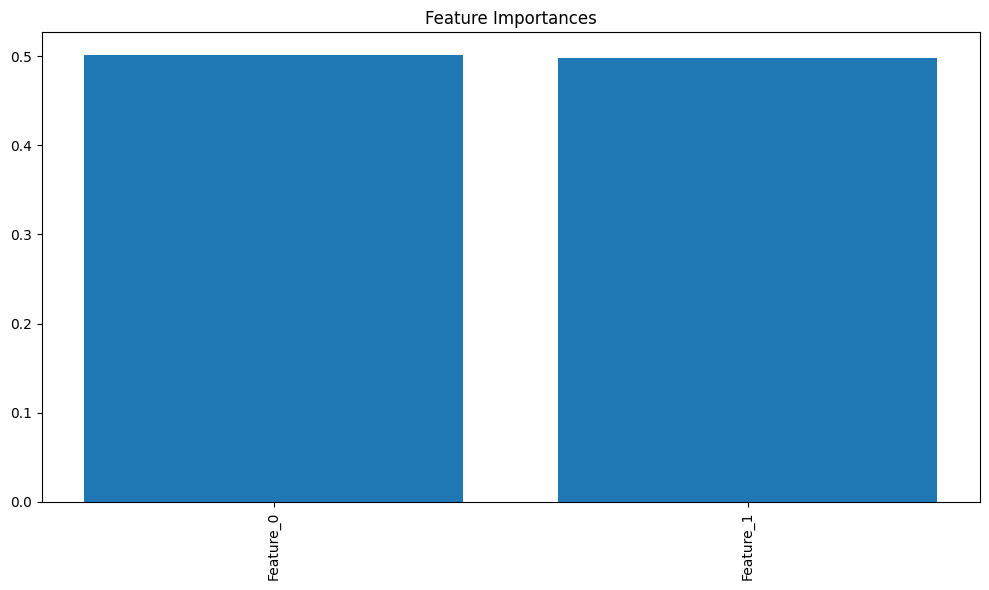

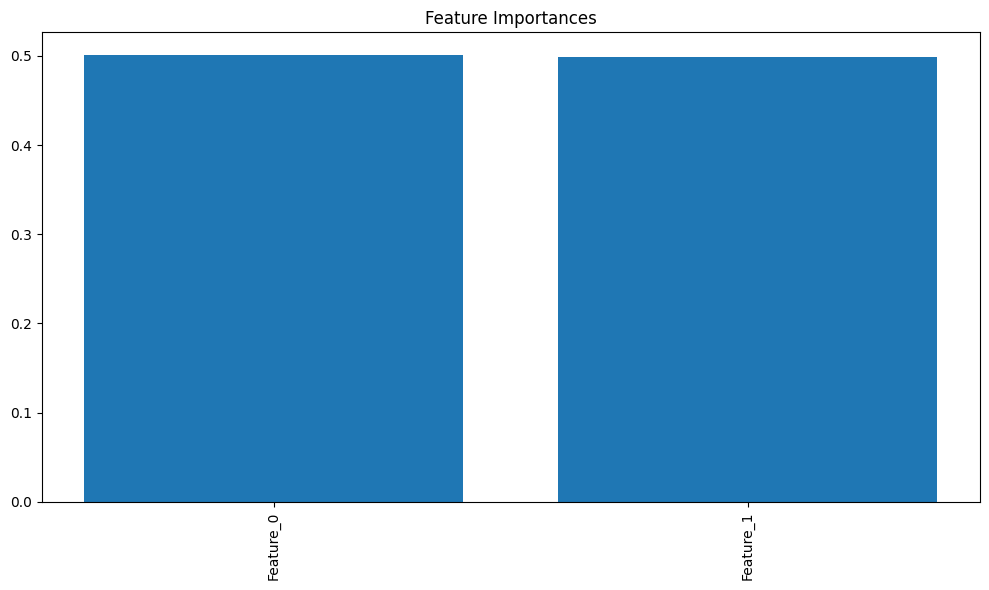

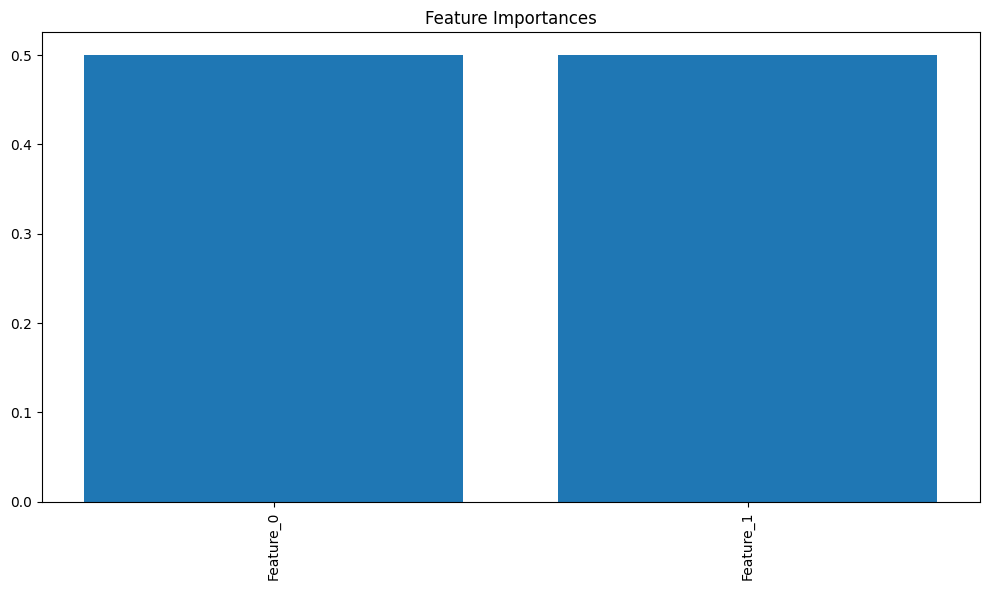

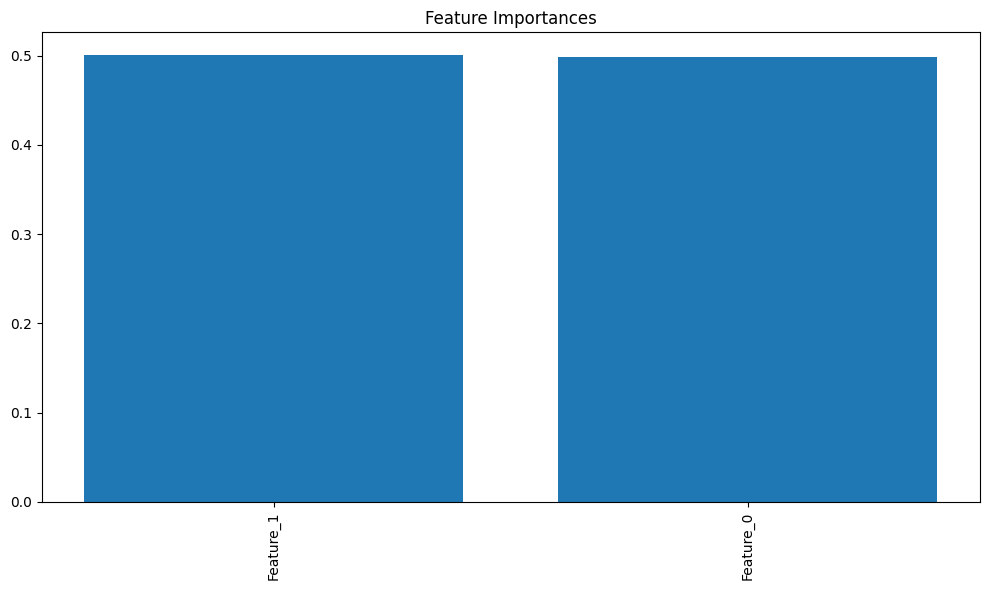

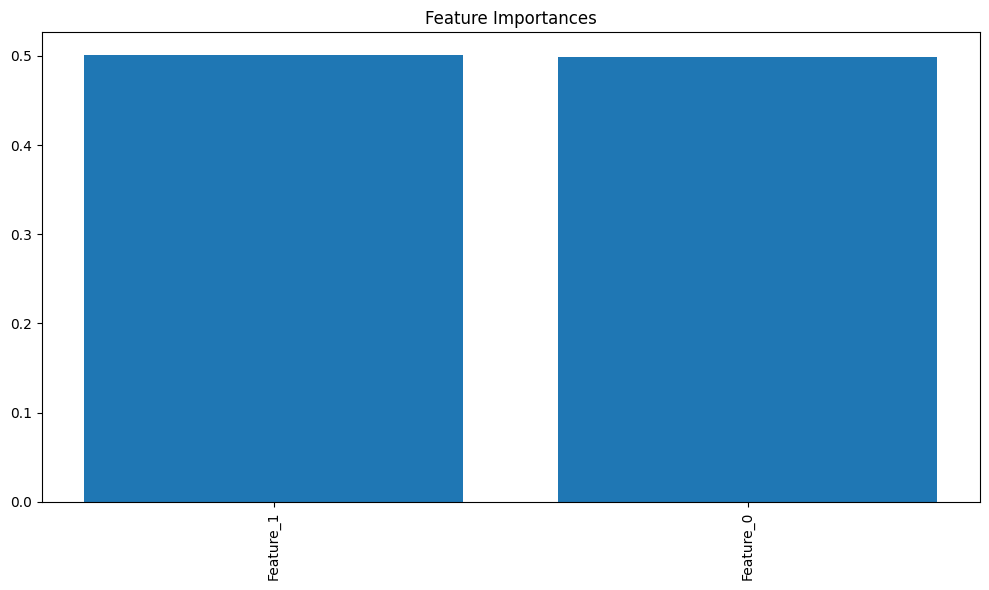

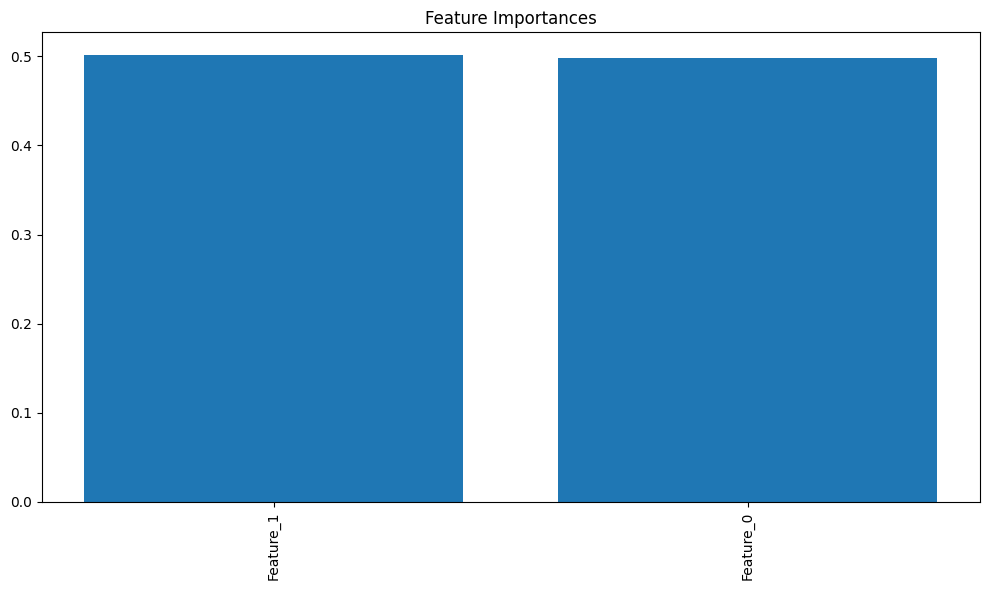

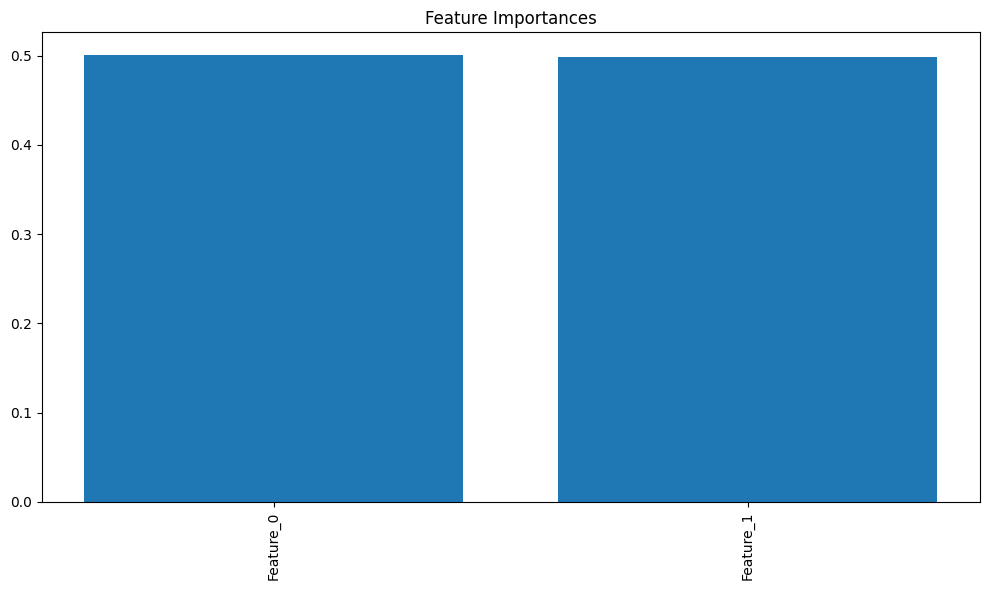

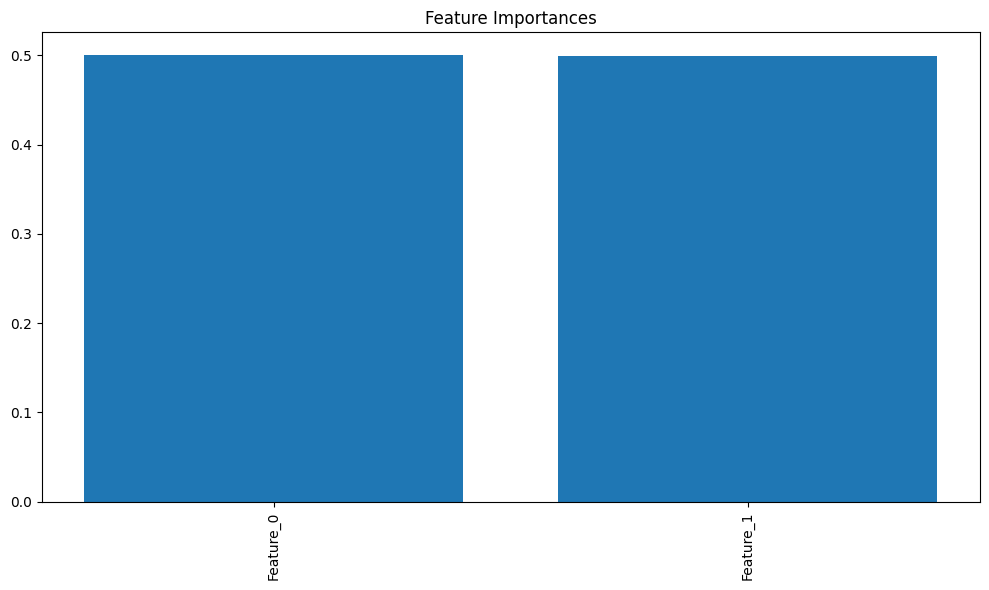

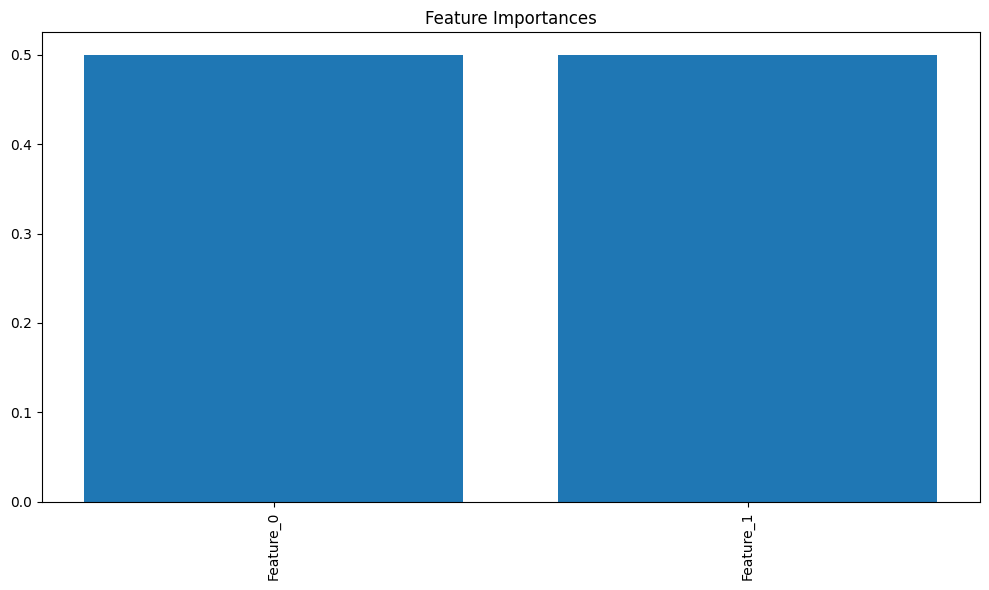

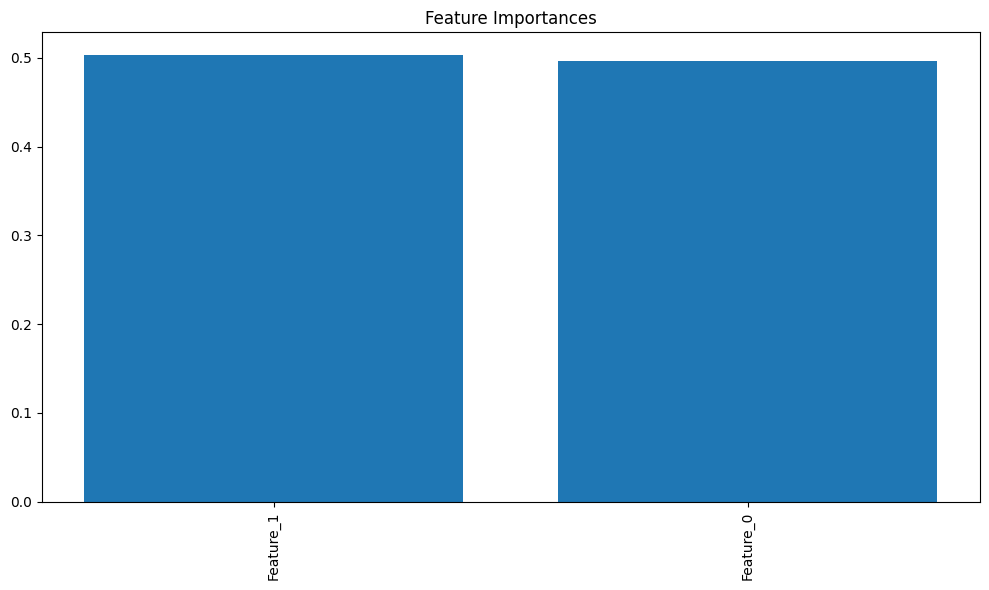

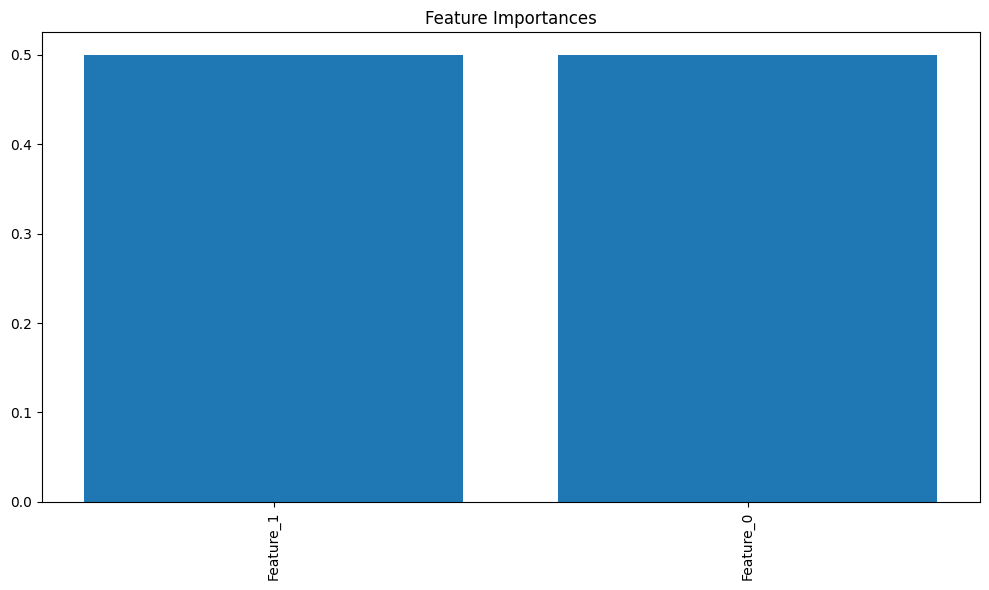

In [43]:
liste = run_classification(100)

In [44]:
print(liste)

[0.521, 0.541, 0.537, 0.534, 0.536, 0.502, 0.504, 0.517, 0.525, 0.54, 0.522, 0.531, 0.529, 0.539, 0.53, 0.516, 0.555, 0.53, 0.548, 0.521, 0.513, 0.501, 0.527, 0.543, 0.522, 0.498, 0.515, 0.527, 0.509, 0.535, 0.49, 0.49, 0.493, 0.516, 0.521, 0.498, 0.513, 0.497, 0.498, 0.531, 0.509, 0.532, 0.532, 0.523, 0.536, 0.518, 0.5, 0.473, 0.519, 0.524, 0.531, 0.534, 0.505, 0.548, 0.489, 0.537, 0.529, 0.505, 0.497, 0.531, 0.521, 0.483, 0.519, 0.521, 0.55, 0.529, 0.503, 0.522, 0.486, 0.559, 0.523, 0.522, 0.505, 0.512, 0.51, 0.513, 0.531, 0.532, 0.53, 0.514, 0.473, 0.527, 0.487, 0.527, 0.521, 0.52, 0.544, 0.507, 0.525, 0.544, 0.522, 0.504, 0.549, 0.507, 0.514, 0.533, 0.561, 0.552, 0.516, 0.535]


In [45]:
print(np.mean(np.array(liste)))

0.5204


In [46]:
print(np.std(np.array(liste)))

0.018236776030866878
